In [2]:
import pickle
import pandas as pd
import numpy as np
import os

In [3]:
file_path = 'D:\\Bioinformatics\\personal research\\WCM output\\NEW_df_wildtype_bms.pkl'

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    wild = pickle.load(file)

In [4]:
wild['id'] = wild['gene_ko'].apply(lambda x: x.split('/')[-1])

In [5]:
# Generate a new dataframe with generation, time and all amino acid columns
wildtype_data_new = wild[['date_of_sim','generation','id','time','cellMass','ARG[c]', 'ASN[c]', 'CYS[c]', 'GLN[c]', 'GLT[c]', 'GLY[c]', 
                'HIS[c]', 'ILE[c]', 'L-ALPHA-ALANINE[c]', 'L-ASPARTATE[c]', 
                'LEU[c]', 'LYS[c]', 'MET[c]', 'PHE[c]', 'PRO[c]', 'SER[c]', 
                'THR[c]', 'TRP[c]', 'TYR[c]', 'VAL[c]']]

# Process the generation column, split each value by an underscore (_), and convert the last part to an integer.
wildtype_data_new.loc[:,'generation'] = wildtype_data_new['generation'].apply(lambda x: int(x.split('_')[-1]))

# Sort by generation
wildtype_data_new=wildtype_data_new.sort_values(by=['id','generation'])
print(wildtype_data_new.head(50))

     date_of_sim generation      id  \
297     20230919          0  000000   
848     20230920          0  000000   
296     20230919          1  000000   
847     20230920          1  000000   
299     20230919          2  000000   
294     20230919          3  000000   
298     20230919          4  000000   
295     20230919          5  000000   
537     20230919          0  000001   
1049    20230920          0  000001   
536     20230919          1  000001   
1048    20230920          1  000001   
539     20230919          2  000001   
534     20230919          3  000001   
538     20230919          4  000001   
535     20230919          5  000001   
195     20230919          0  000002   
764     20230920          0  000002   
194     20230919          1  000002   
763     20230920          1  000002   
197     20230919          2  000002   
765     20230920          2  000002   
192     20230919          3  000002   
762     20230920          3  000002   
196     20230919         

In [9]:
time_exploded = wildtype_zipA.explode('time')
cellMass_exploded = wildtype_zipA.explode('cellMass')
zipA_exploded = wildtype_zipA.explode('G7258-MONOMER[i]')

# Merge the expanded columns to ensure index alignment
wildtype_zipA_exploded = time_exploded.copy()
wildtype_zipA_exploded['cellMass'] = cellMass_exploded['cellMass'].values
wildtype_zipA_exploded['G7258-MONOMER[i]'] = zipA_exploded['G7258-MONOMER[i]'].values

# Keep the required columns
wildtype_zipA_exploded = wildtype_zipA_exploded[['date_of_sim', 'id', 'time', 'generation', 'cellMass', 'G7258-MONOMER[i]']]
print(wildtype_zipA_exploded.head(50))

    date_of_sim      id    time generation     cellMass G7258-MONOMER[i]
297    20230919  000000     0.0          0   1321.14572              239
297    20230919  000000    60.0          0  1335.834018              249
297    20230919  000000   120.0          0  1354.190268              254
297    20230919  000000   180.0          0  1372.474505              257
297    20230919  000000   240.0          0  1391.641015              274
297    20230919  000000   300.0          0  1410.519576              284
297    20230919  000000   360.0          0  1429.445337              294
297    20230919  000000   420.0          0  1448.959342              297
297    20230919  000000   480.0          0  1470.458609              306
297    20230919  000000   540.0          0  1492.628502              314
297    20230919  000000   600.0          0   1515.21254              319
297    20230919  000000   660.0          0  1538.158422              334
297    20230919  000000   720.0          0  1561.18

# ARG

In [6]:
wildtype_ARG = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','ARG[c]']].copy()

In [11]:
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_arg = wildtype_data_new.explode('ARG[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_arg['time'] = wildtype_exploded_t['time']
wildtype_exploded_arg['cellMass']=wildtype_exploded_cm['cellMass']
wildtype_ARG = wildtype_exploded_arg[['date_of_sim','id','time','generation','cellMass','ARG[c]']]
wildtype_ARG.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
print(wildtype_ARG.head(50))

    date_of_sim      id    time generation     cellMass  ARG[c]
297    20230919  000000     0.0          0   1321.14572  207341
297    20230919  000000    60.0          0  1335.834018  179914
297    20230919  000000   120.0          0  1354.190268  184933
297    20230919  000000   180.0          0  1372.474505  189578
297    20230919  000000   240.0          0  1391.641015  190866
297    20230919  000000   300.0          0  1410.519576  199307
297    20230919  000000   360.0          0  1429.445337  193726
297    20230919  000000   420.0          0  1448.959342  178086
297    20230919  000000   480.0          0  1470.458609  171160
297    20230919  000000   540.0          0  1492.628502  166827
297    20230919  000000   600.0          0   1515.21254  170618
297    20230919  000000   660.0          0  1538.158422  179679
297    20230919  000000   720.0          0  1561.183336  196245
297    20230919  000000   780.0          0  1583.134694  199416
297    20230919  000000   840.0         

C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\2405292471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_ARG.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


In [12]:
import matplotlib.pyplot as plt

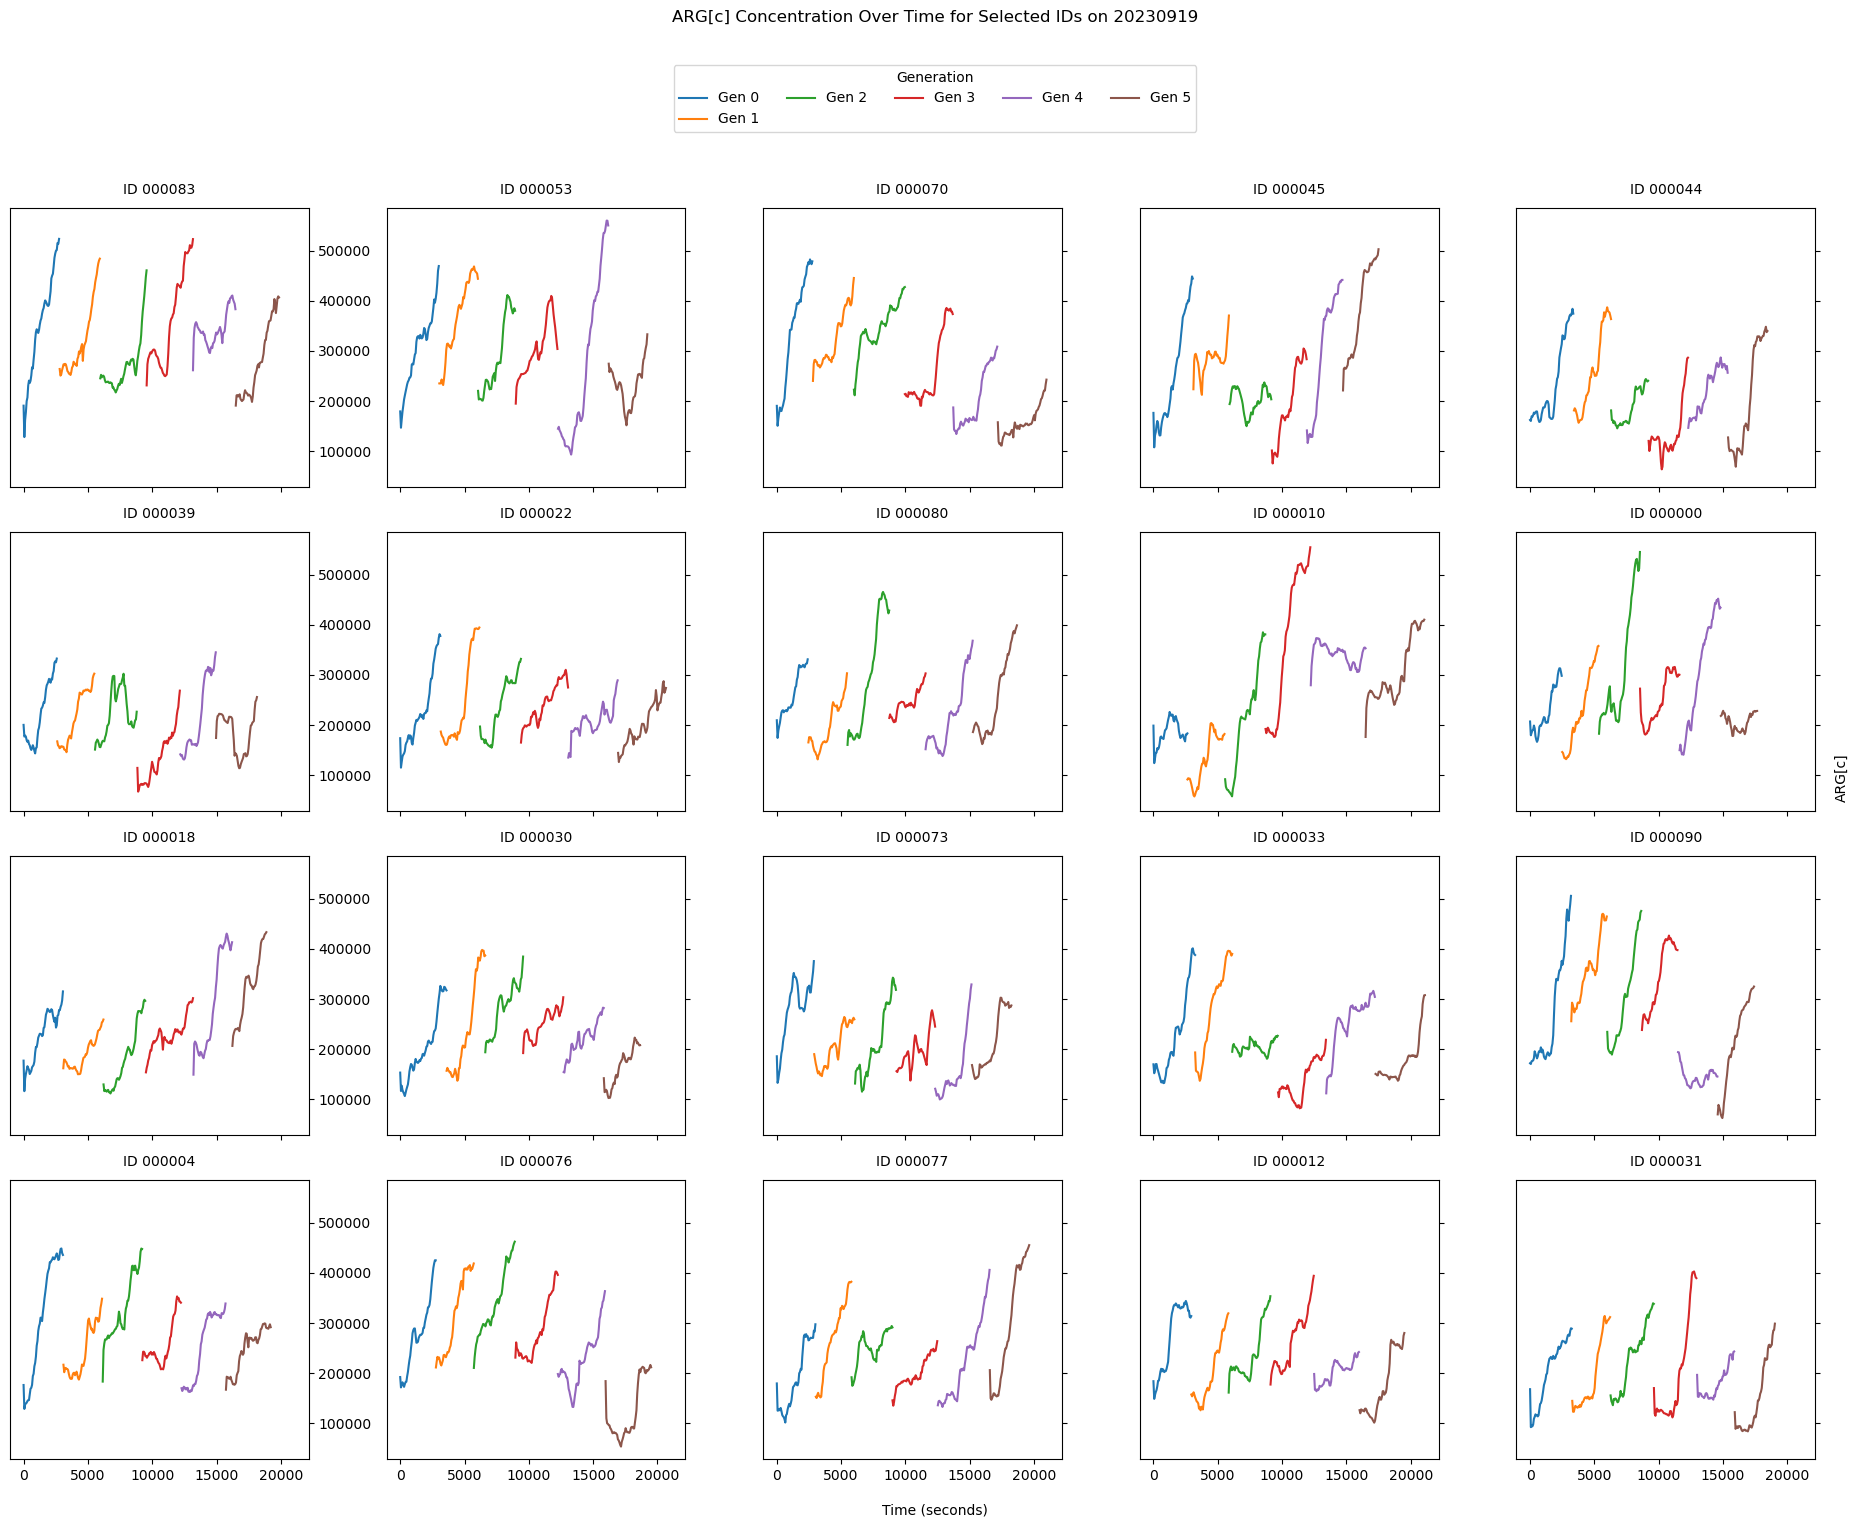

平均相关性 (ARG[c] 与 cellMass): 0.8551


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_ARG['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_ARG[wildtype_ARG['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的ARG[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['ARG[c]'] = pd.to_numeric(df_gen_exploded['ARG[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'ARG[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['ARG[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['ARG[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'ARG[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'ARG[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\arg"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (ARG[c] 与 cellMass): {average_correlation:.4f}')


# ASN

C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\2240986286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_ASN.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


    date_of_sim      id    time generation     cellMass  ASN[c]
297    20230919  000000     0.0          0   1321.14572  312097
297    20230919  000000    60.0          0  1335.834018  276293
297    20230919  000000   120.0          0  1354.190268  282597
297    20230919  000000   180.0          0  1372.474505  287974
297    20230919  000000   240.0          0  1391.641015  289245
297    20230919  000000   300.0          0  1410.519576  292925
297    20230919  000000   360.0          0  1429.445337  288768
297    20230919  000000   420.0          0  1448.959342  274272
297    20230919  000000   480.0          0  1470.458609  263907
297    20230919  000000   540.0          0  1492.628502  261804
297    20230919  000000   600.0          0   1515.21254  268898
297    20230919  000000   660.0          0  1538.158422  274980
297    20230919  000000   720.0          0  1561.183336  296550
297    20230919  000000   780.0          0  1583.134694  305972
297    20230919  000000   840.0         

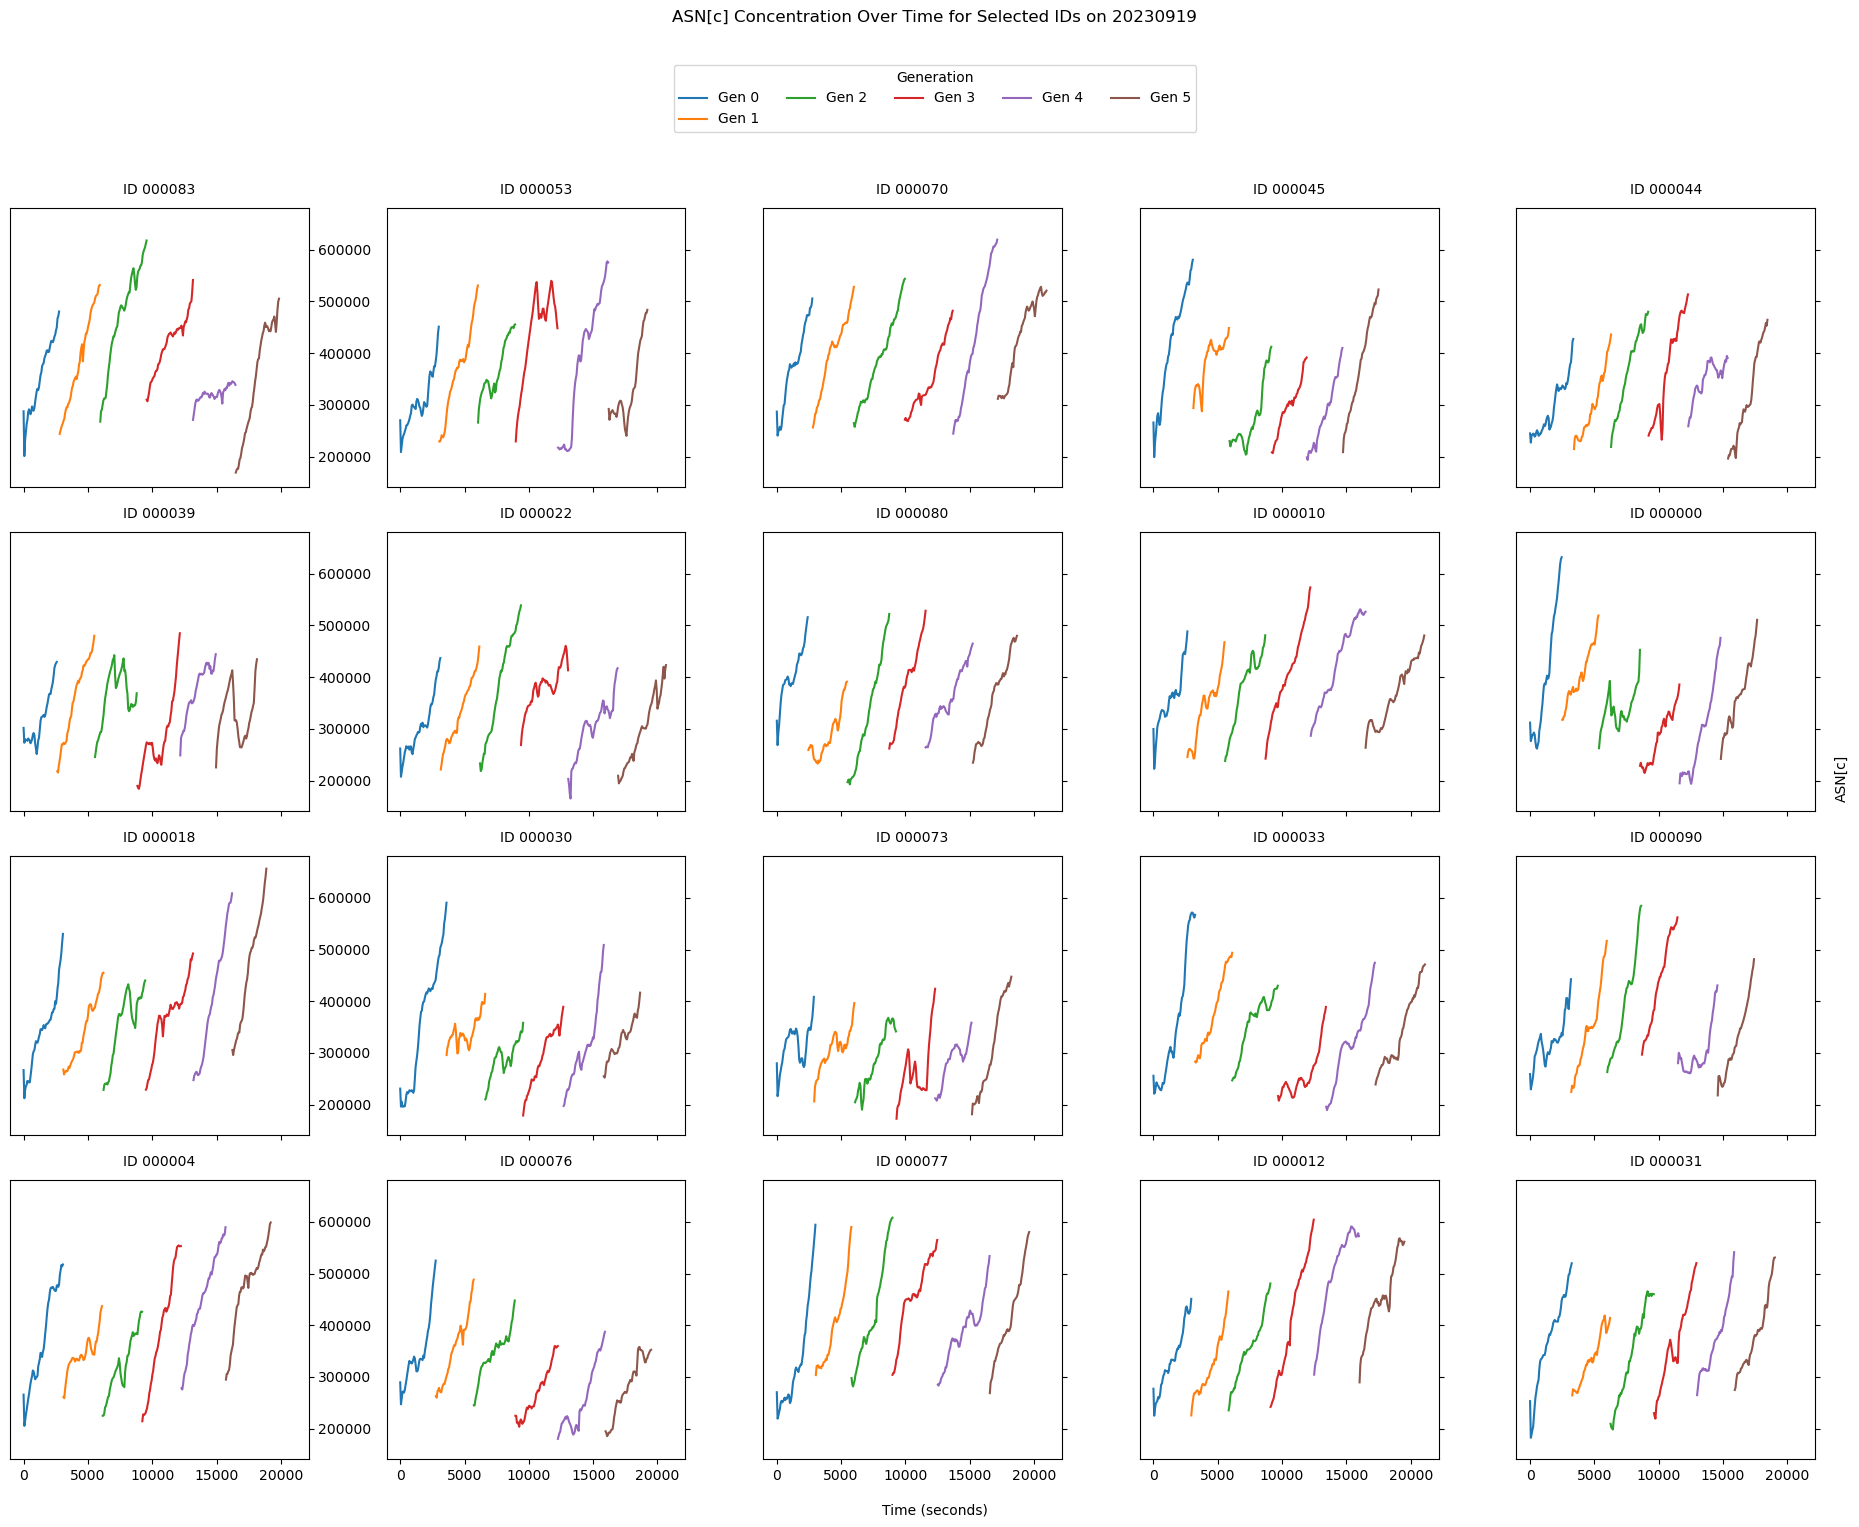

平均相关性 (ASN[c] 与 cellMass): 0.9286


In [23]:
wildtype_ASN = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','ASN[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_ASN = wildtype_data_new.explode('ASN[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_ASN['time'] = wildtype_exploded_t['time']
wildtype_exploded_ASN['cellMass']=wildtype_exploded_cm['cellMass']
wildtype_ASN = wildtype_exploded_ASN[['date_of_sim','id','time','generation','cellMass','ASN[c]']]
wildtype_ASN.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
print(wildtype_ASN.head(50))
np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_ASN['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_ASN[wildtype_ASN['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的ARG[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['ASN[c]'] = pd.to_numeric(df_gen_exploded['ASN[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'ASN[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['ASN[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['ASN[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'ASN[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'ASN[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\asn"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (ASN[c] 与 cellMass): {average_correlation:.4f}')


# CYS

C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\3444368641.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_CYS.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


    date_of_sim      id   time generation     cellMass CYS[c]
297    20230919  000000    0.0          0   1321.14572  15695
297    20230919  000000   60.0          0  1335.834018  14523
297    20230919  000000  120.0          0  1354.190268  14483
297    20230919  000000  180.0          0  1372.474505  14609
297    20230919  000000  240.0          0  1391.641015  14550


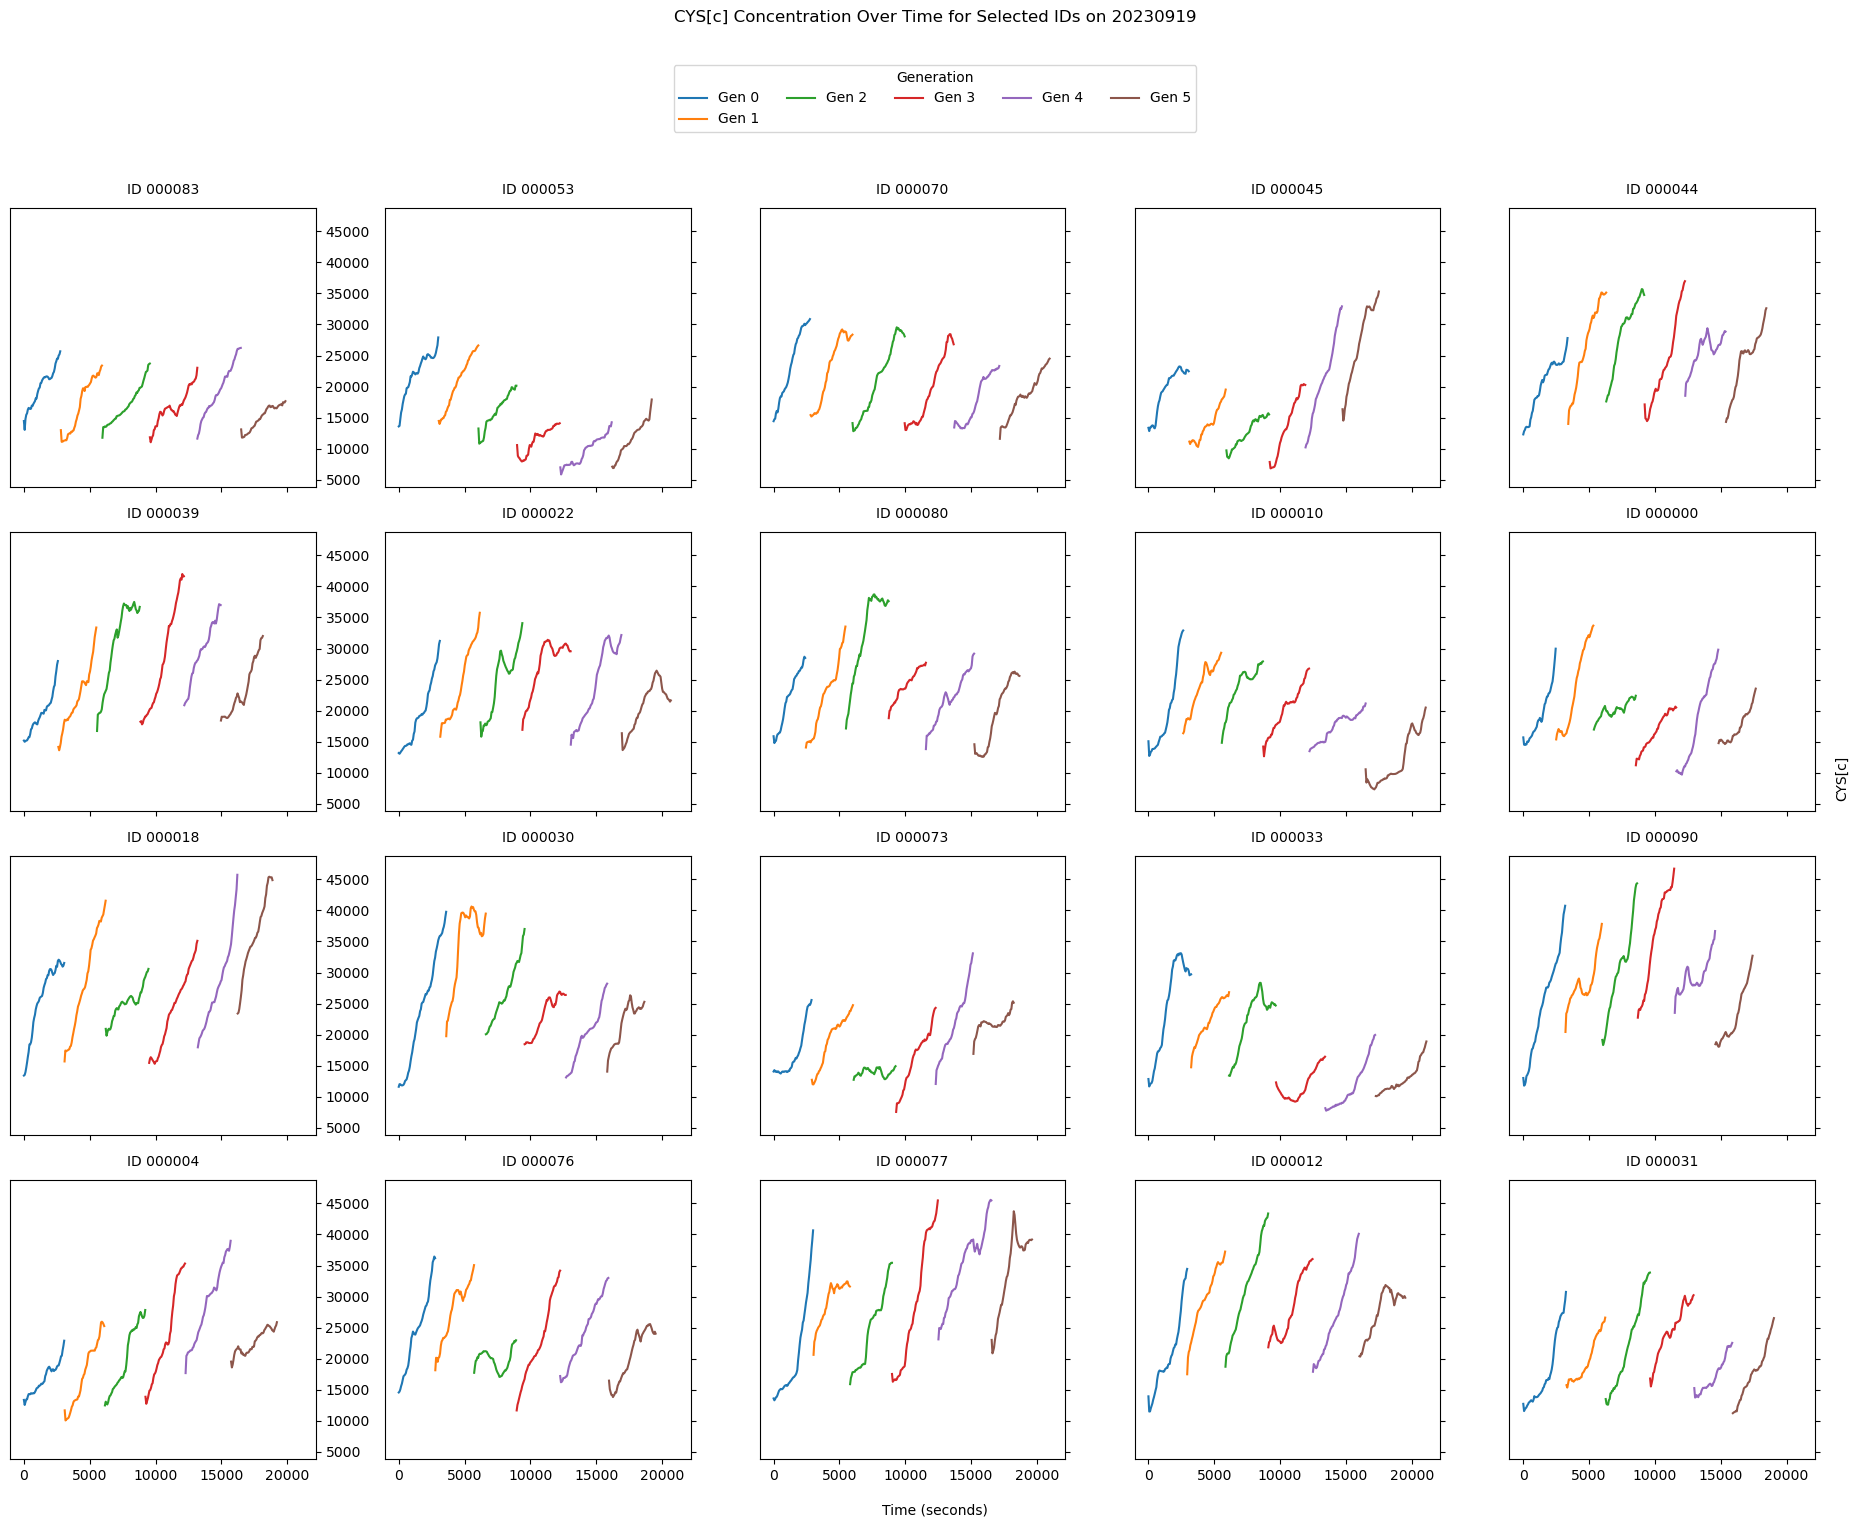

平均相关性 (CYS[c] 与 cellMass): 0.9335


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, CYS[c], 和 cellMass 列
wildtype_CYS = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','CYS[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_CYS = wildtype_data_new.explode('CYS[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_CYS['time'] = wildtype_exploded_t['time']
wildtype_exploded_CYS['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_CYS = wildtype_exploded_CYS[['date_of_sim','id','time','generation','cellMass','CYS[c]']]
wildtype_CYS.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
print(wildtype_CYS.head())

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_CYS['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_CYS[wildtype_CYS['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的CYS[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['CYS[c]'] = pd.to_numeric(df_gen_exploded['CYS[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'CYS[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['CYS[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['CYS[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'CYS[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'CYS[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\cys"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (CYS[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\329707746.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_GLN.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


    date_of_sim      id    time generation     cellMass   GLN[c]
297    20230919  000000     0.0          0   1321.14572  2907602
297    20230919  000000    60.0          0  1335.834018  2806449
297    20230919  000000   120.0          0  1354.190268  2786327
297    20230919  000000   180.0          0  1372.474505  2786185
297    20230919  000000   240.0          0  1391.641015  2789122
297    20230919  000000   300.0          0  1410.519576  2802588
297    20230919  000000   360.0          0  1429.445337  2801793
297    20230919  000000   420.0          0  1448.959342  2740611
297    20230919  000000   480.0          0  1470.458609  2614634
297    20230919  000000   540.0          0  1492.628502  2476545
297    20230919  000000   600.0          0   1515.21254  2338393
297    20230919  000000   660.0          0  1538.158422  2204126
297    20230919  000000   720.0          0  1561.183336  2104771
297    20230919  000000   780.0          0  1583.134694  2015399
297    20230919  000000  

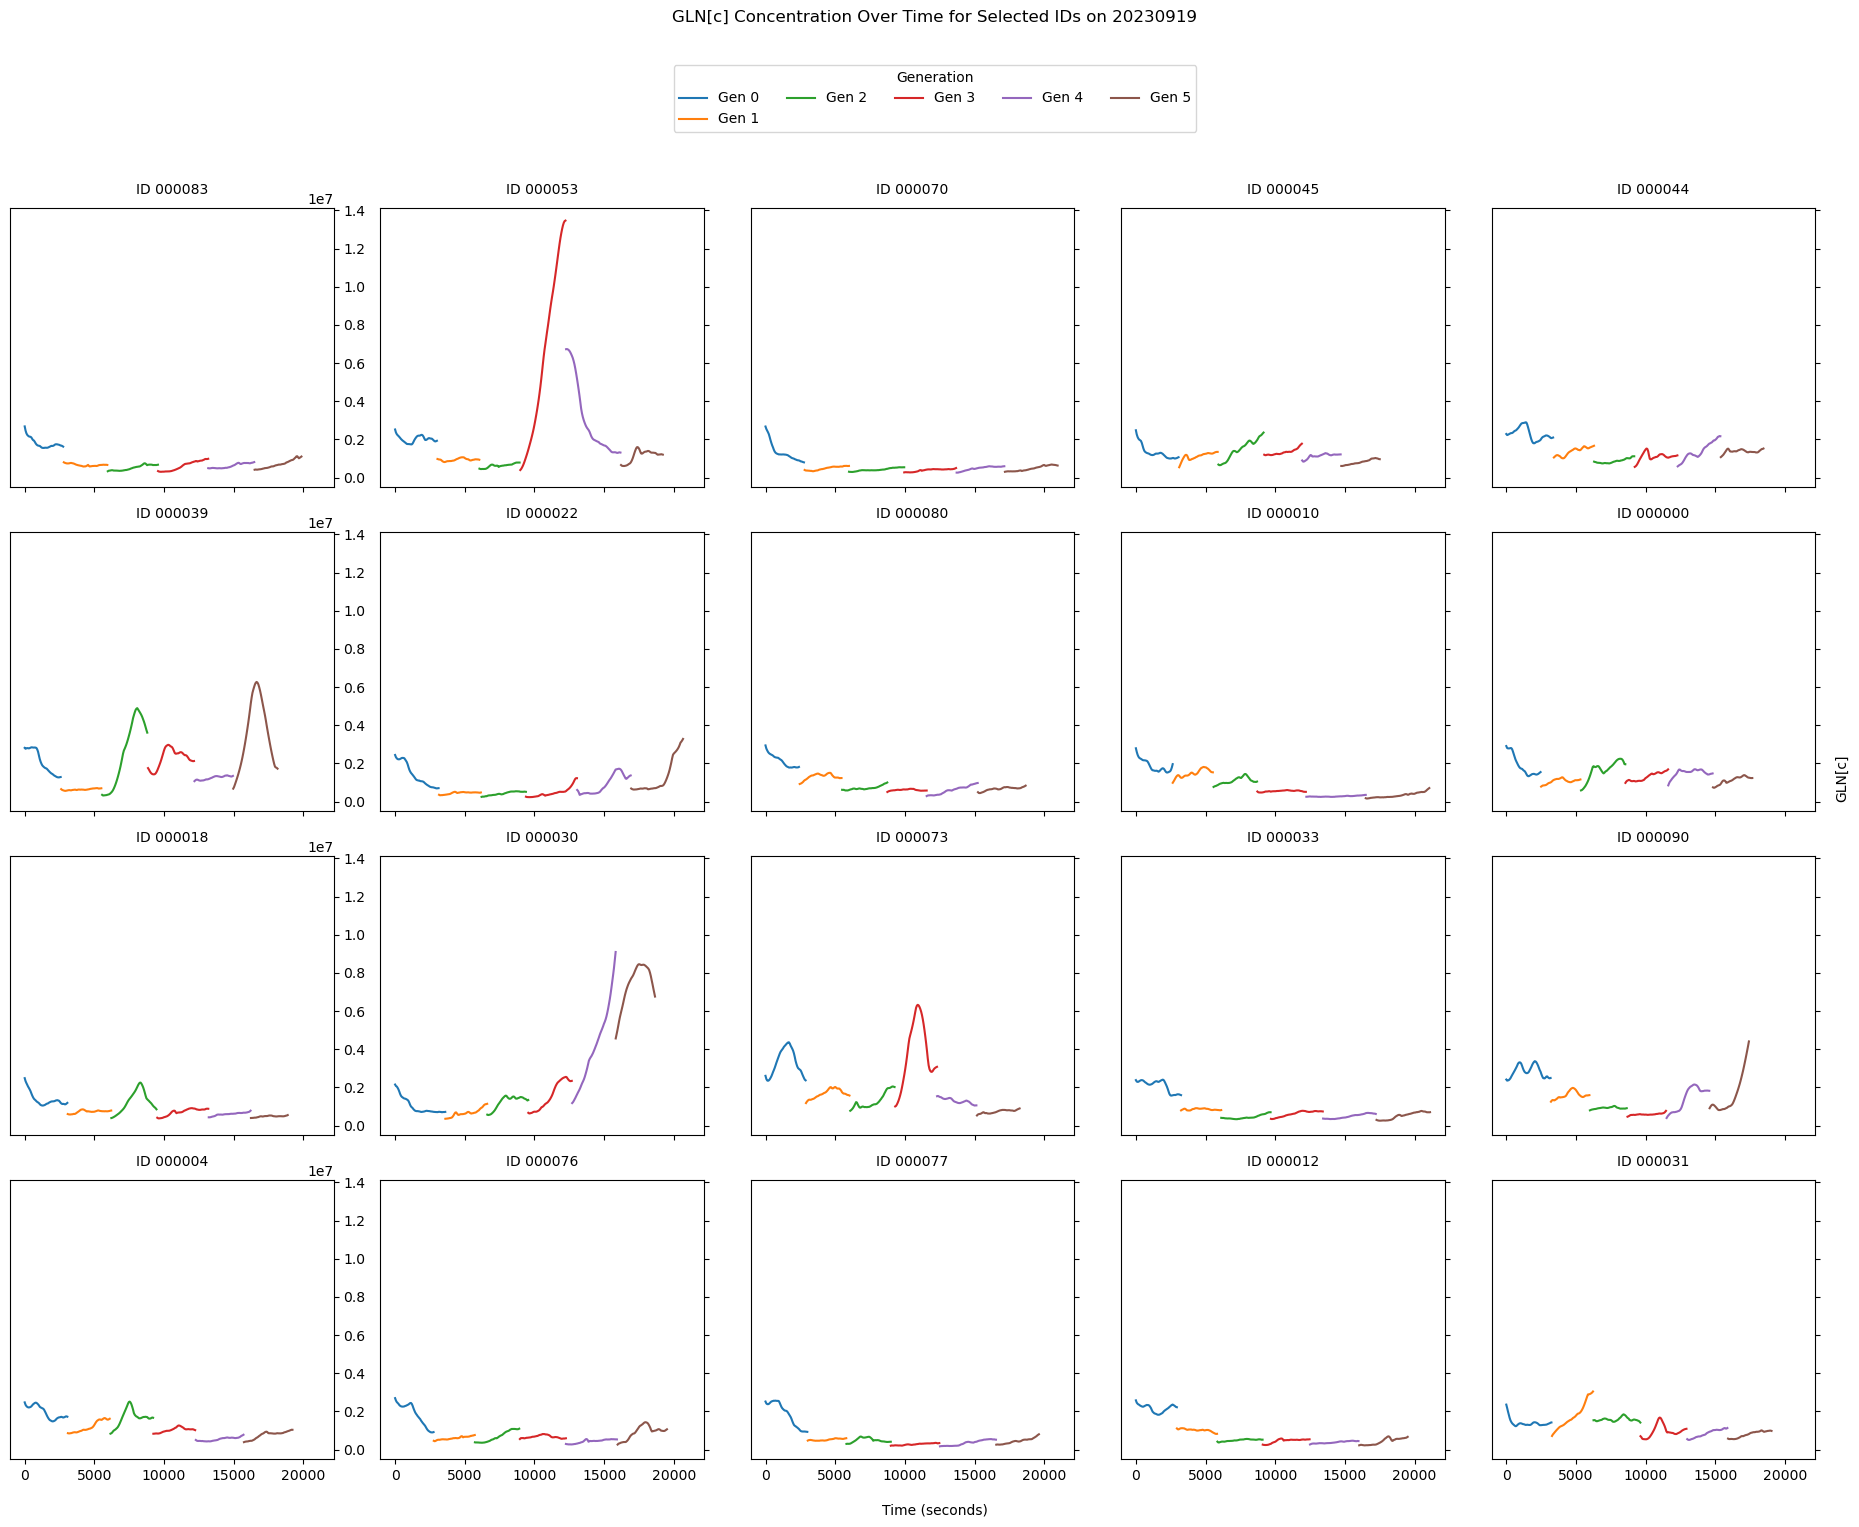

平均相关性 (GLN[c] 与 cellMass): 0.4616


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, GLN[c], 和 cellMass 列
wildtype_GLN = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','GLN[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_GLN = wildtype_data_new.explode('GLN[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_GLN['time'] = wildtype_exploded_t['time']
wildtype_exploded_GLN['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_GLN = wildtype_exploded_GLN[['date_of_sim','id','time','generation','cellMass','GLN[c]']]
wildtype_GLN.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
print(wildtype_GLN.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_GLN['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_GLN[wildtype_GLN['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的GLN[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['GLN[c]'] = pd.to_numeric(df_gen_exploded['GLN[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'GLN[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['GLN[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['GLN[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'GLN[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'GLN[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\gln"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (GLN[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\4123496997.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_GLT.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


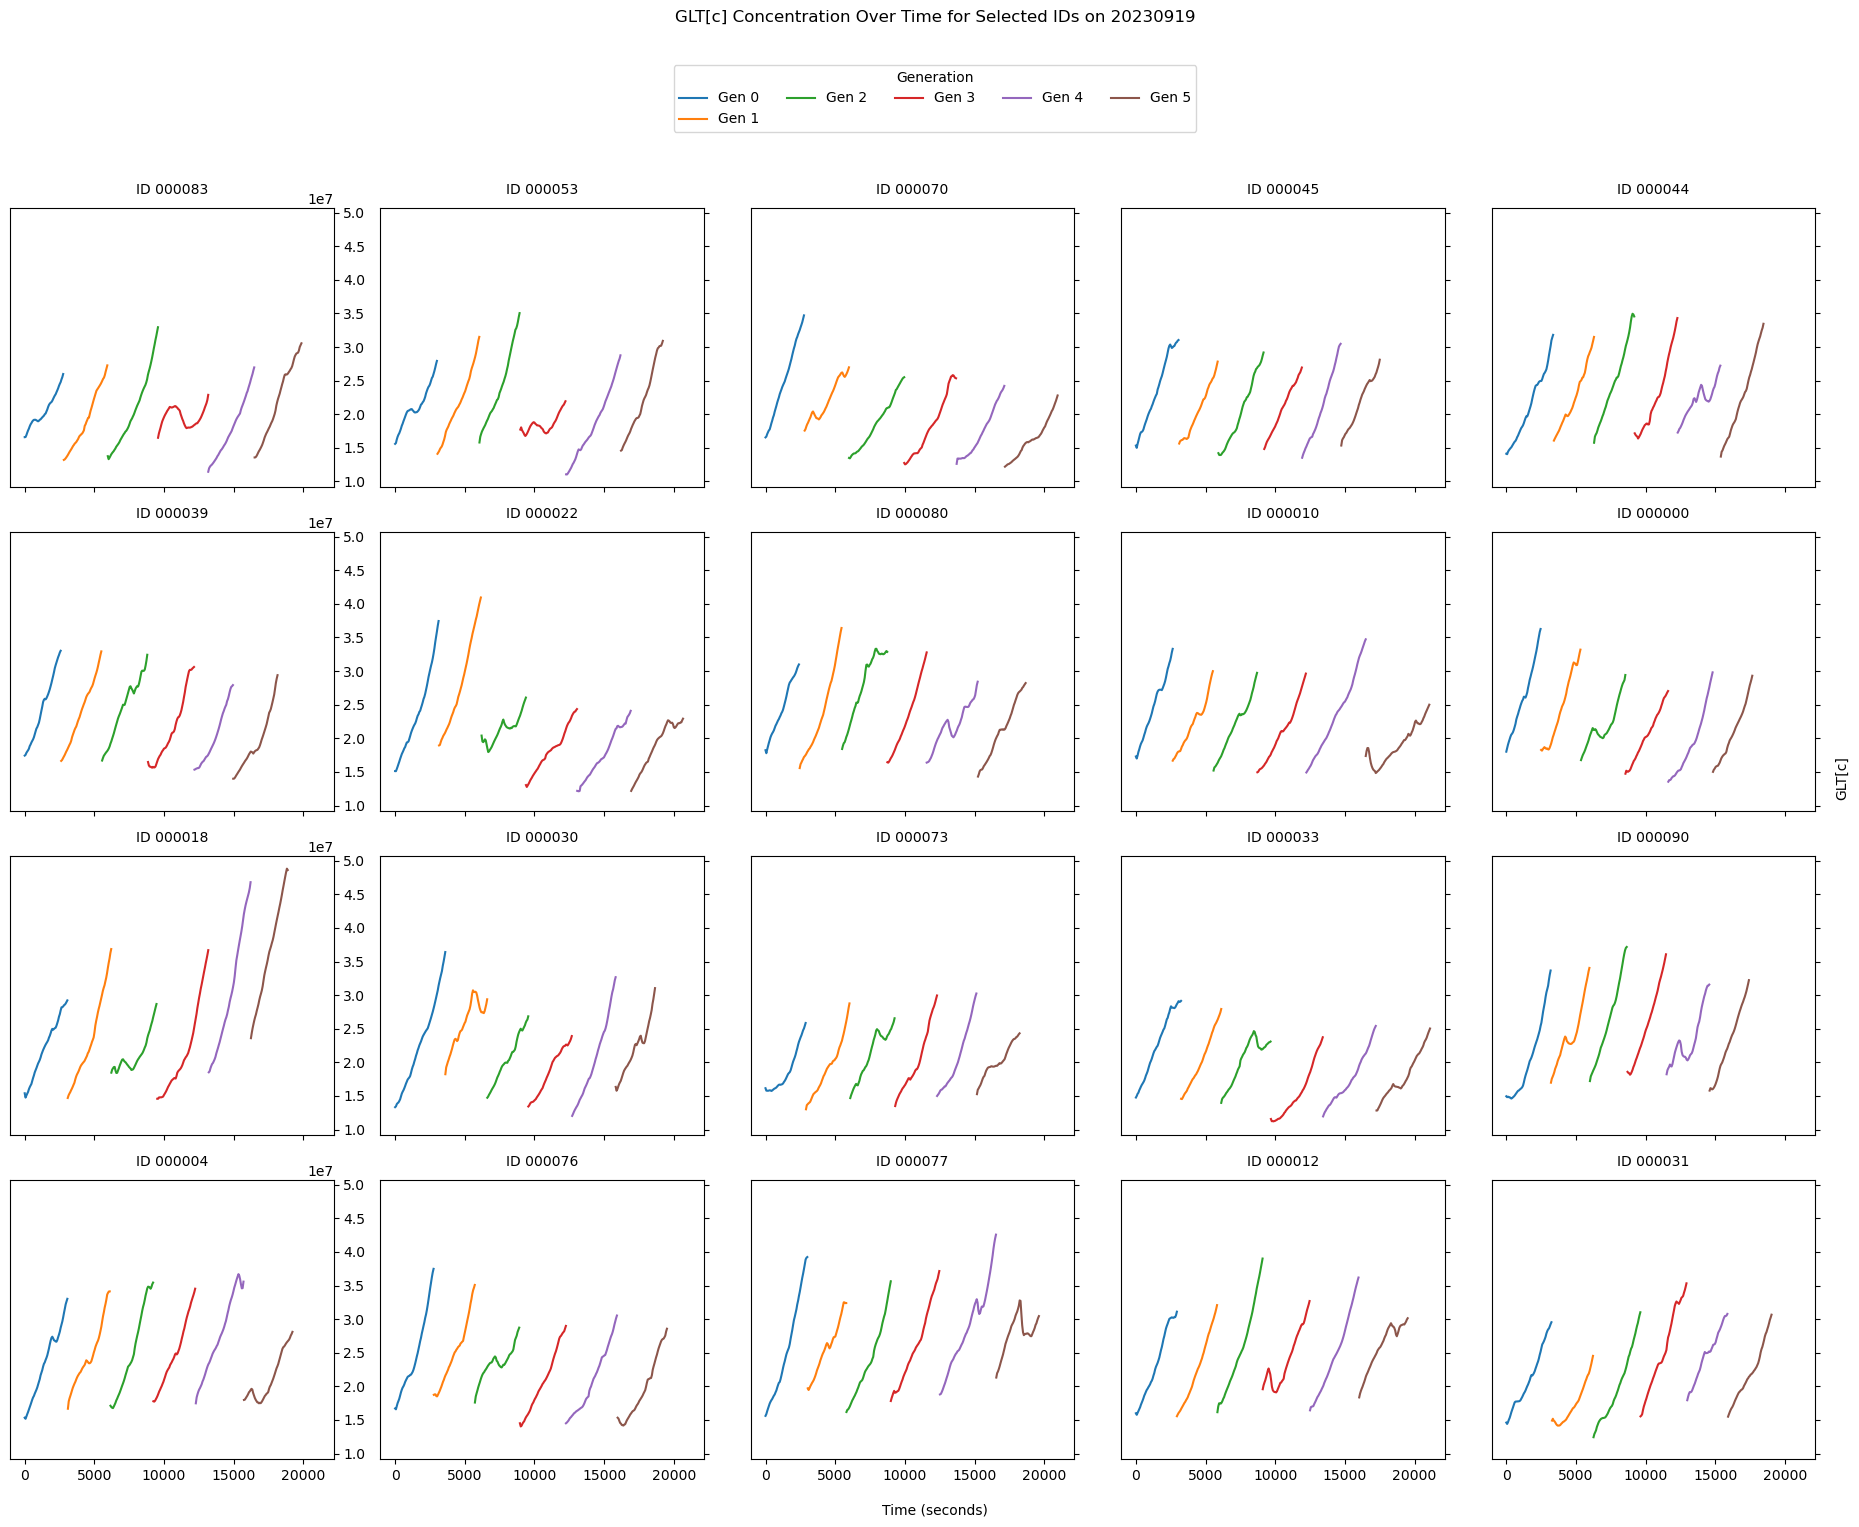

平均相关性 (GLT[c] 与 cellMass): 0.9694


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, GLT[c], 和 cellMass 列
wildtype_GLT = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','GLT[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_GLT = wildtype_data_new.explode('GLT[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_GLT['time'] = wildtype_exploded_t['time']
wildtype_exploded_GLT['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_GLT = wildtype_exploded_GLT[['date_of_sim','id','time','generation','cellMass','GLT[c]']]
wildtype_GLT.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_GLT.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_GLT['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_GLT[wildtype_GLT['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的GLT[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['GLT[c]'] = pd.to_numeric(df_gen_exploded['GLT[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'GLT[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['GLT[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['GLT[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'GLT[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'GLT[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\glt"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (GLT[c] 与 cellMass): {average_correlation:.4f}')

C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\1458021698.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_GLY.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


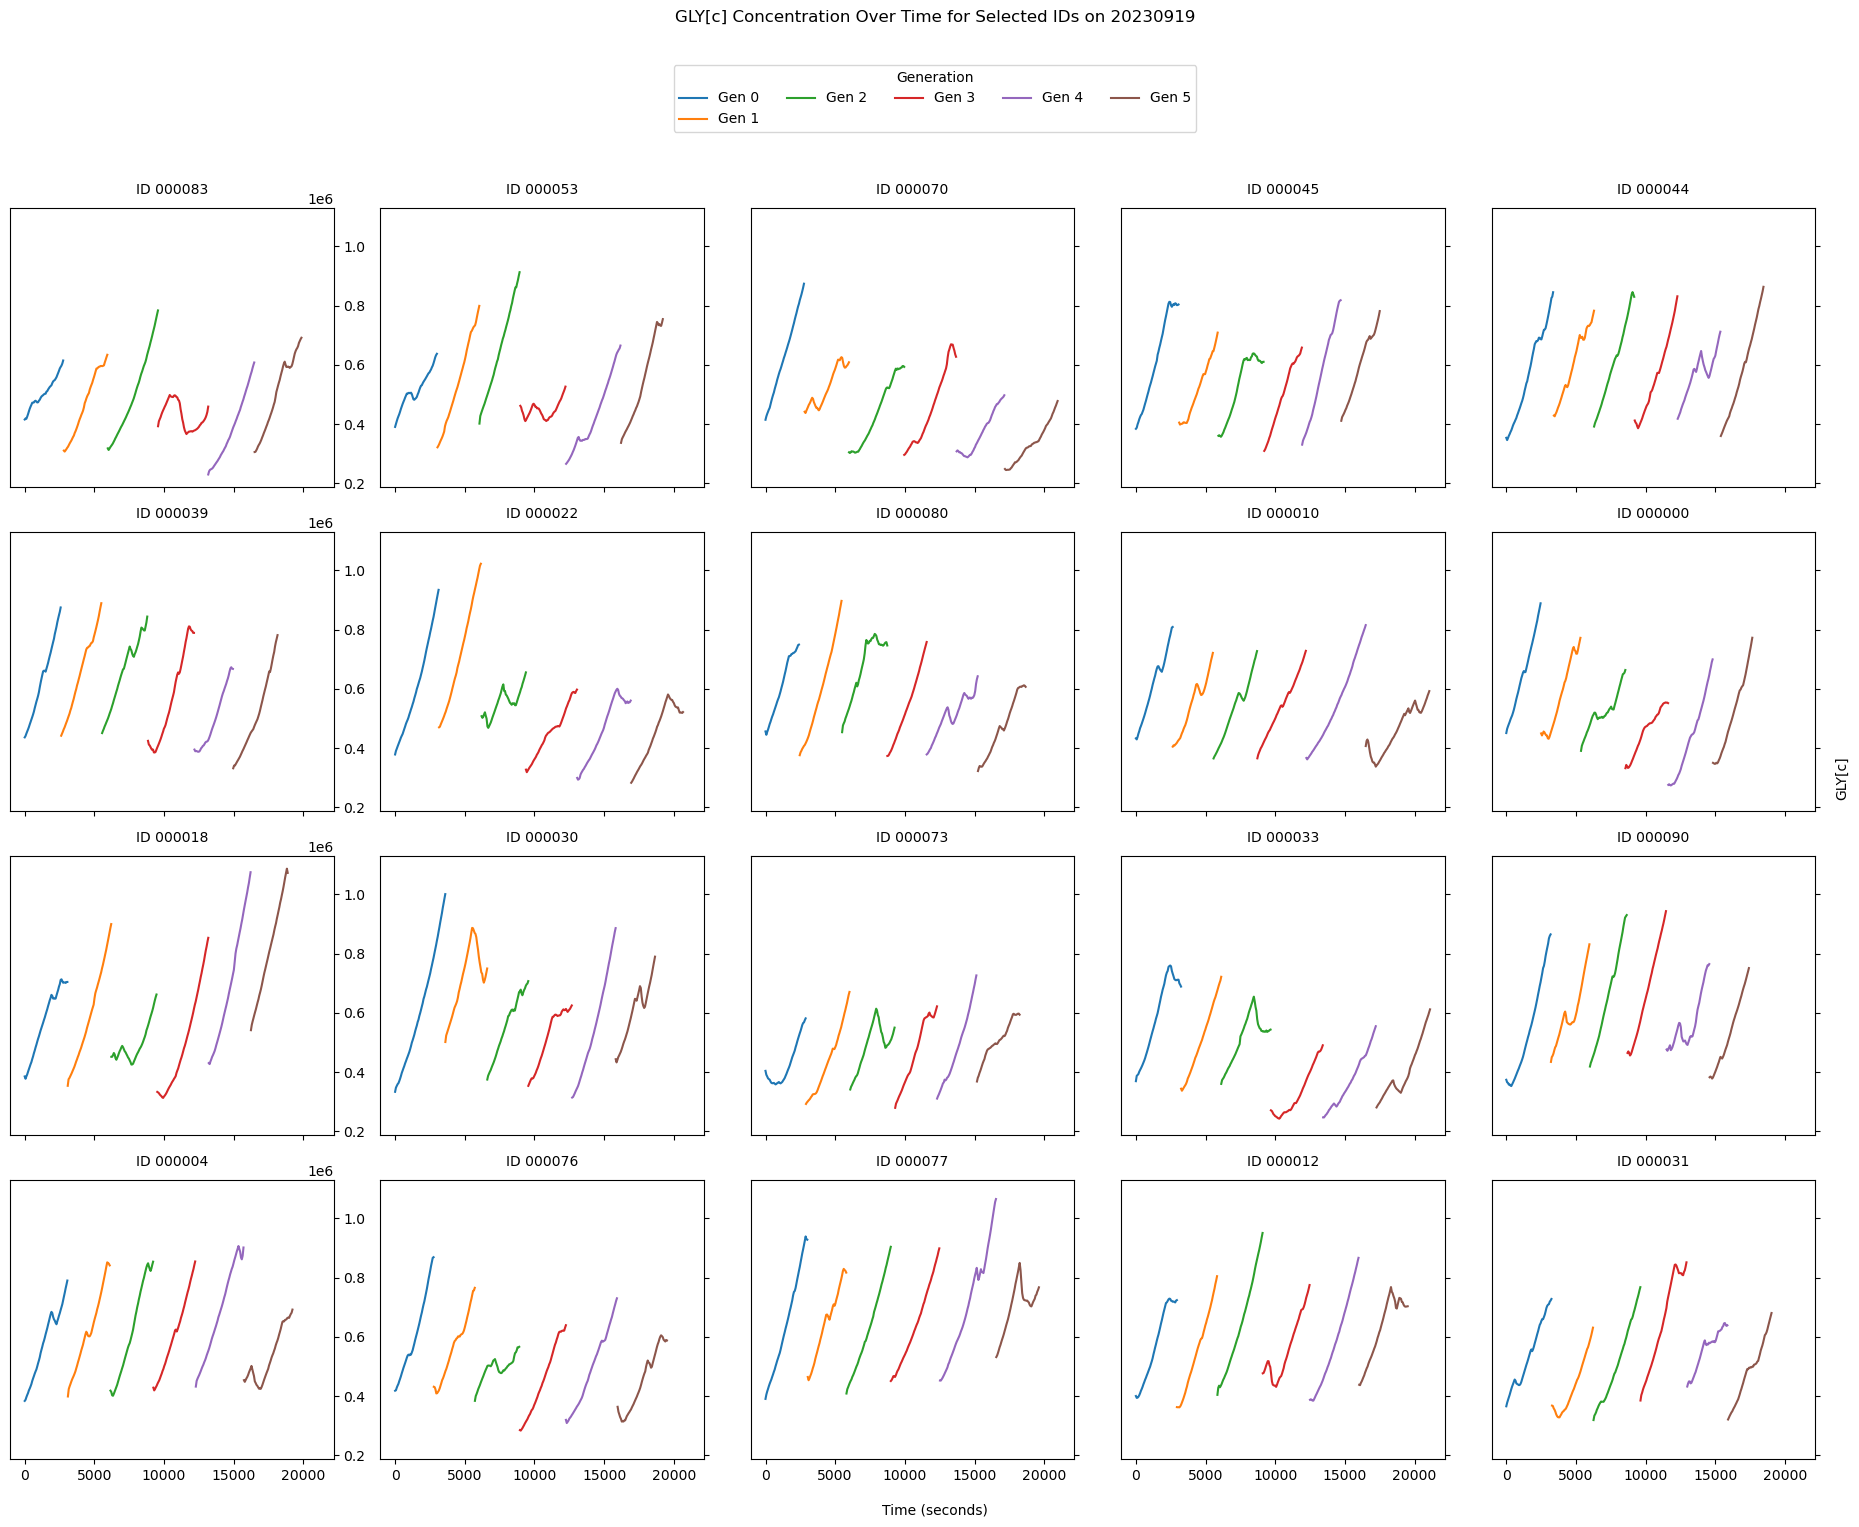

平均相关性 (GLY[c] 与 cellMass): 0.9491


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, GLY[c], 和 cellMass 列
wildtype_GLY = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','GLY[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_GLY = wildtype_data_new.explode('GLY[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_GLY['time'] = wildtype_exploded_t['time']
wildtype_exploded_GLY['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_GLY = wildtype_exploded_GLY[['date_of_sim','id','time','generation','cellMass','GLY[c]']]
wildtype_GLY.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_GLY.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_GLY['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_GLY[wildtype_GLY['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的GLY[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['GLY[c]'] = pd.to_numeric(df_gen_exploded['GLY[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'GLY[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['GLY[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['GLY[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'GLY[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'GLY[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\gly"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (GLY[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\2611333533.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_HIS.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


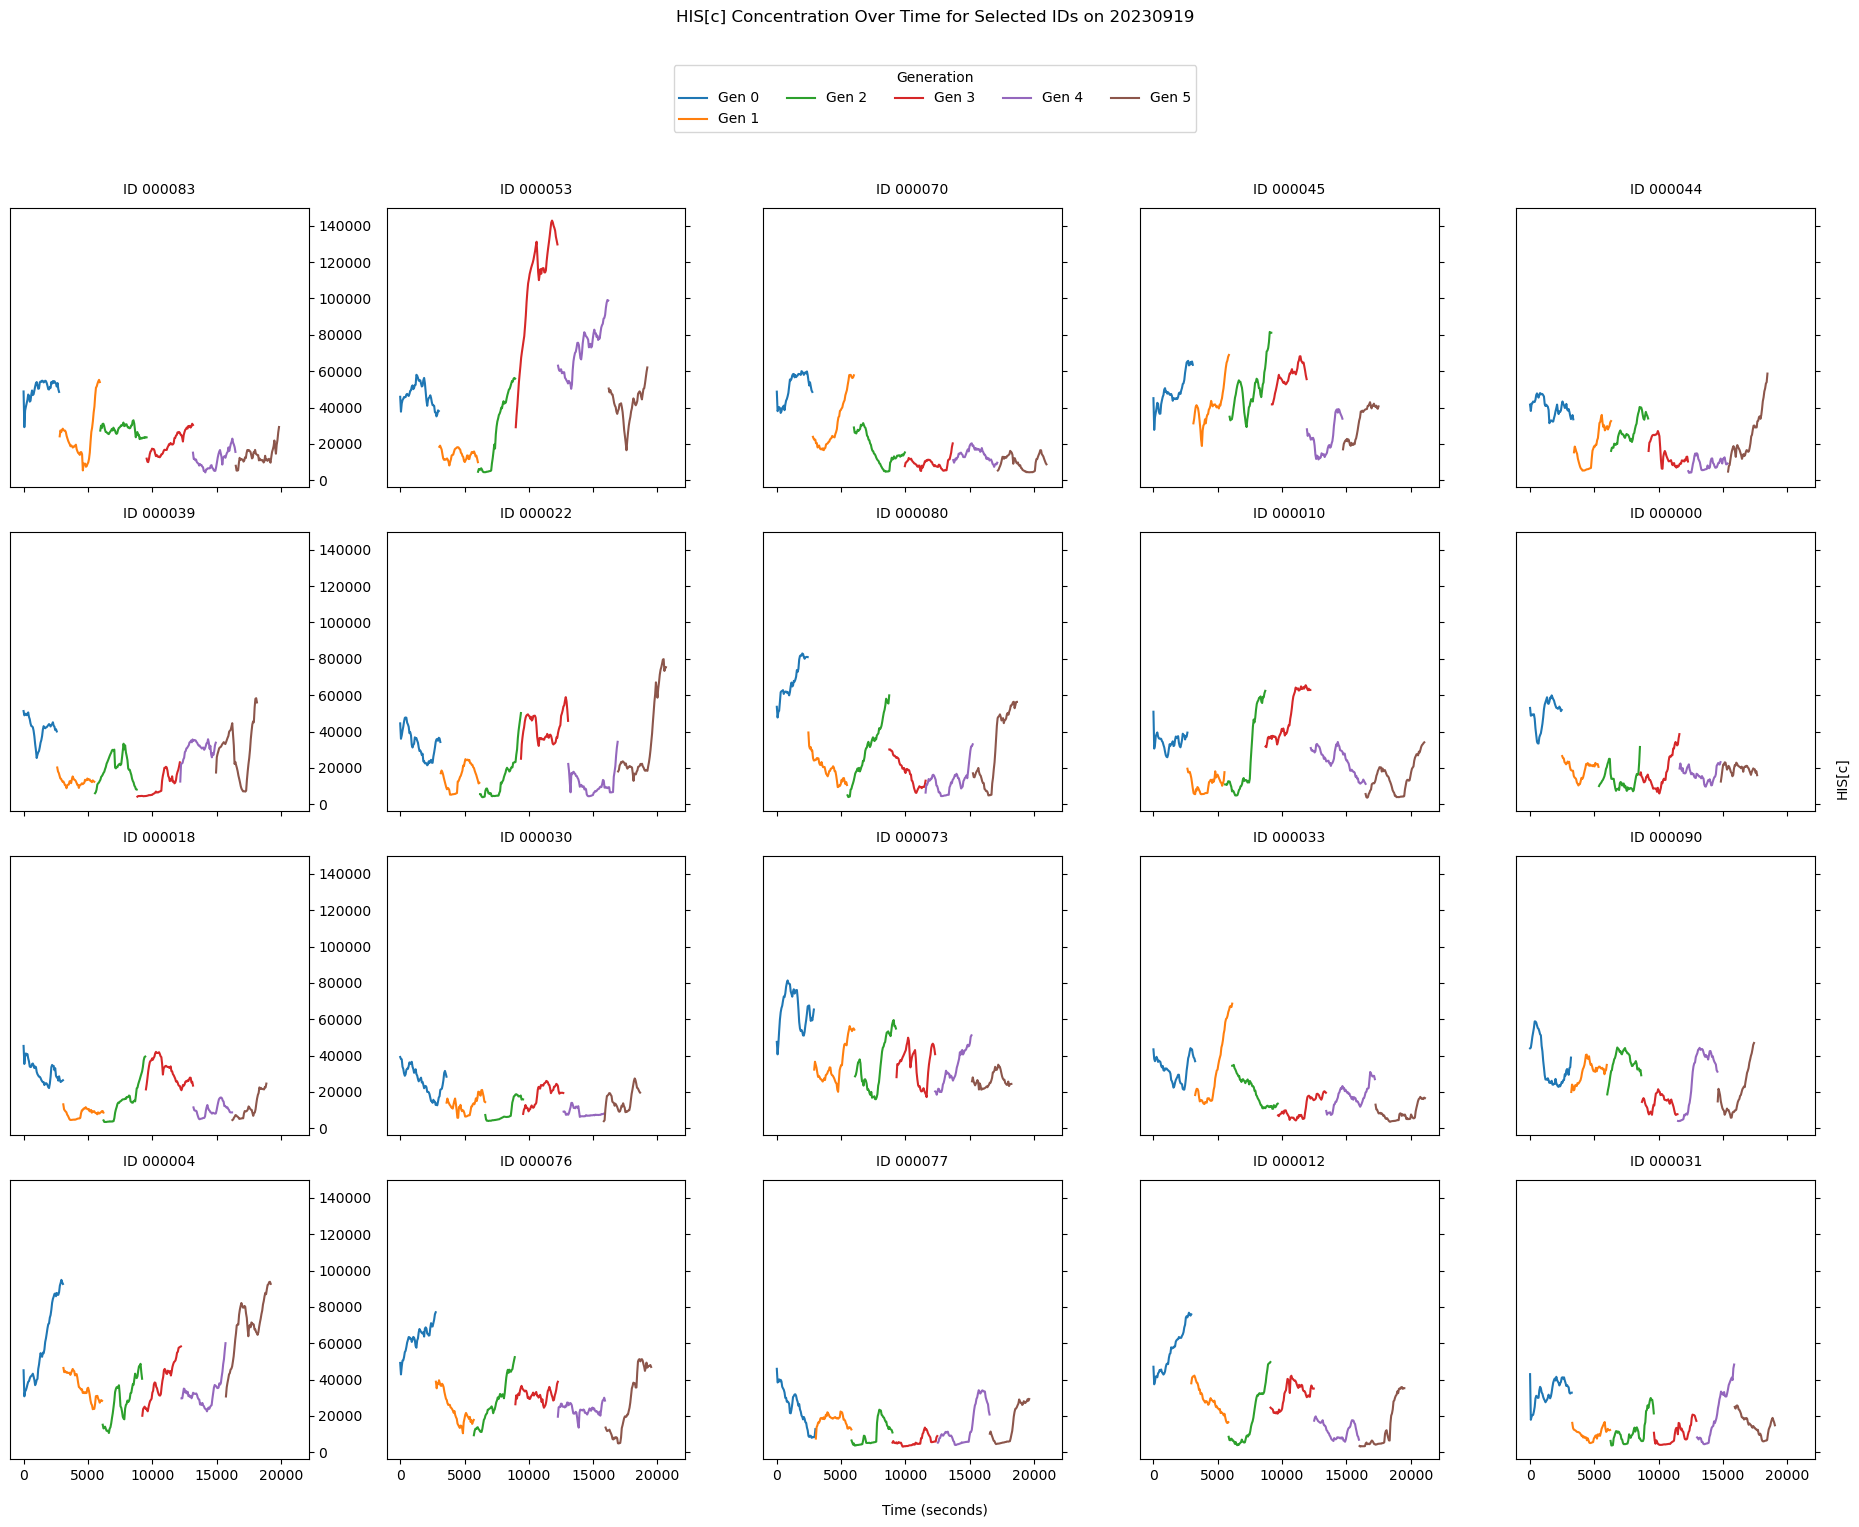

平均相关性 (HIS[c] 与 cellMass): 0.3341


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, HIS[c], 和 cellMass 列
wildtype_HIS = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','HIS[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_HIS = wildtype_data_new.explode('HIS[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_HIS['time'] = wildtype_exploded_t['time']
wildtype_exploded_HIS['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_HIS = wildtype_exploded_HIS[['date_of_sim','id','time','generation','cellMass','HIS[c]']]
wildtype_HIS.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_HIS.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_HIS['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_HIS[wildtype_HIS['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的HIS[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['HIS[c]'] = pd.to_numeric(df_gen_exploded['HIS[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'HIS[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['HIS[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['HIS[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'HIS[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'HIS[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\his"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (HIS[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\416909075.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_ILE.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


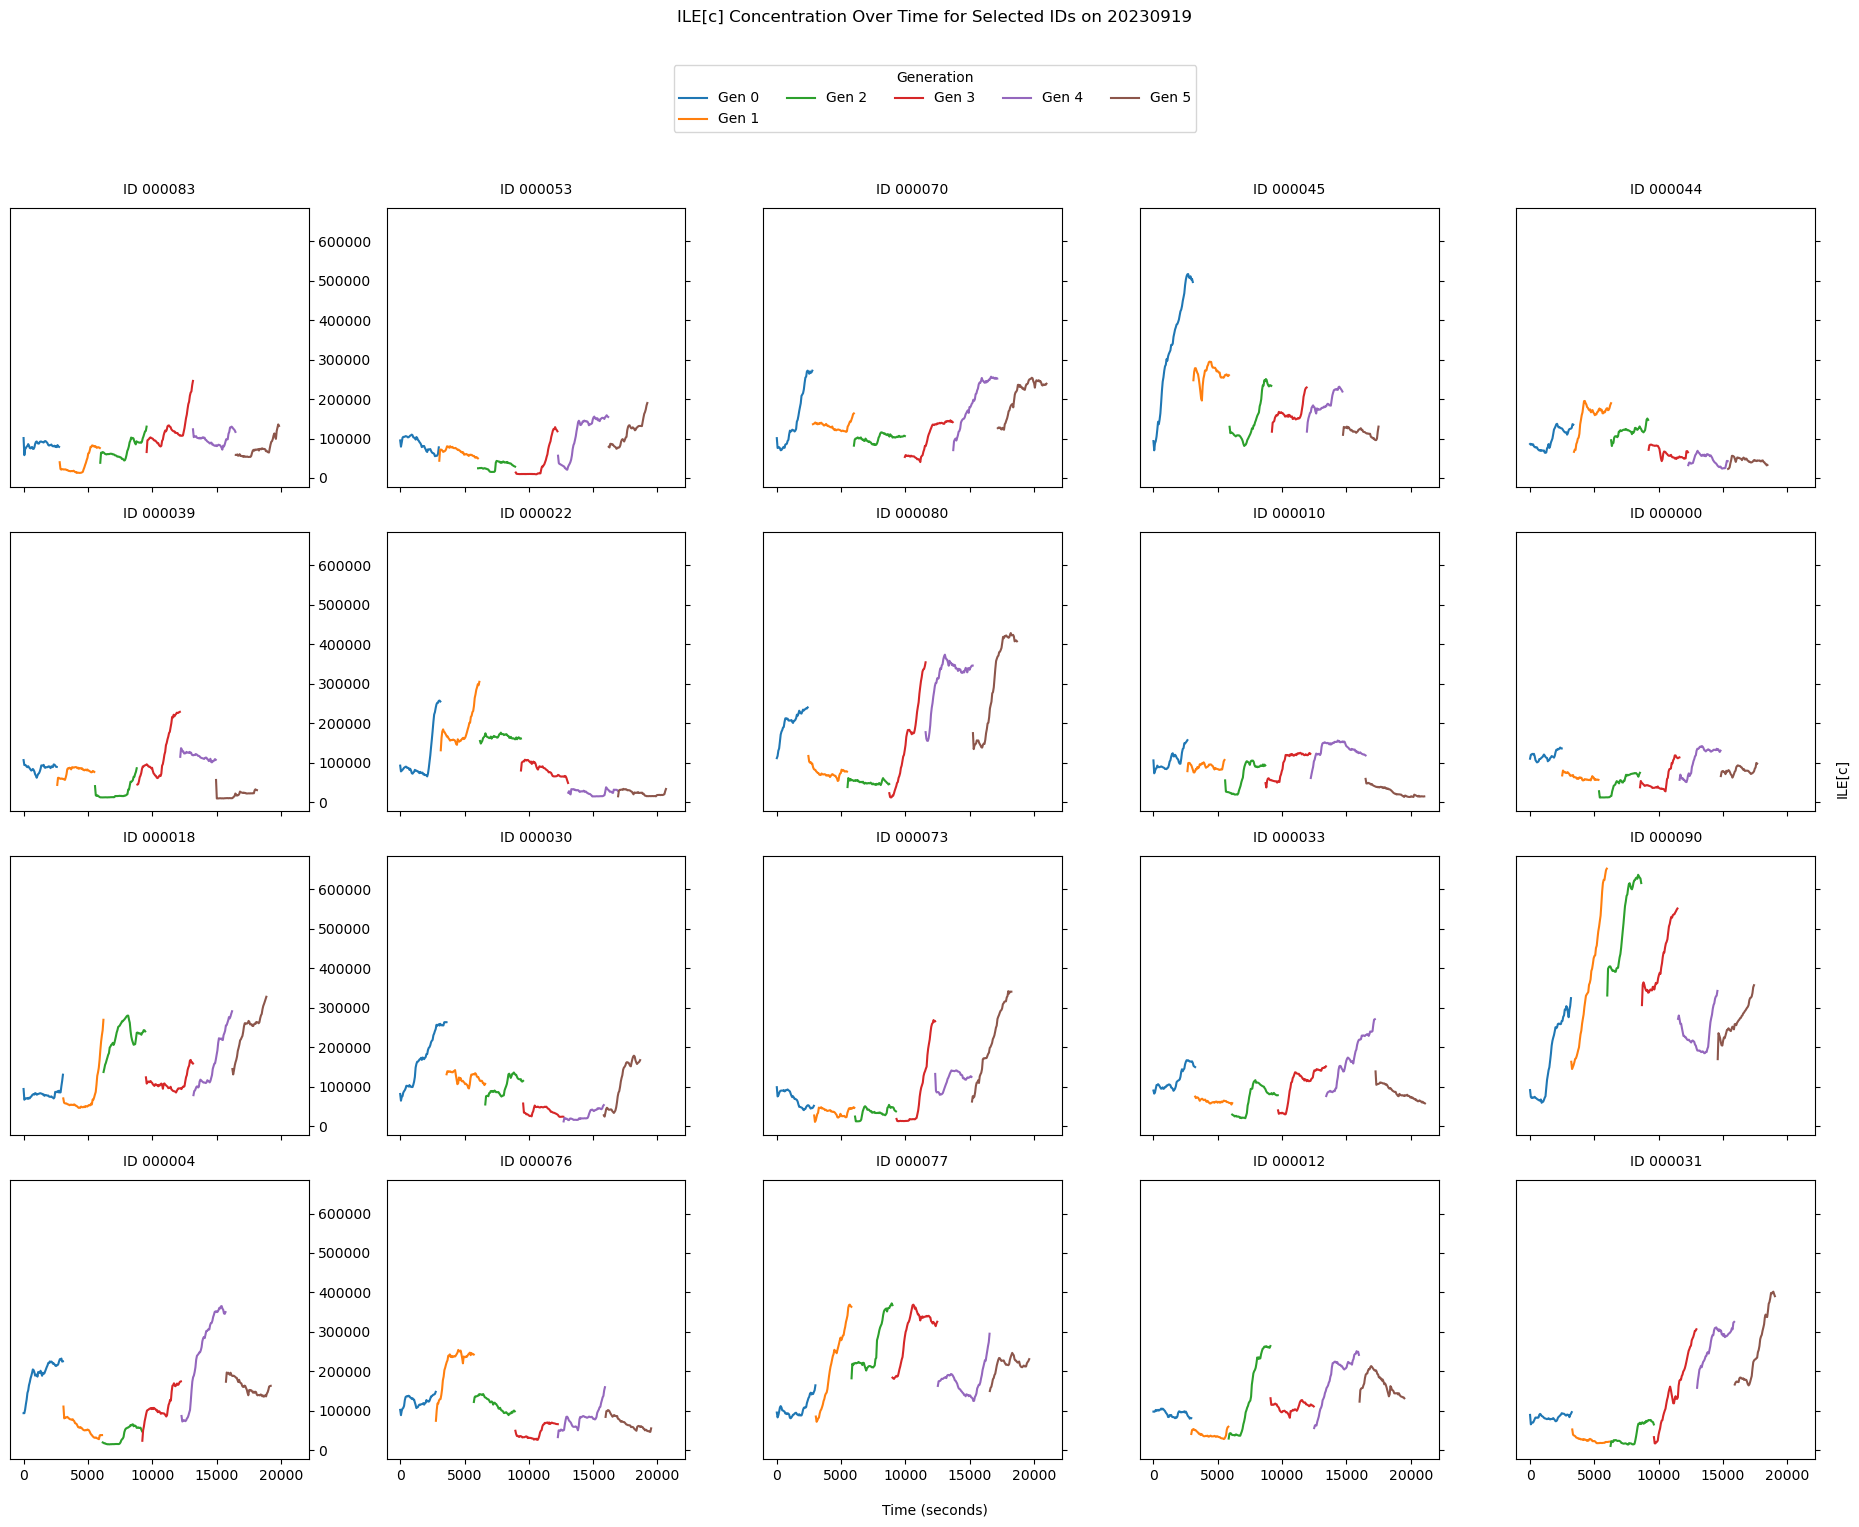

平均相关性 (ILE[c] 与 cellMass): 0.4067


In [30]:

# 复制数据并展开time, ILE[c], 和 cellMass 列
wildtype_ILE = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','ILE[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_ILE = wildtype_data_new.explode('ILE[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_ILE['time'] = wildtype_exploded_t['time']
wildtype_exploded_ILE['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_ILE = wildtype_exploded_ILE[['date_of_sim','id','time','generation','cellMass','ILE[c]']]
wildtype_ILE.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_ILE.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_ILE['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_ILE[wildtype_ILE['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的ILE[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['ILE[c]'] = pd.to_numeric(df_gen_exploded['ILE[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'ILE[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['ILE[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['ILE[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'ILE[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'ILE[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\ile"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (ILE[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\1209024521.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_ALA.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


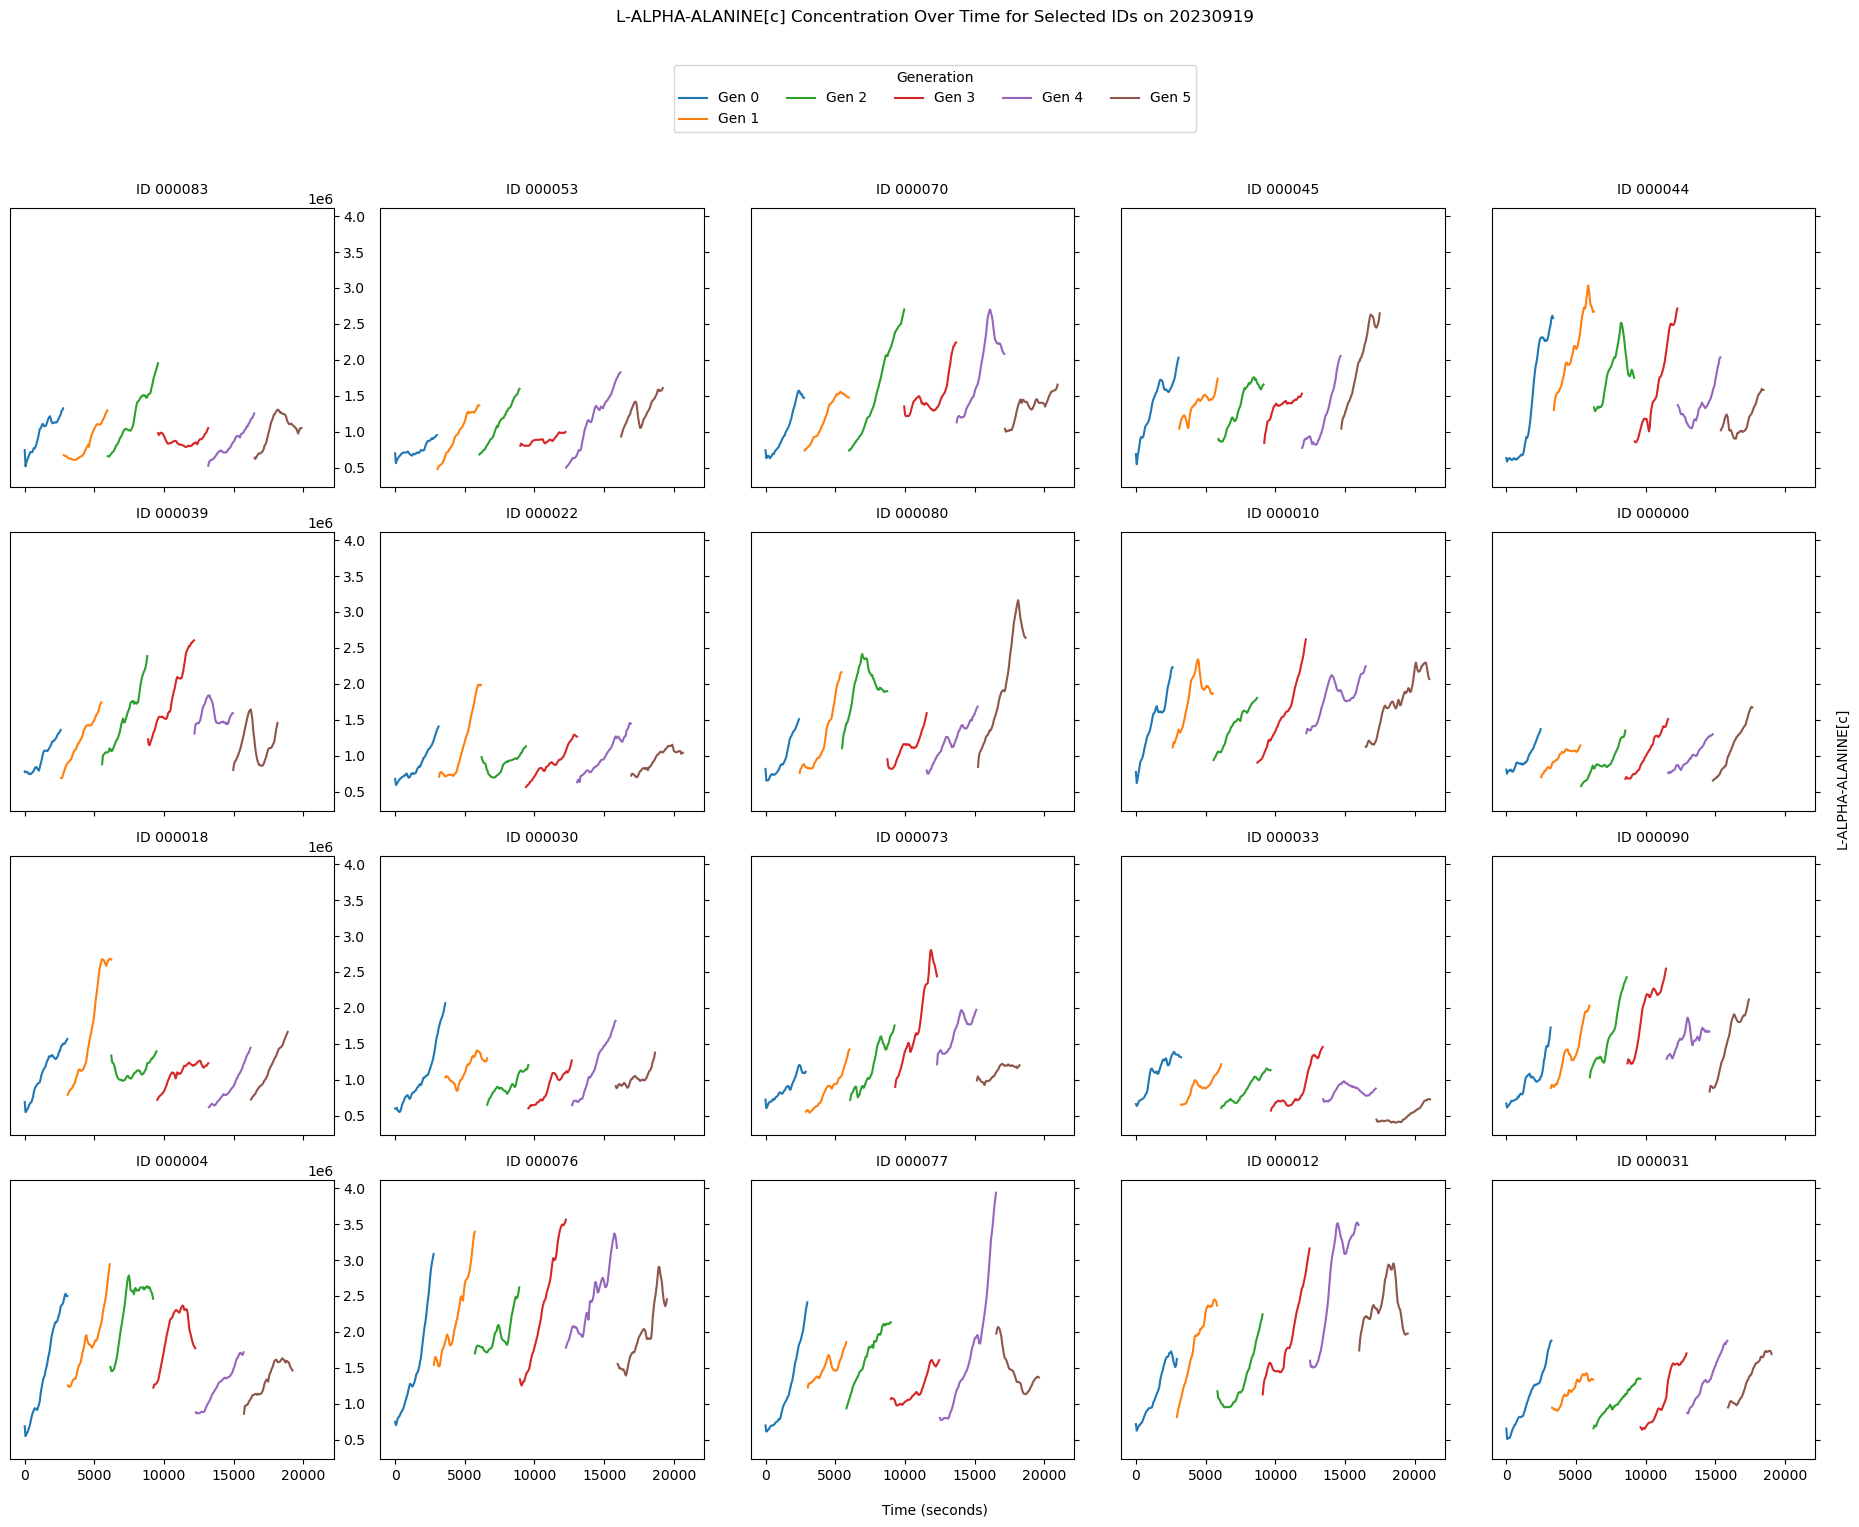

平均相关性 (L-ALPHA-ALANINE[c] 与 cellMass): 0.8668


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, L-ALPHA-ALANINE[c], 和 cellMass 列
wildtype_ALA = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','L-ALPHA-ALANINE[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_ALA = wildtype_data_new.explode('L-ALPHA-ALANINE[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_ALA['time'] = wildtype_exploded_t['time']
wildtype_exploded_ALA['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_ALA = wildtype_exploded_ALA[['date_of_sim','id','time','generation','cellMass','L-ALPHA-ALANINE[c]']]
wildtype_ALA.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_ALA.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_ALA['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_ALA[wildtype_ALA['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的L-ALPHA-ALANINE[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['L-ALPHA-ALANINE[c]'] = pd.to_numeric(df_gen_exploded['L-ALPHA-ALANINE[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'L-ALPHA-ALANINE[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['L-ALPHA-ALANINE[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['L-ALPHA-ALANINE[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'L-ALPHA-ALANINE[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'L-ALPHA-ALANINE[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\l-alpha-alanine"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (L-ALPHA-ALANINE[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\513879800.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_ASP.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


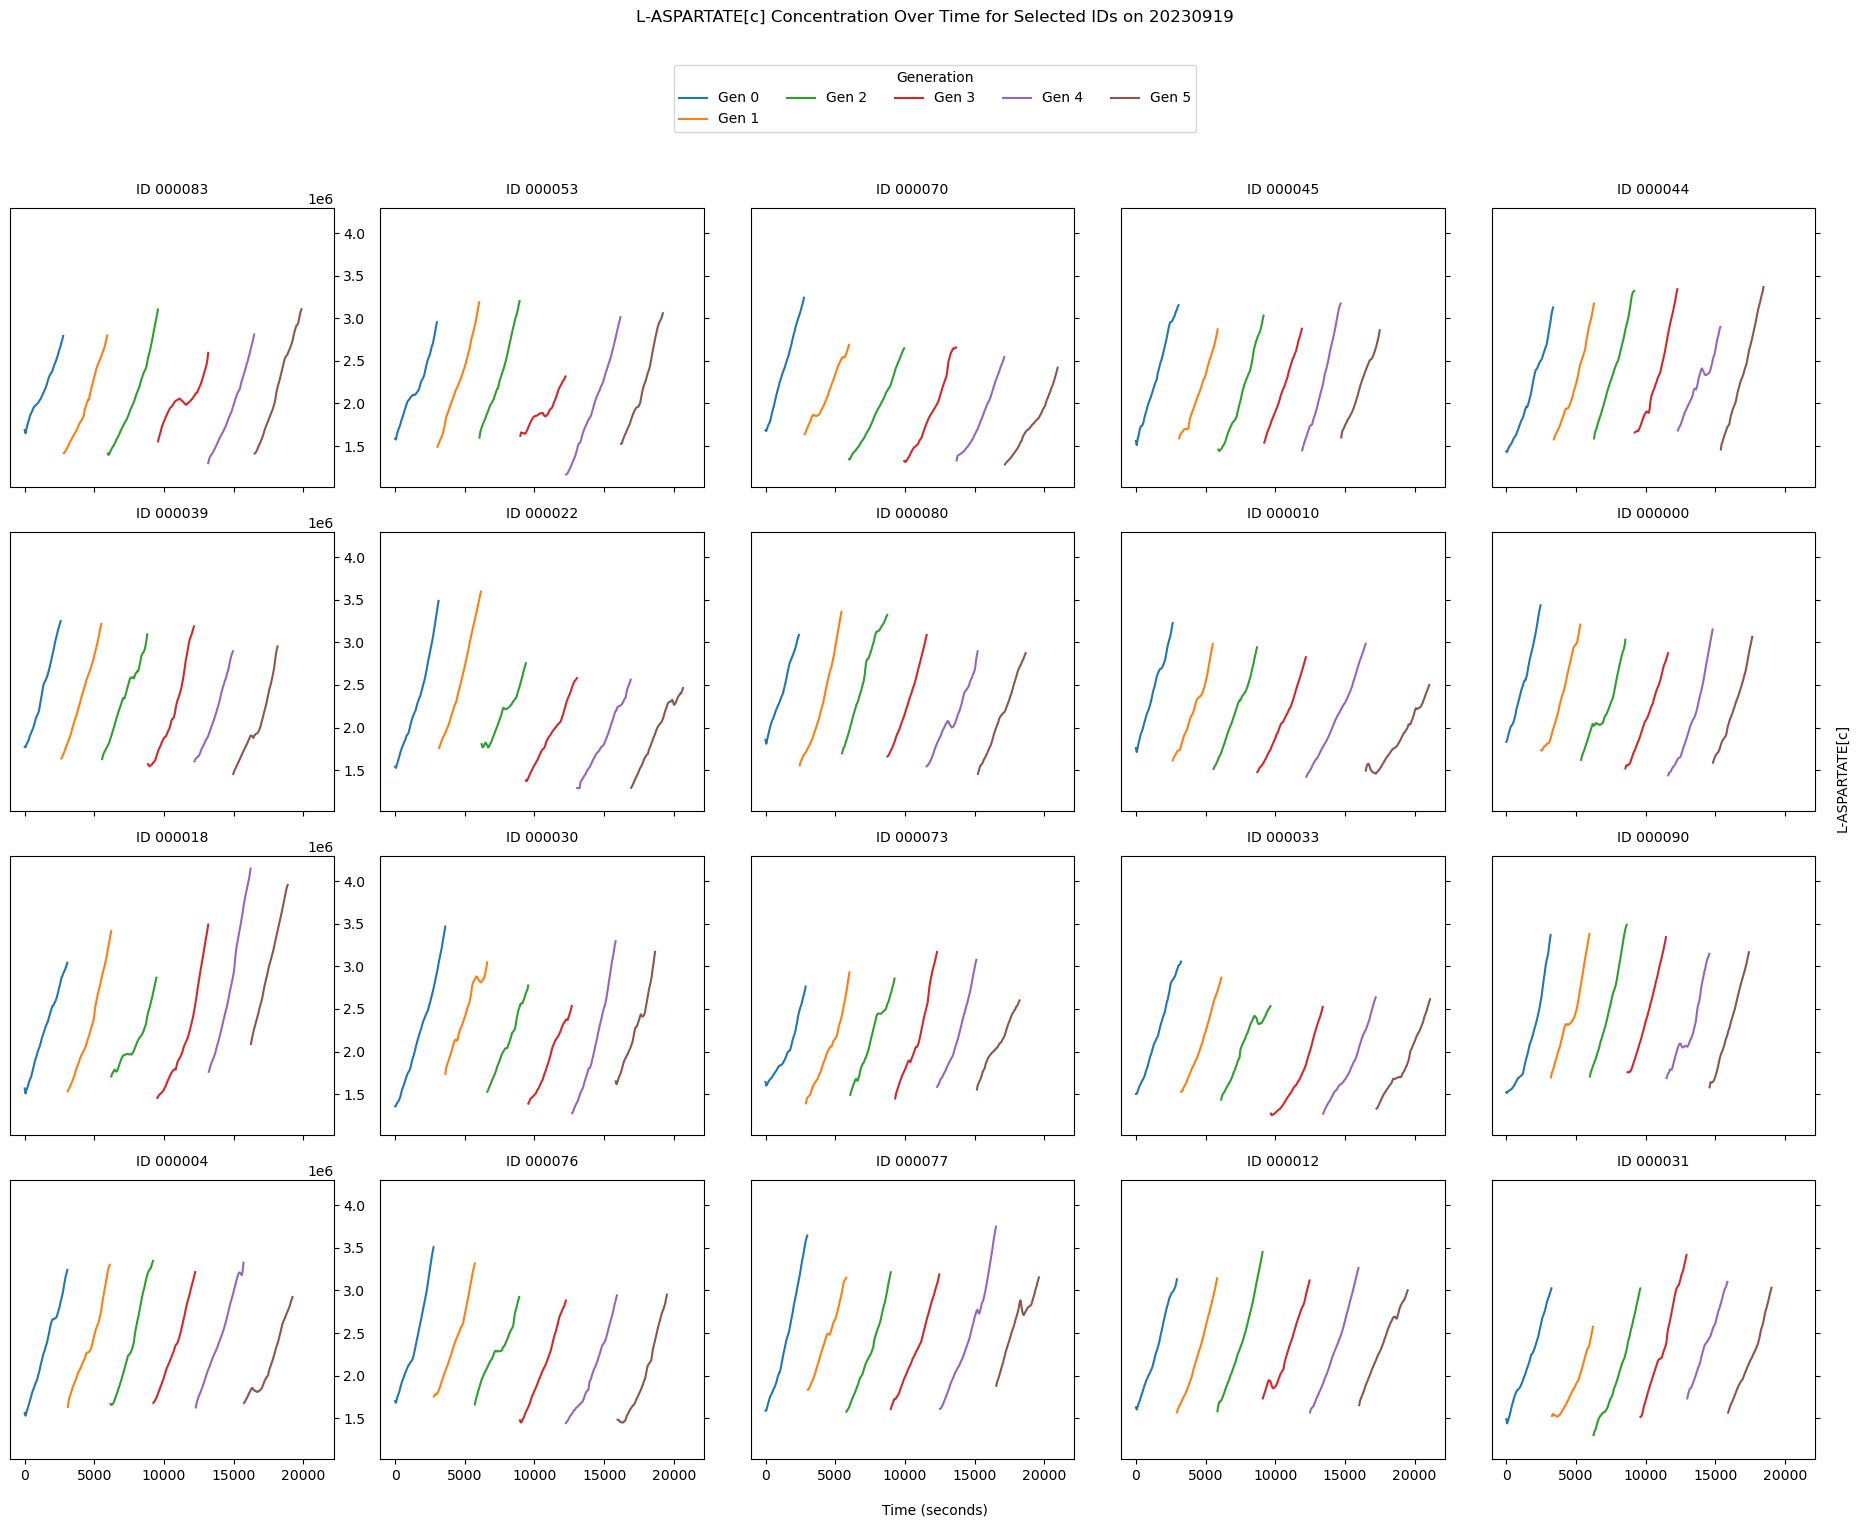

平均相关性 (L-ASPARTATE[c] 与 cellMass): 0.9932


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, L-ASPARTATE[c], 和 cellMass 列
wildtype_ASP = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','L-ASPARTATE[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_ASP = wildtype_data_new.explode('L-ASPARTATE[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_ASP['time'] = wildtype_exploded_t['time']
wildtype_exploded_ASP['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_ASP = wildtype_exploded_ASP[['date_of_sim','id','time','generation','cellMass','L-ASPARTATE[c]']]
wildtype_ASP.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_ASP.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_ASP['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_ASP[wildtype_ASP['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的L-ASPARTATE[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['L-ASPARTATE[c]'] = pd.to_numeric(df_gen_exploded['L-ASPARTATE[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'L-ASPARTATE[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['L-ASPARTATE[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['L-ASPARTATE[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'L-ASPARTATE[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'L-ASPARTATE[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\l-aspartate"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (L-ASPARTATE[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\72219362.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_LEU.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


    date_of_sim      id    time generation     cellMass  LEU[c]
297    20230919  000000     0.0          0   1321.14572  109939
297    20230919  000000    60.0          0  1335.834018   95504
297    20230919  000000   120.0          0  1354.190268  102641
297    20230919  000000   180.0          0  1372.474505  108725
297    20230919  000000   240.0          0  1391.641015  106680
297    20230919  000000   300.0          0  1410.519576  108354
297    20230919  000000   360.0          0  1429.445337  101196
297    20230919  000000   420.0          0  1448.959342   82530
297    20230919  000000   480.0          0  1470.458609   71489
297    20230919  000000   540.0          0  1492.628502   62924
297    20230919  000000   600.0          0   1515.21254   60659
297    20230919  000000   660.0          0  1538.158422   61655
297    20230919  000000   720.0          0  1561.183336   69710
297    20230919  000000   780.0          0  1583.134694   67225
297    20230919  000000   840.0         

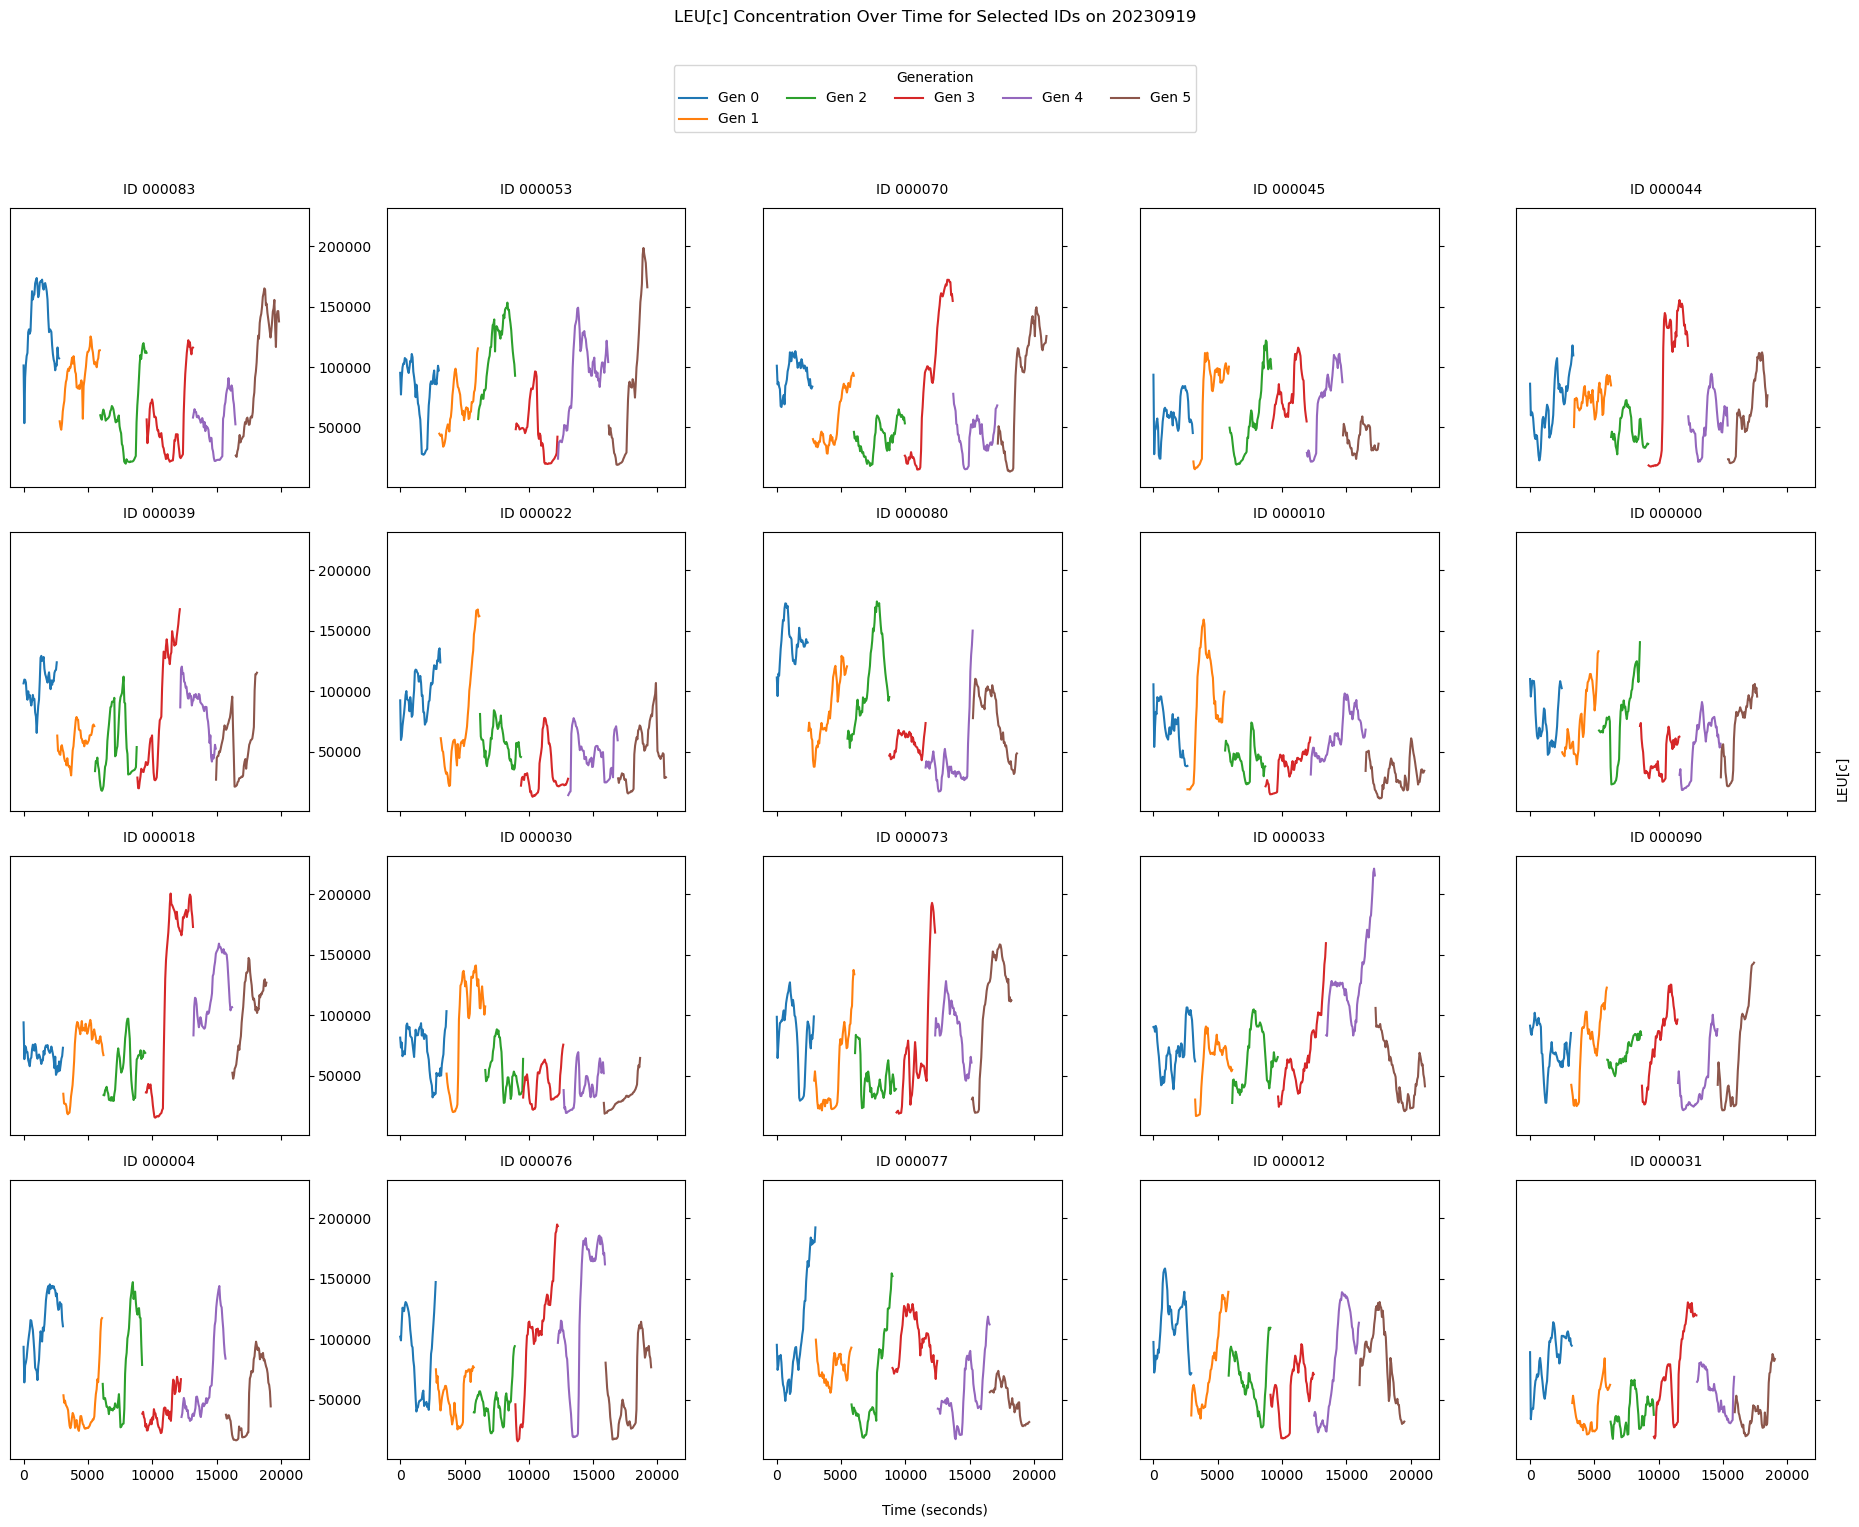

平均相关性 (LEU[c] 与 cellMass): 0.3958


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, LEU[c], 和 cellMass 列
wildtype_LEU = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','LEU[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_LEU = wildtype_data_new.explode('LEU[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_LEU['time'] = wildtype_exploded_t['time']
wildtype_exploded_LEU['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_LEU = wildtype_exploded_LEU[['date_of_sim','id','time','generation','cellMass','LEU[c]']]
wildtype_LEU.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
print(wildtype_LEU.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_LEU['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_LEU[wildtype_LEU['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的LEU[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['LEU[c]'] = pd.to_numeric(df_gen_exploded['LEU[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'LEU[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['LEU[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['LEU[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'LEU[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'LEU[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\leu"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (LEU[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\1327600962.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_LYS.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


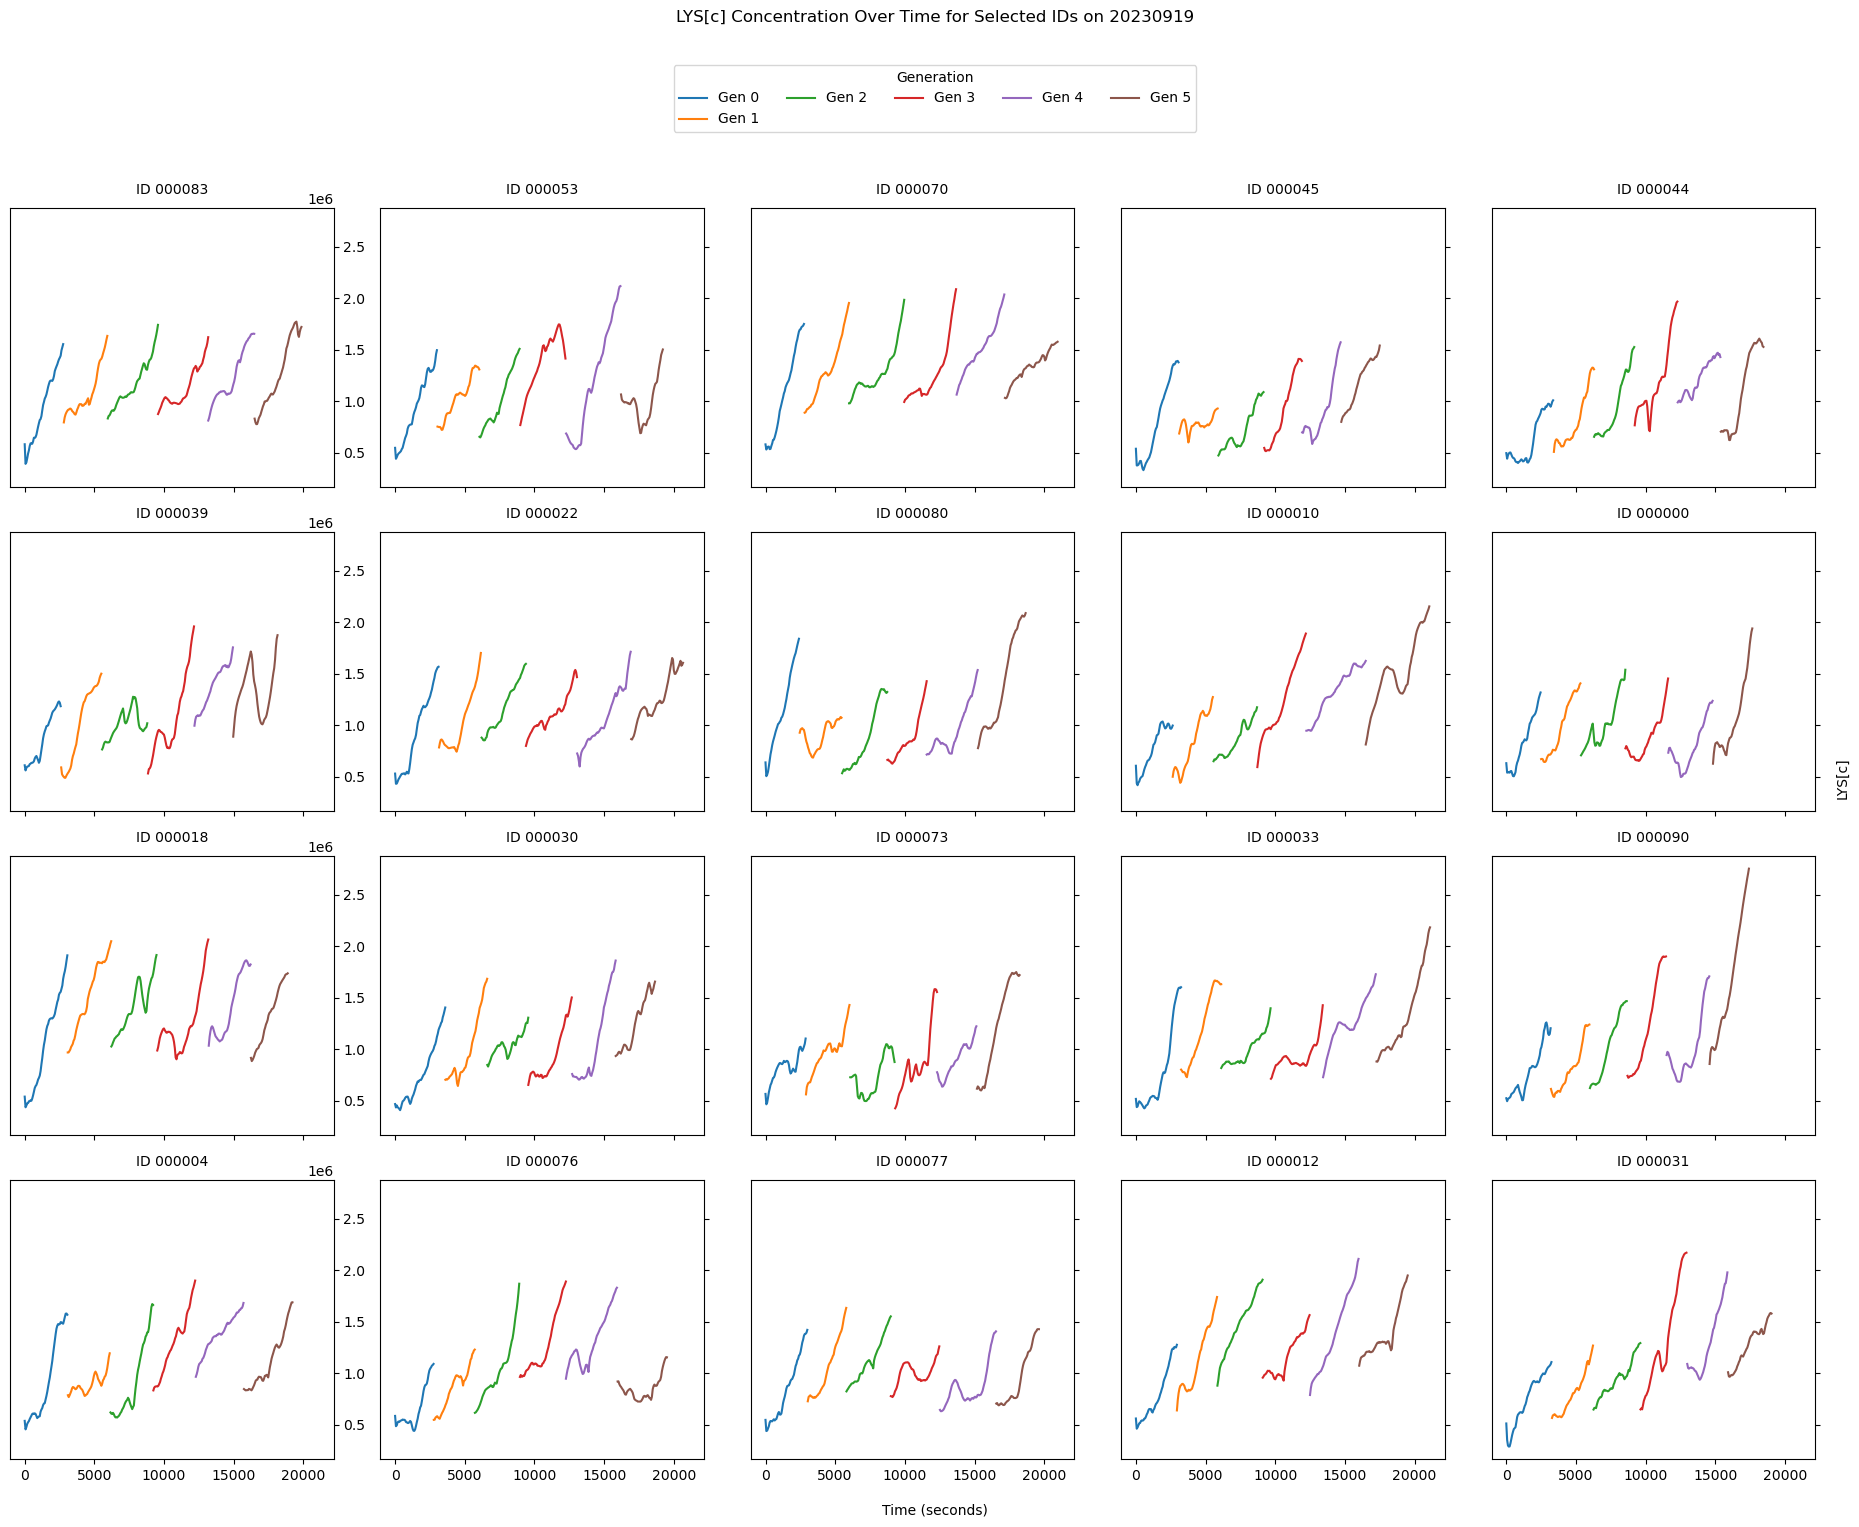

平均相关性 (LYS[c] 与 cellMass): 0.9213


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, LYS[c], 和 cellMass 列
wildtype_LYS = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','LYS[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_LYS = wildtype_data_new.explode('LYS[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_LYS['time'] = wildtype_exploded_t['time']
wildtype_exploded_LYS['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_LYS = wildtype_exploded_LYS[['date_of_sim','id','time','generation','cellMass','LYS[c]']]
wildtype_LYS.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_LYS.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_LYS['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_LYS[wildtype_LYS['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的LYS[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['LYS[c]'] = pd.to_numeric(df_gen_exploded['LYS[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'LYS[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['LYS[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['LYS[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'LYS[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'LYS[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\lys"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (LYS[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\2060077660.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_MET.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


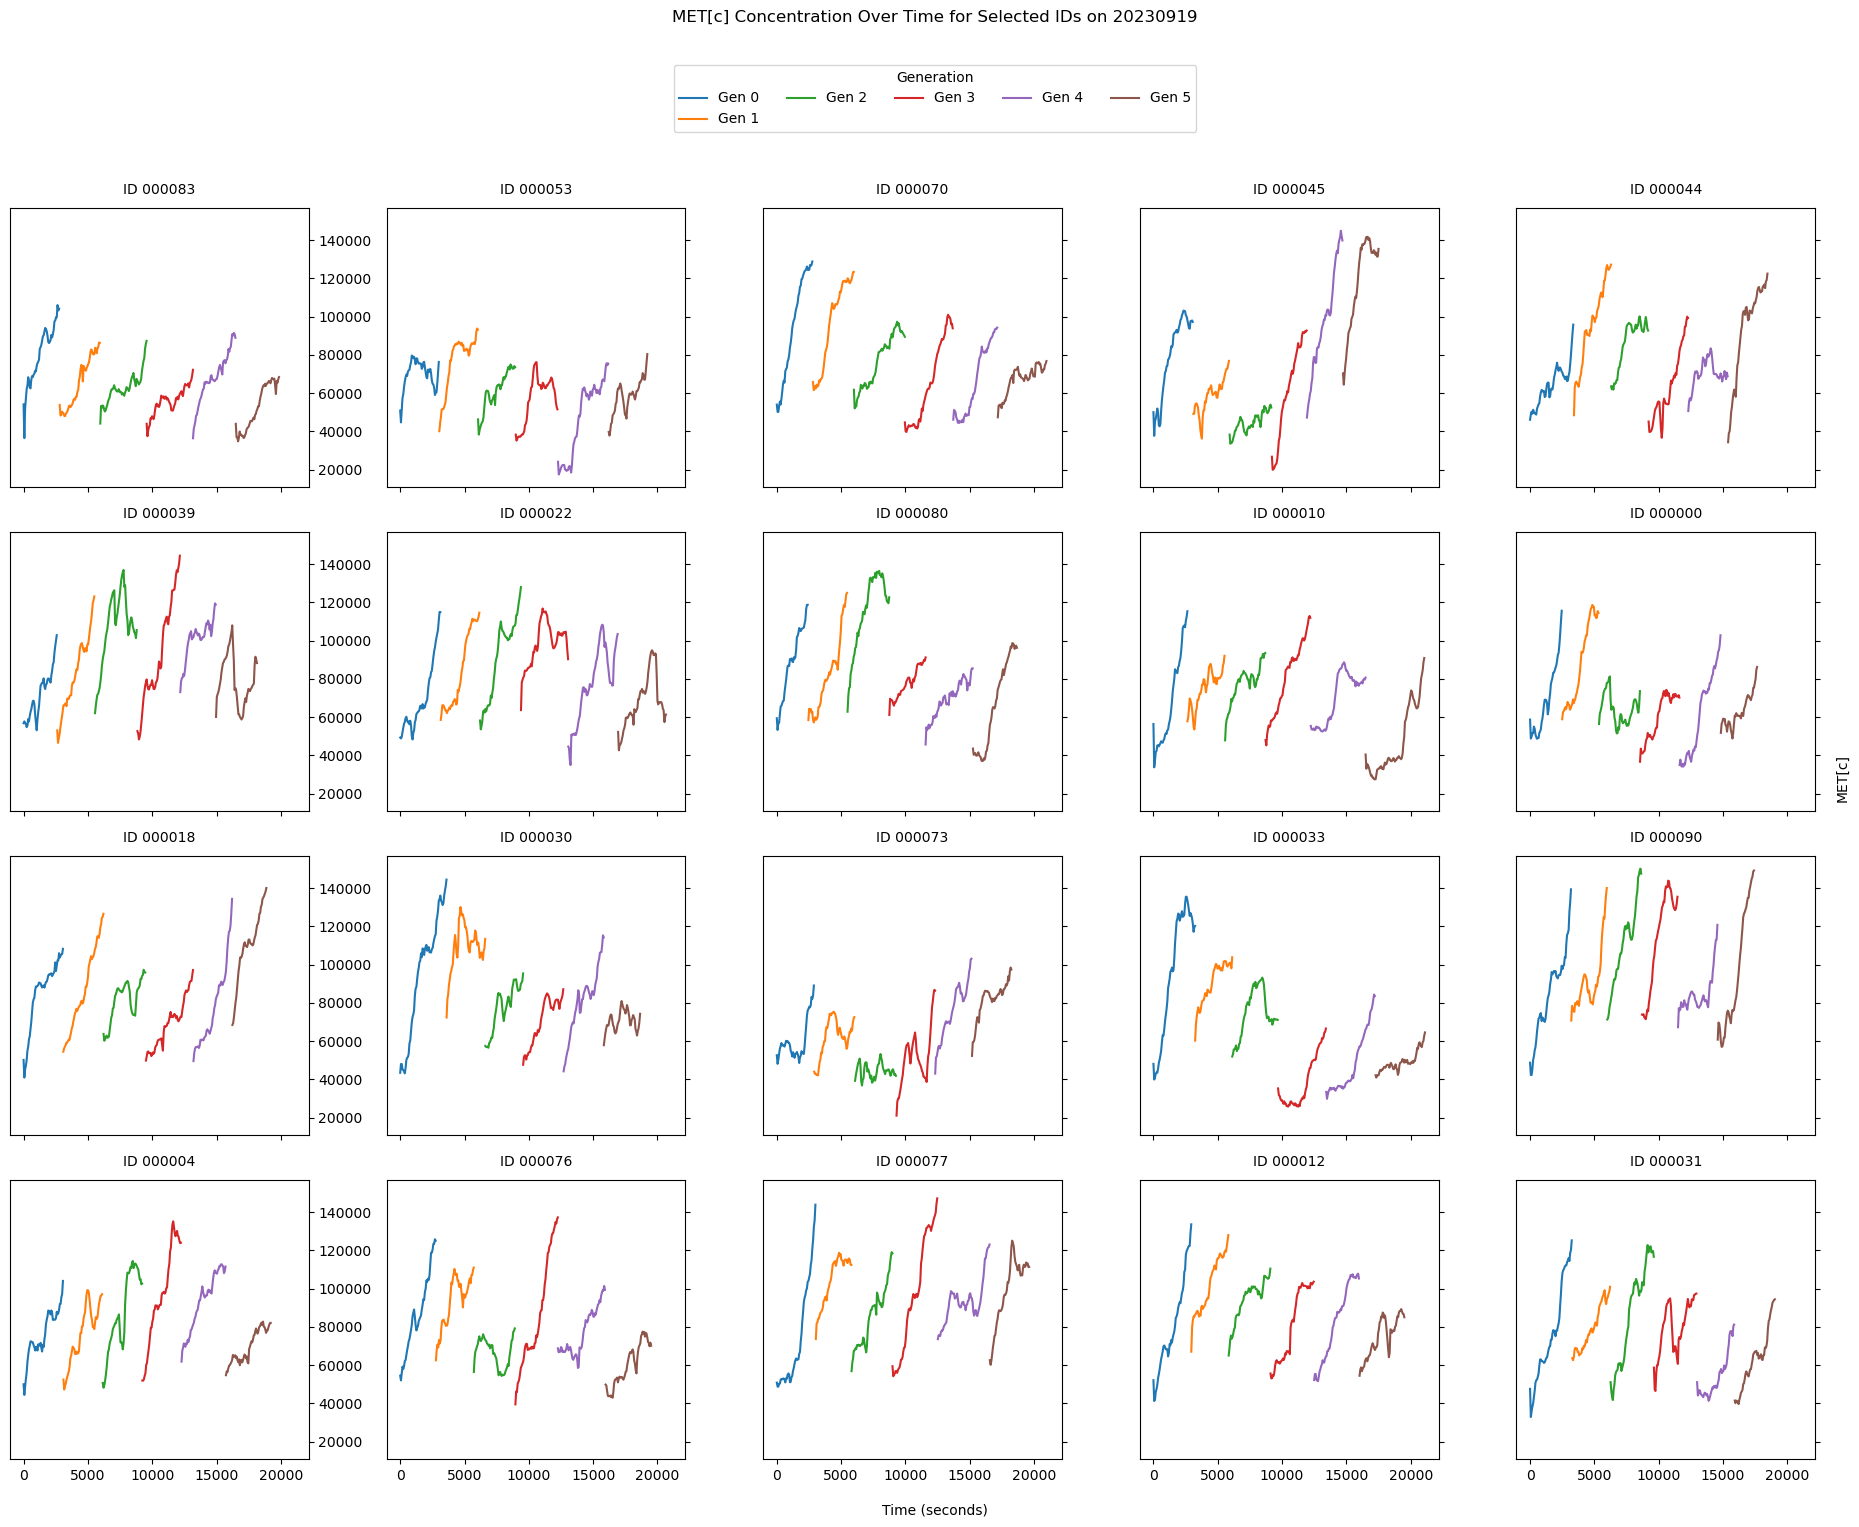

平均相关性 (MET[c] 与 cellMass): 0.8316


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, MET[c], 和 cellMass 列
wildtype_MET = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','MET[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_MET = wildtype_data_new.explode('MET[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_MET['time'] = wildtype_exploded_t['time']
wildtype_exploded_MET['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_MET = wildtype_exploded_MET[['date_of_sim','id','time','generation','cellMass','MET[c]']]
wildtype_MET.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_MET.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_MET['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_MET[wildtype_MET['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的MET[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['MET[c]'] = pd.to_numeric(df_gen_exploded['MET[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'MET[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['MET[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['MET[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'MET[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'MET[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\met"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (MET[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\3411974842.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_PHE.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


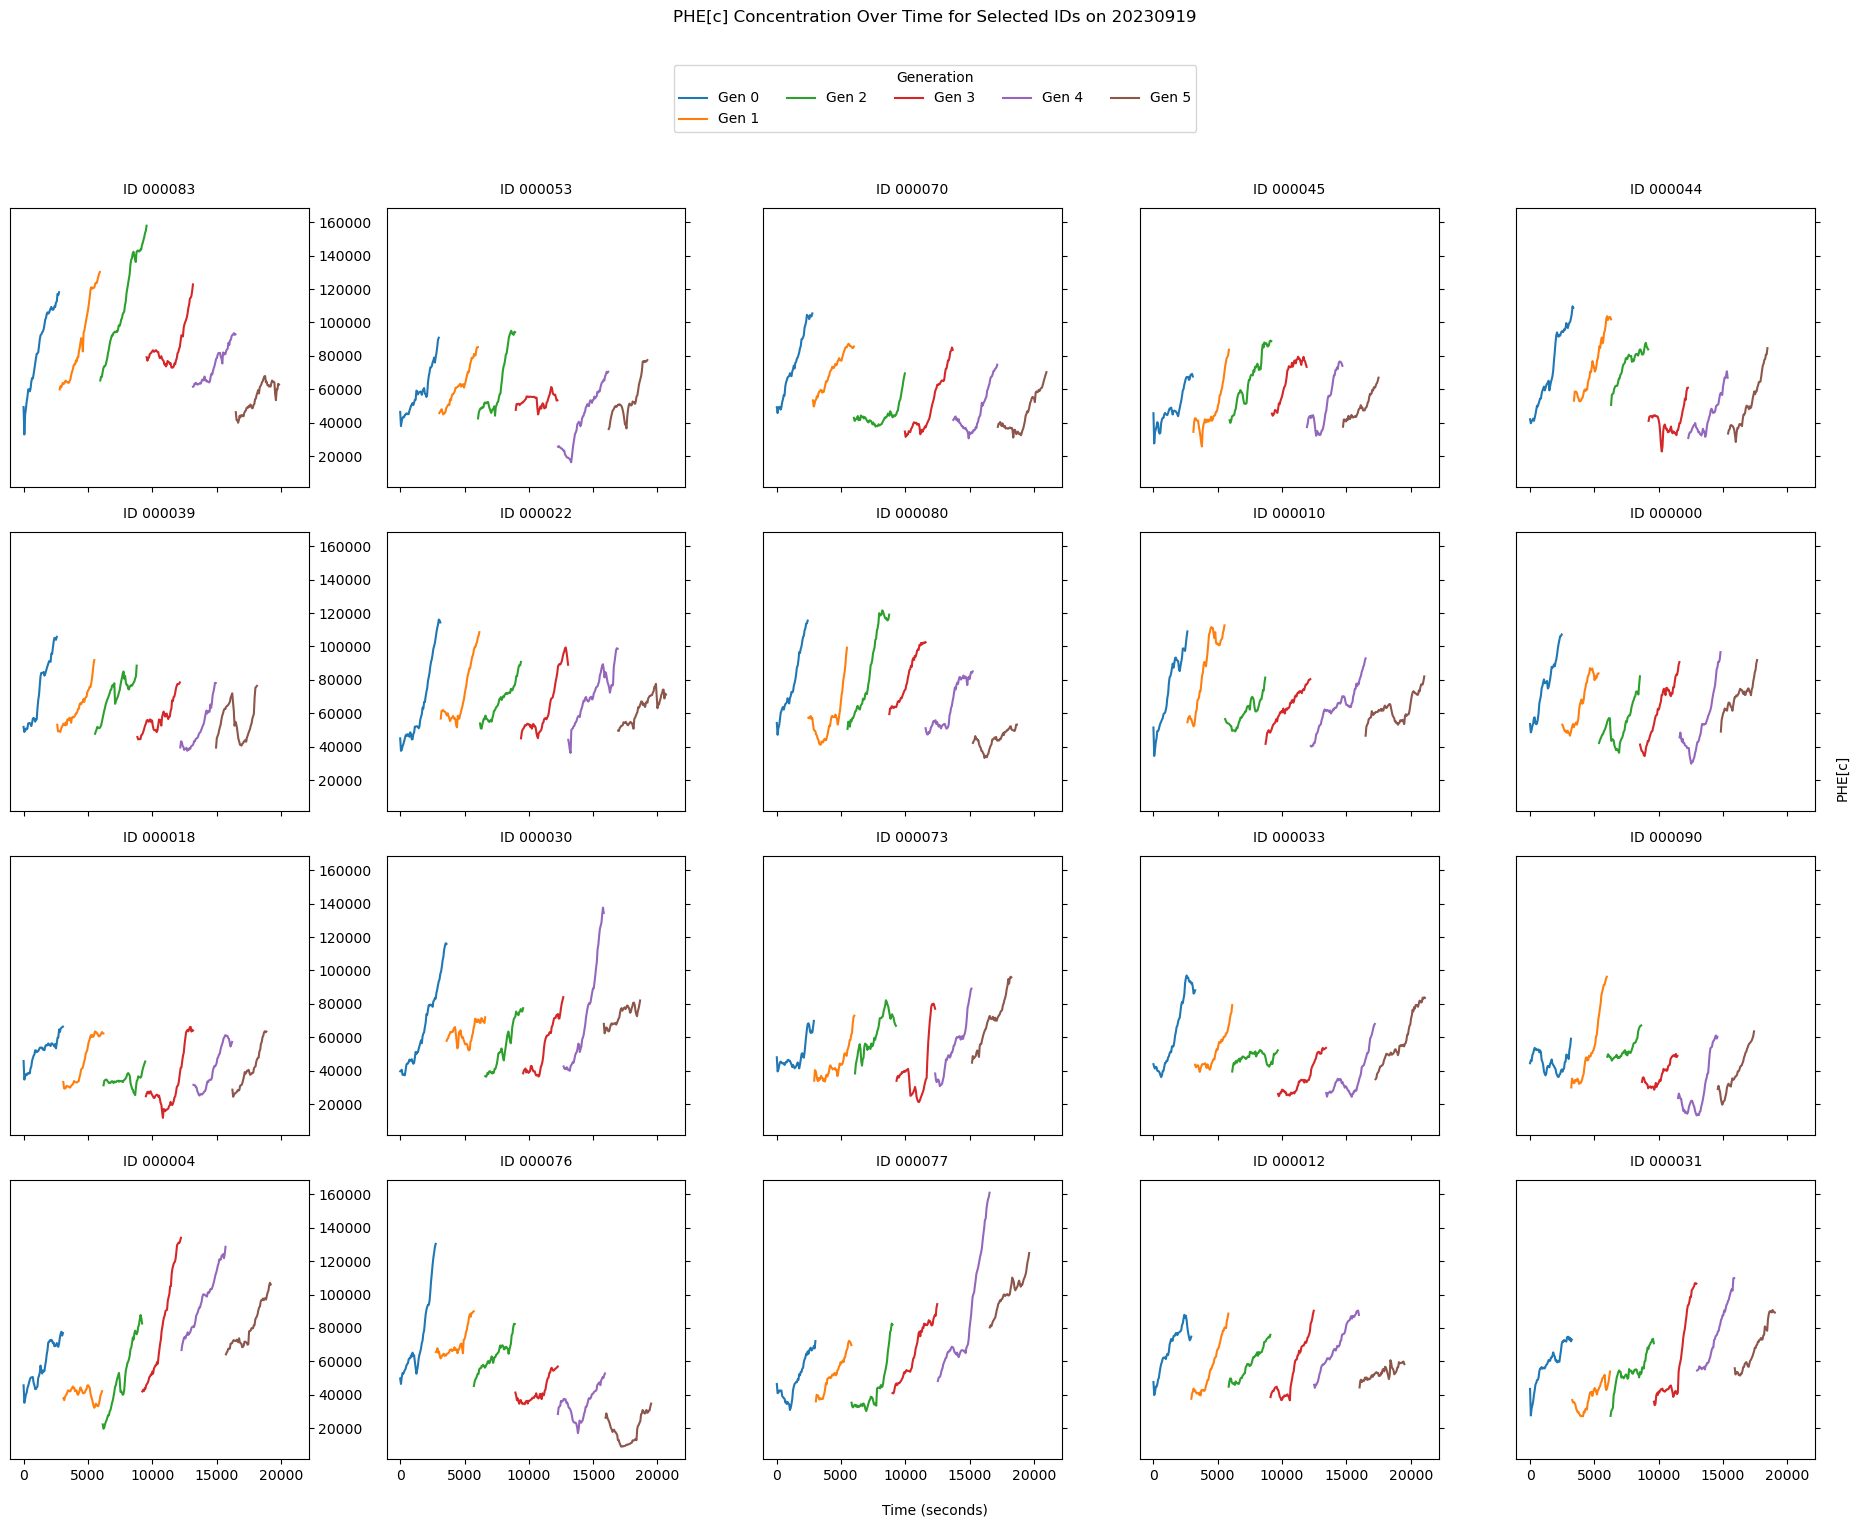

平均相关性 (PHE[c] 与 cellMass): 0.8649


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, PHE[c], 和 cellMass 列
wildtype_PHE = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','PHE[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_PHE = wildtype_data_new.explode('PHE[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_PHE['time'] = wildtype_exploded_t['time']
wildtype_exploded_PHE['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_PHE = wildtype_exploded_PHE[['date_of_sim','id','time','generation','cellMass','PHE[c]']]
wildtype_PHE.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_PHE.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_PHE['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_PHE[wildtype_PHE['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的PHE[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['PHE[c]'] = pd.to_numeric(df_gen_exploded['PHE[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'PHE[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['PHE[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['PHE[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'PHE[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'PHE[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\phe"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (PHE[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\2224736940.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_PRO.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


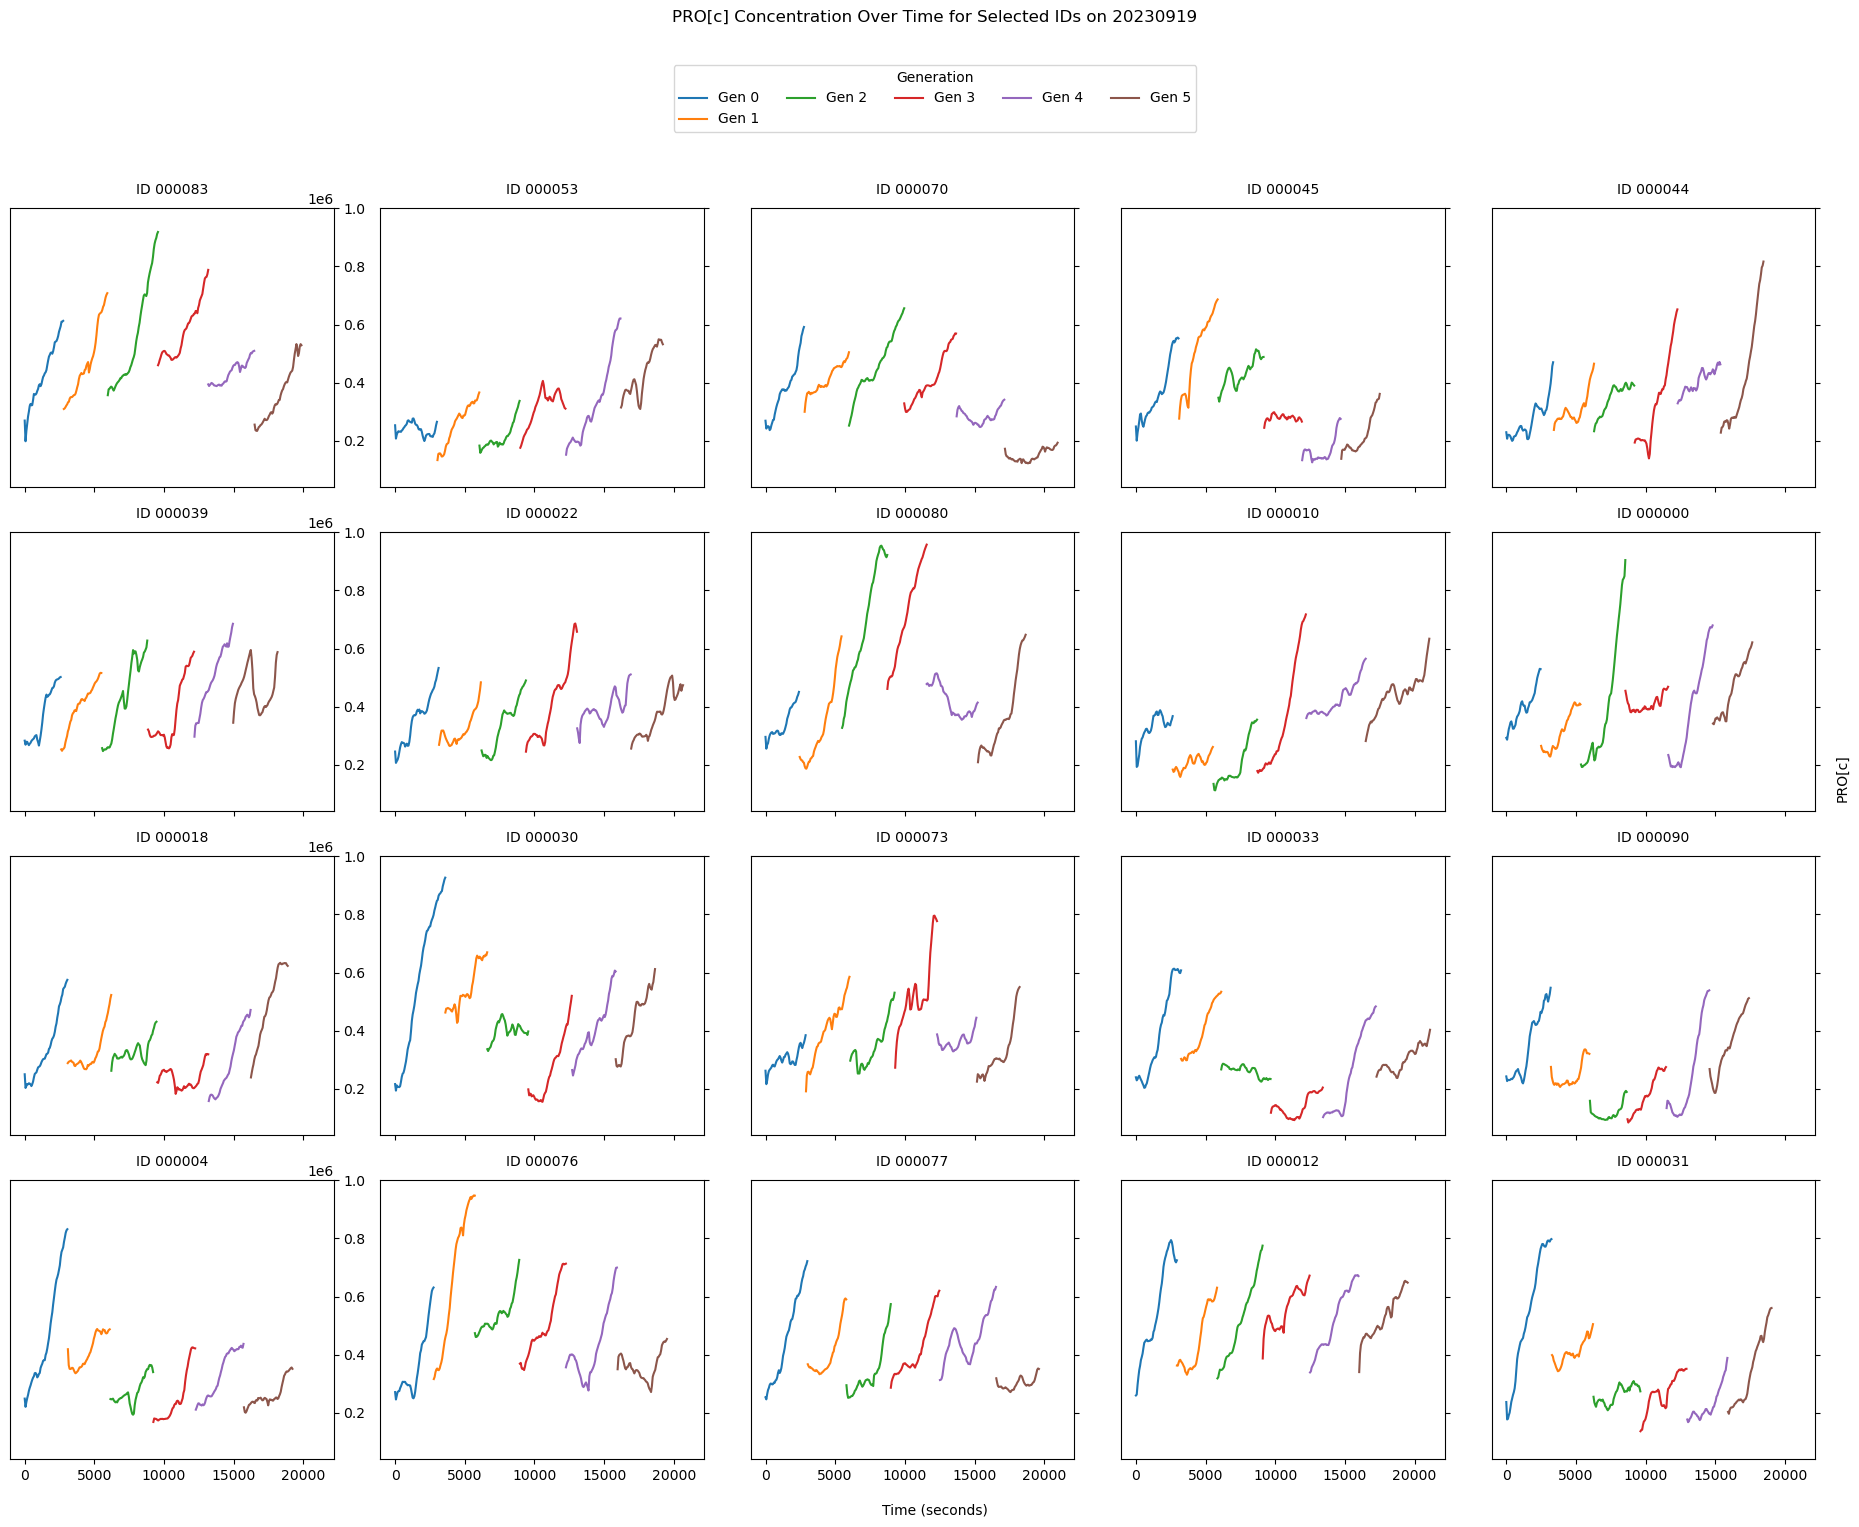

平均相关性 (PRO[c] 与 cellMass): 0.8320


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, PRO[c], 和 cellMass 列
wildtype_PRO = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','PRO[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_PRO = wildtype_data_new.explode('PRO[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_PRO['time'] = wildtype_exploded_t['time']
wildtype_exploded_PRO['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_PRO = wildtype_exploded_PRO[['date_of_sim','id','time','generation','cellMass','PRO[c]']]
wildtype_PRO.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_PRO.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_PRO['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_PRO[wildtype_PRO['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的PRO[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['PRO[c]'] = pd.to_numeric(df_gen_exploded['PRO[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'PRO[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['PRO[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['PRO[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'PRO[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'PRO[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\pro"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (PRO[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\1757060017.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_SER.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


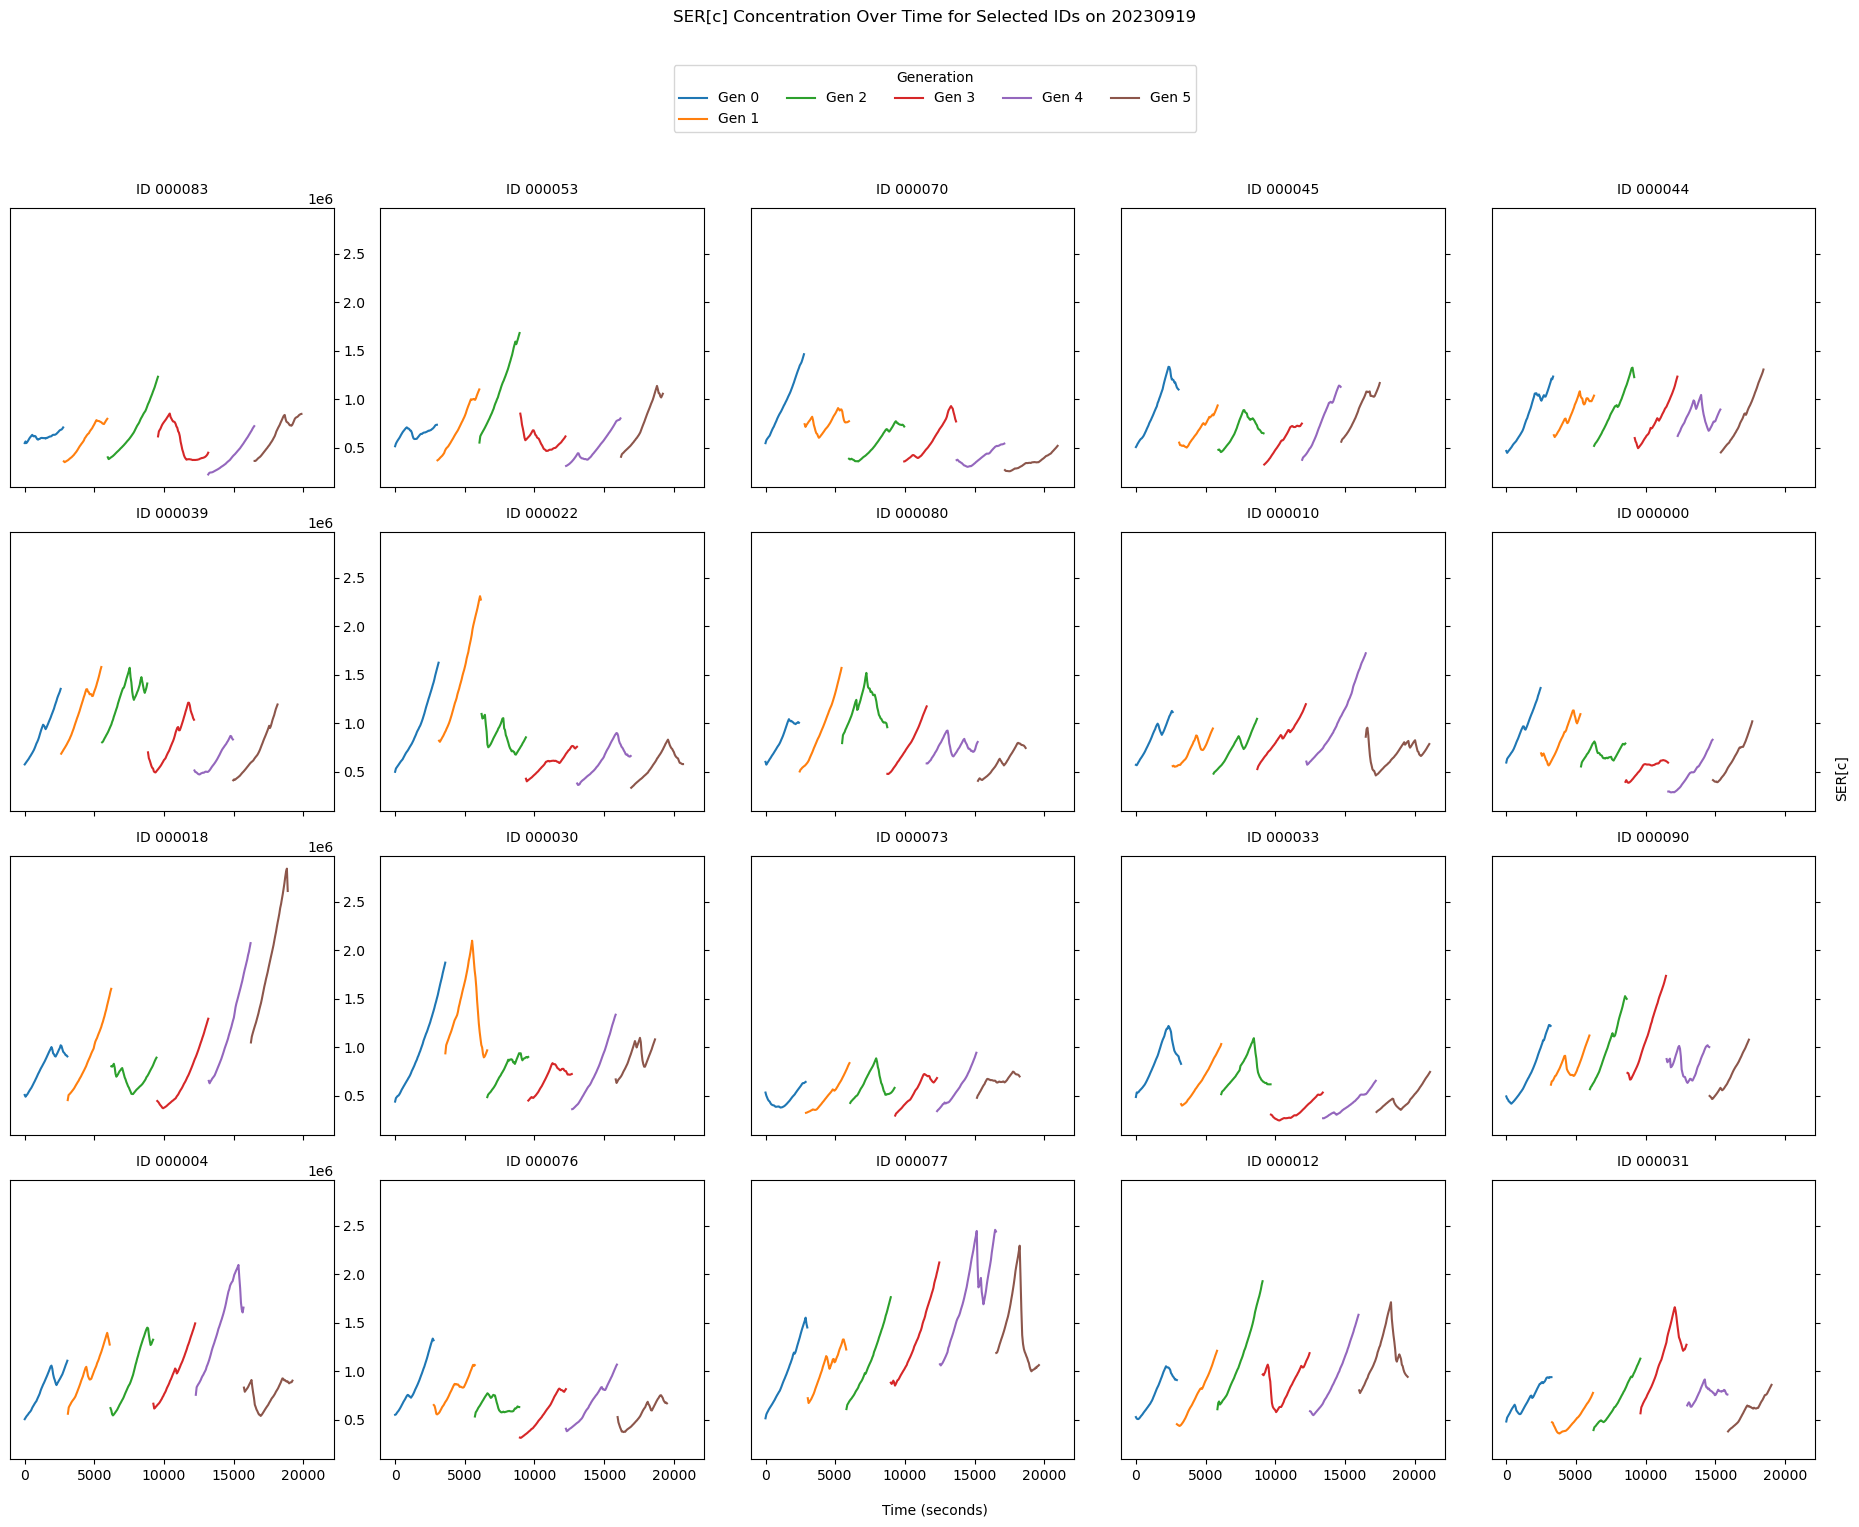

平均相关性 (SER[c] 与 cellMass): 0.7953


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, SER[c], 和 cellMass 列
wildtype_SER = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','SER[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_SER = wildtype_data_new.explode('SER[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_SER['time'] = wildtype_exploded_t['time']
wildtype_exploded_SER['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_SER = wildtype_exploded_SER[['date_of_sim','id','time','generation','cellMass','SER[c]']]
wildtype_SER.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_SER.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_SER['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_SER[wildtype_SER['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的SER[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['SER[c]'] = pd.to_numeric(df_gen_exploded['SER[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'SER[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['SER[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['SER[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'SER[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'SER[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\ser"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (SER[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\1376616868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_THR.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


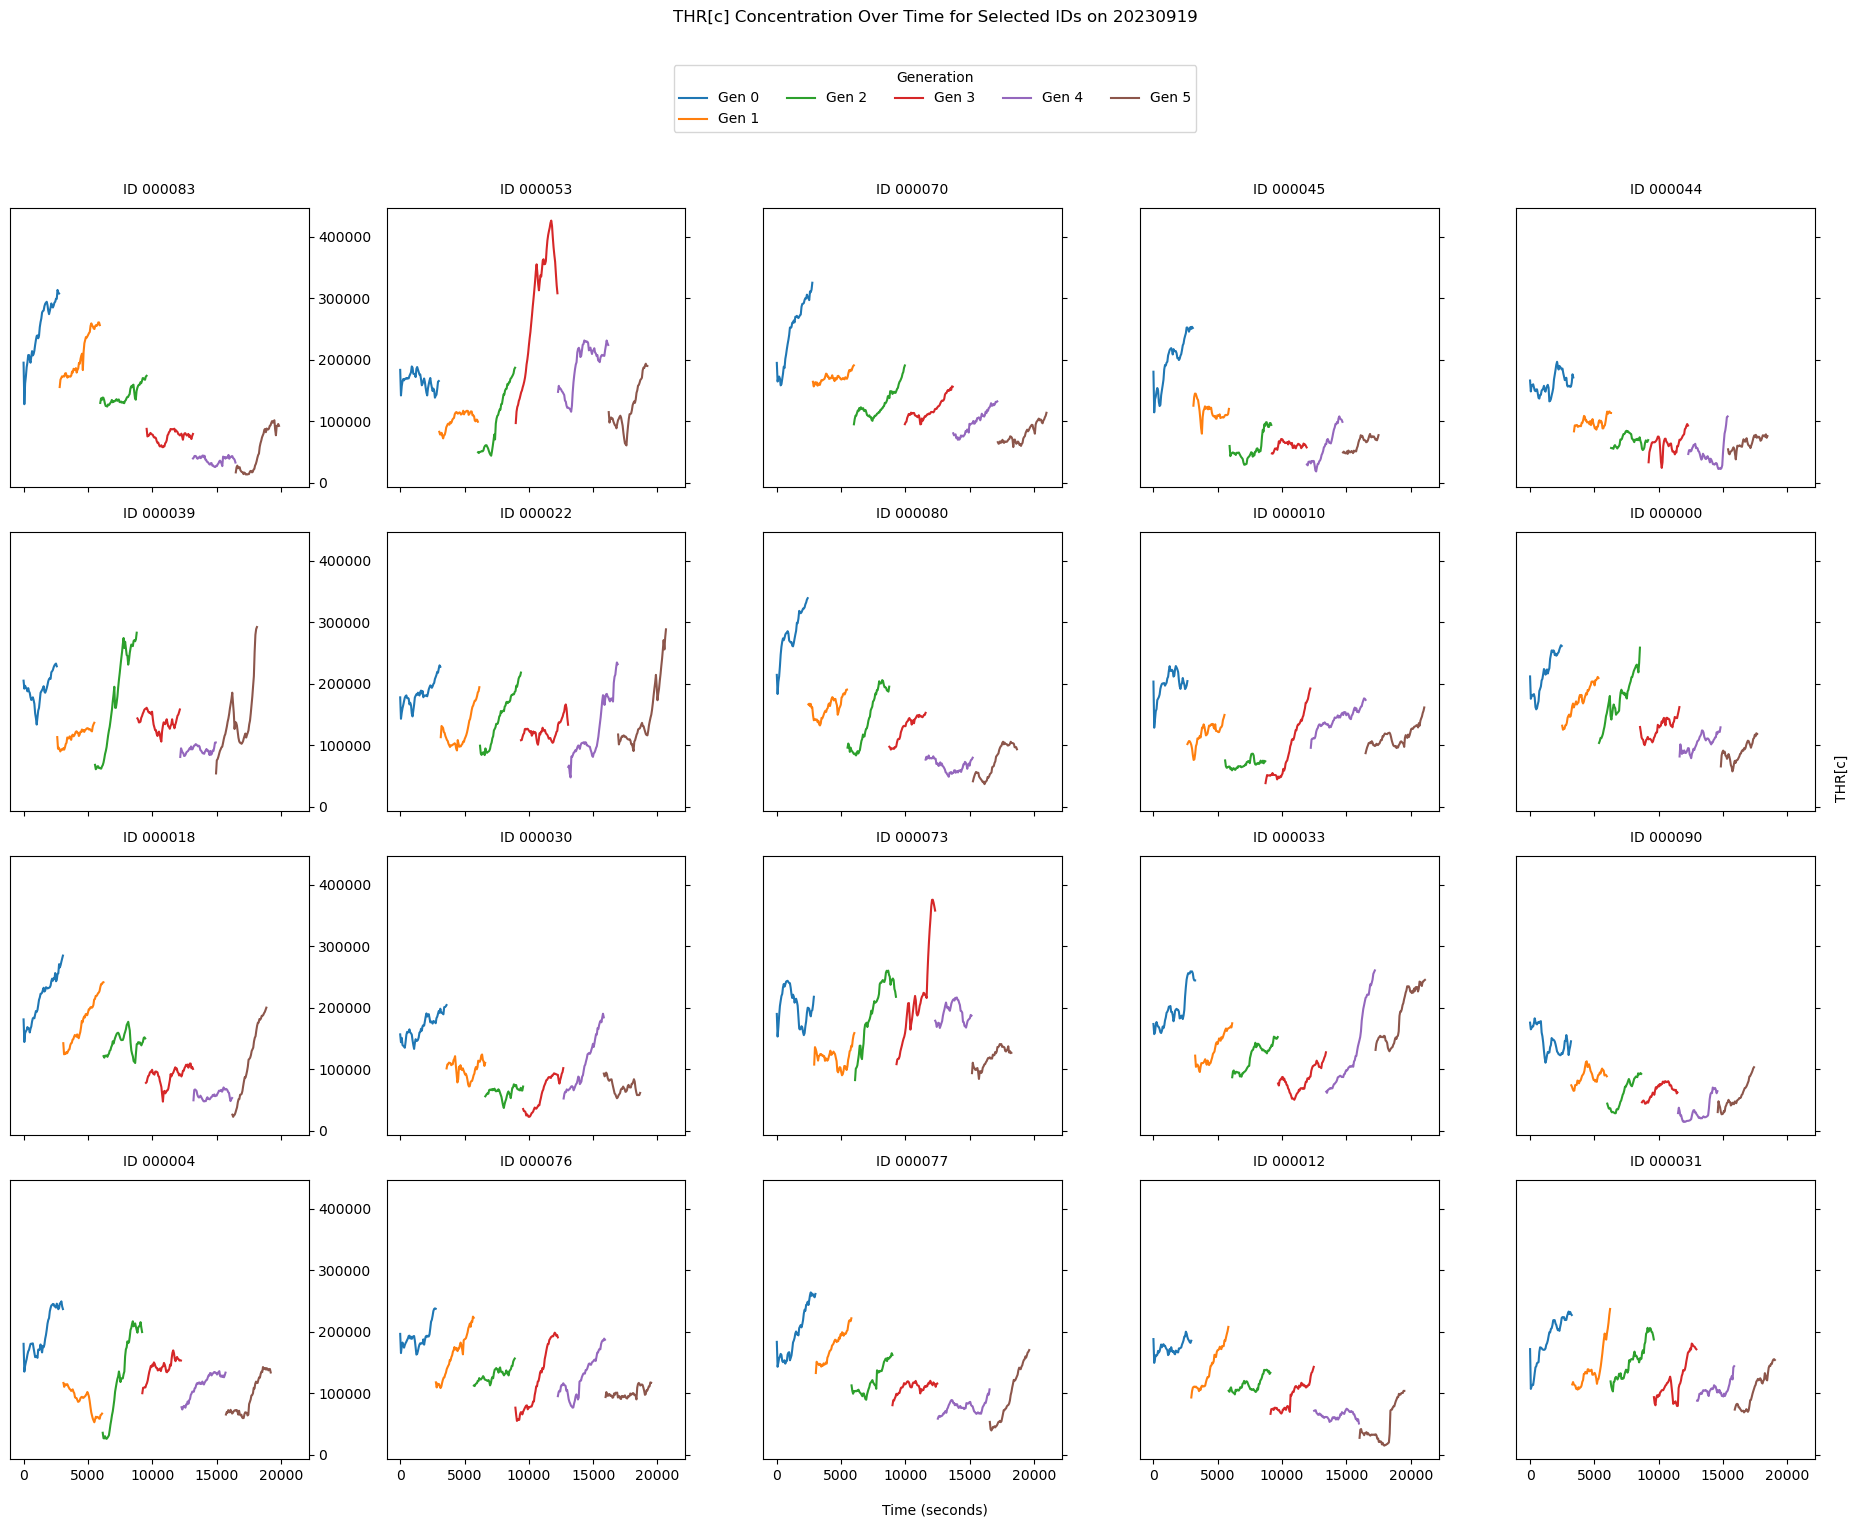

平均相关性 (THR[c] 与 cellMass): 0.6754


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, THR[c], 和 cellMass 列
wildtype_THR = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','THR[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_THR = wildtype_data_new.explode('THR[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_THR['time'] = wildtype_exploded_t['time']
wildtype_exploded_THR['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_THR = wildtype_exploded_THR[['date_of_sim','id','time','generation','cellMass','THR[c]']]
wildtype_THR.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_THR.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_THR['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_THR[wildtype_THR['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的THR[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['THR[c]'] = pd.to_numeric(df_gen_exploded['THR[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'THR[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['THR[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['THR[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'THR[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'THR[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\thr"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (THR[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\506475528.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_TRP.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


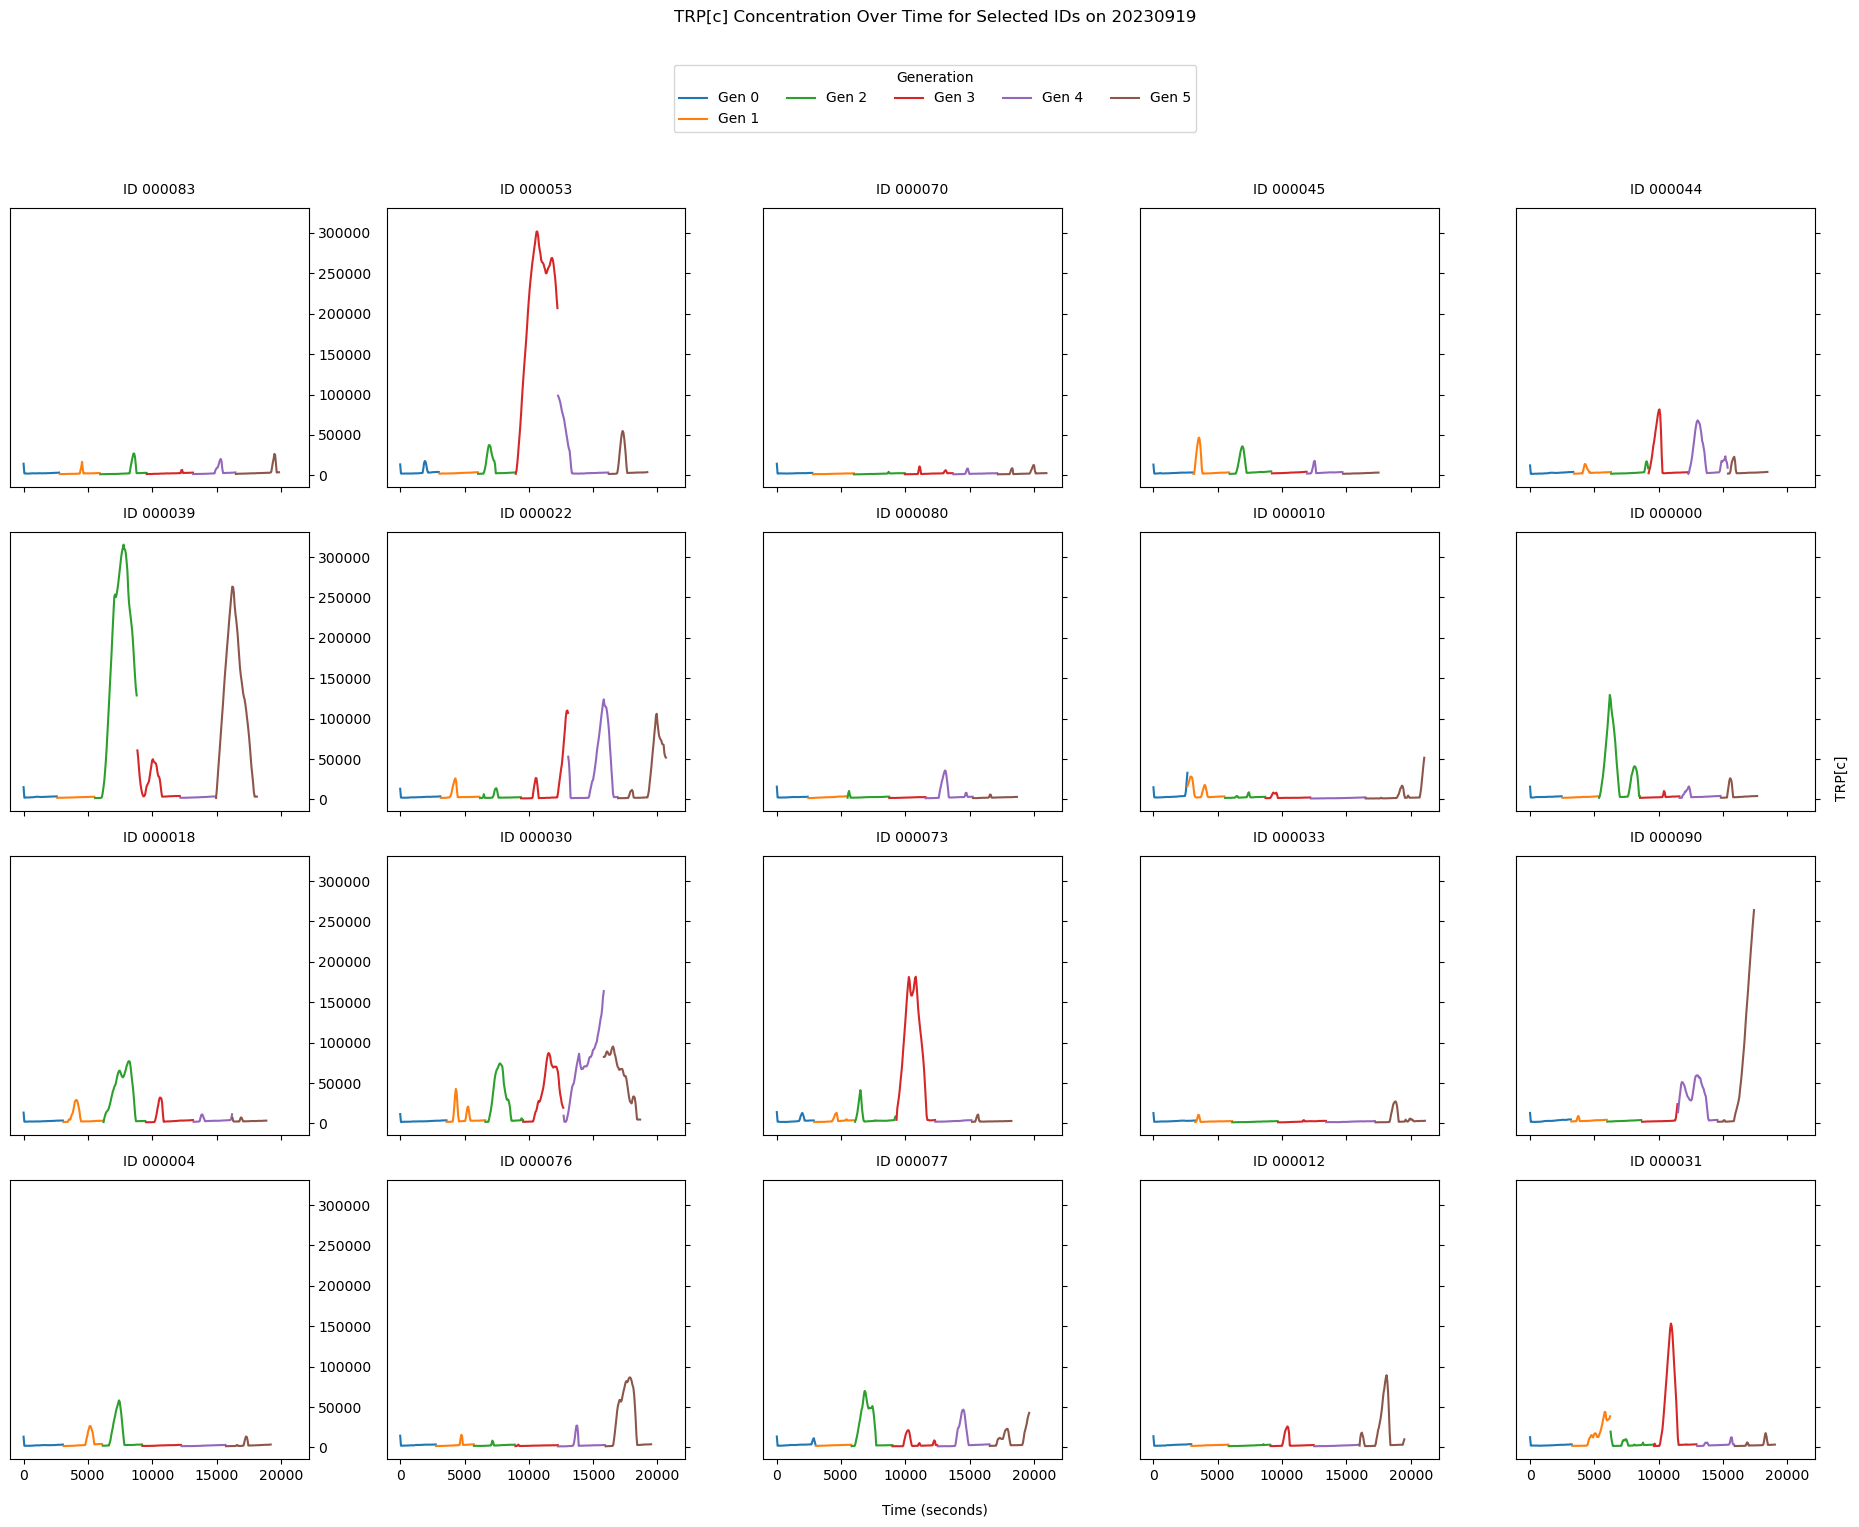

平均相关性 (TRP[c] 与 cellMass): 0.2229


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, TRP[c], 和 cellMass 列
wildtype_TRP = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','TRP[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_TRP = wildtype_data_new.explode('TRP[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_TRP['time'] = wildtype_exploded_t['time']
wildtype_exploded_TRP['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_TRP = wildtype_exploded_TRP[['date_of_sim','id','time','generation','cellMass','TRP[c]']]
wildtype_TRP.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
#print(wildtype_TRP.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_TRP['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_TRP[wildtype_TRP['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的TRP[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['TRP[c]'] = pd.to_numeric(df_gen_exploded['TRP[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'TRP[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['TRP[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['TRP[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'TRP[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'TRP[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\trp"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (TRP[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\3258104563.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_TYR.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


    date_of_sim      id    time generation     cellMass  TYR[c]
297    20230919  000000     0.0          0   1321.14572   94912
297    20230919  000000    60.0          0  1335.834018   70989
297    20230919  000000   120.0          0  1354.190268   72983
297    20230919  000000   180.0          0  1372.474505   74109
297    20230919  000000   240.0          0  1391.641015   73406
297    20230919  000000   300.0          0  1410.519576   76850
297    20230919  000000   360.0          0  1429.445337   82609
297    20230919  000000   420.0          0  1448.959342   81653
297    20230919  000000   480.0          0  1470.458609   76325
297    20230919  000000   540.0          0  1492.628502   74438
297    20230919  000000   600.0          0   1515.21254   74911
297    20230919  000000   660.0          0  1538.158422   79345
297    20230919  000000   720.0          0  1561.183336   89966
297    20230919  000000   780.0          0  1583.134694   94089
297    20230919  000000   840.0         

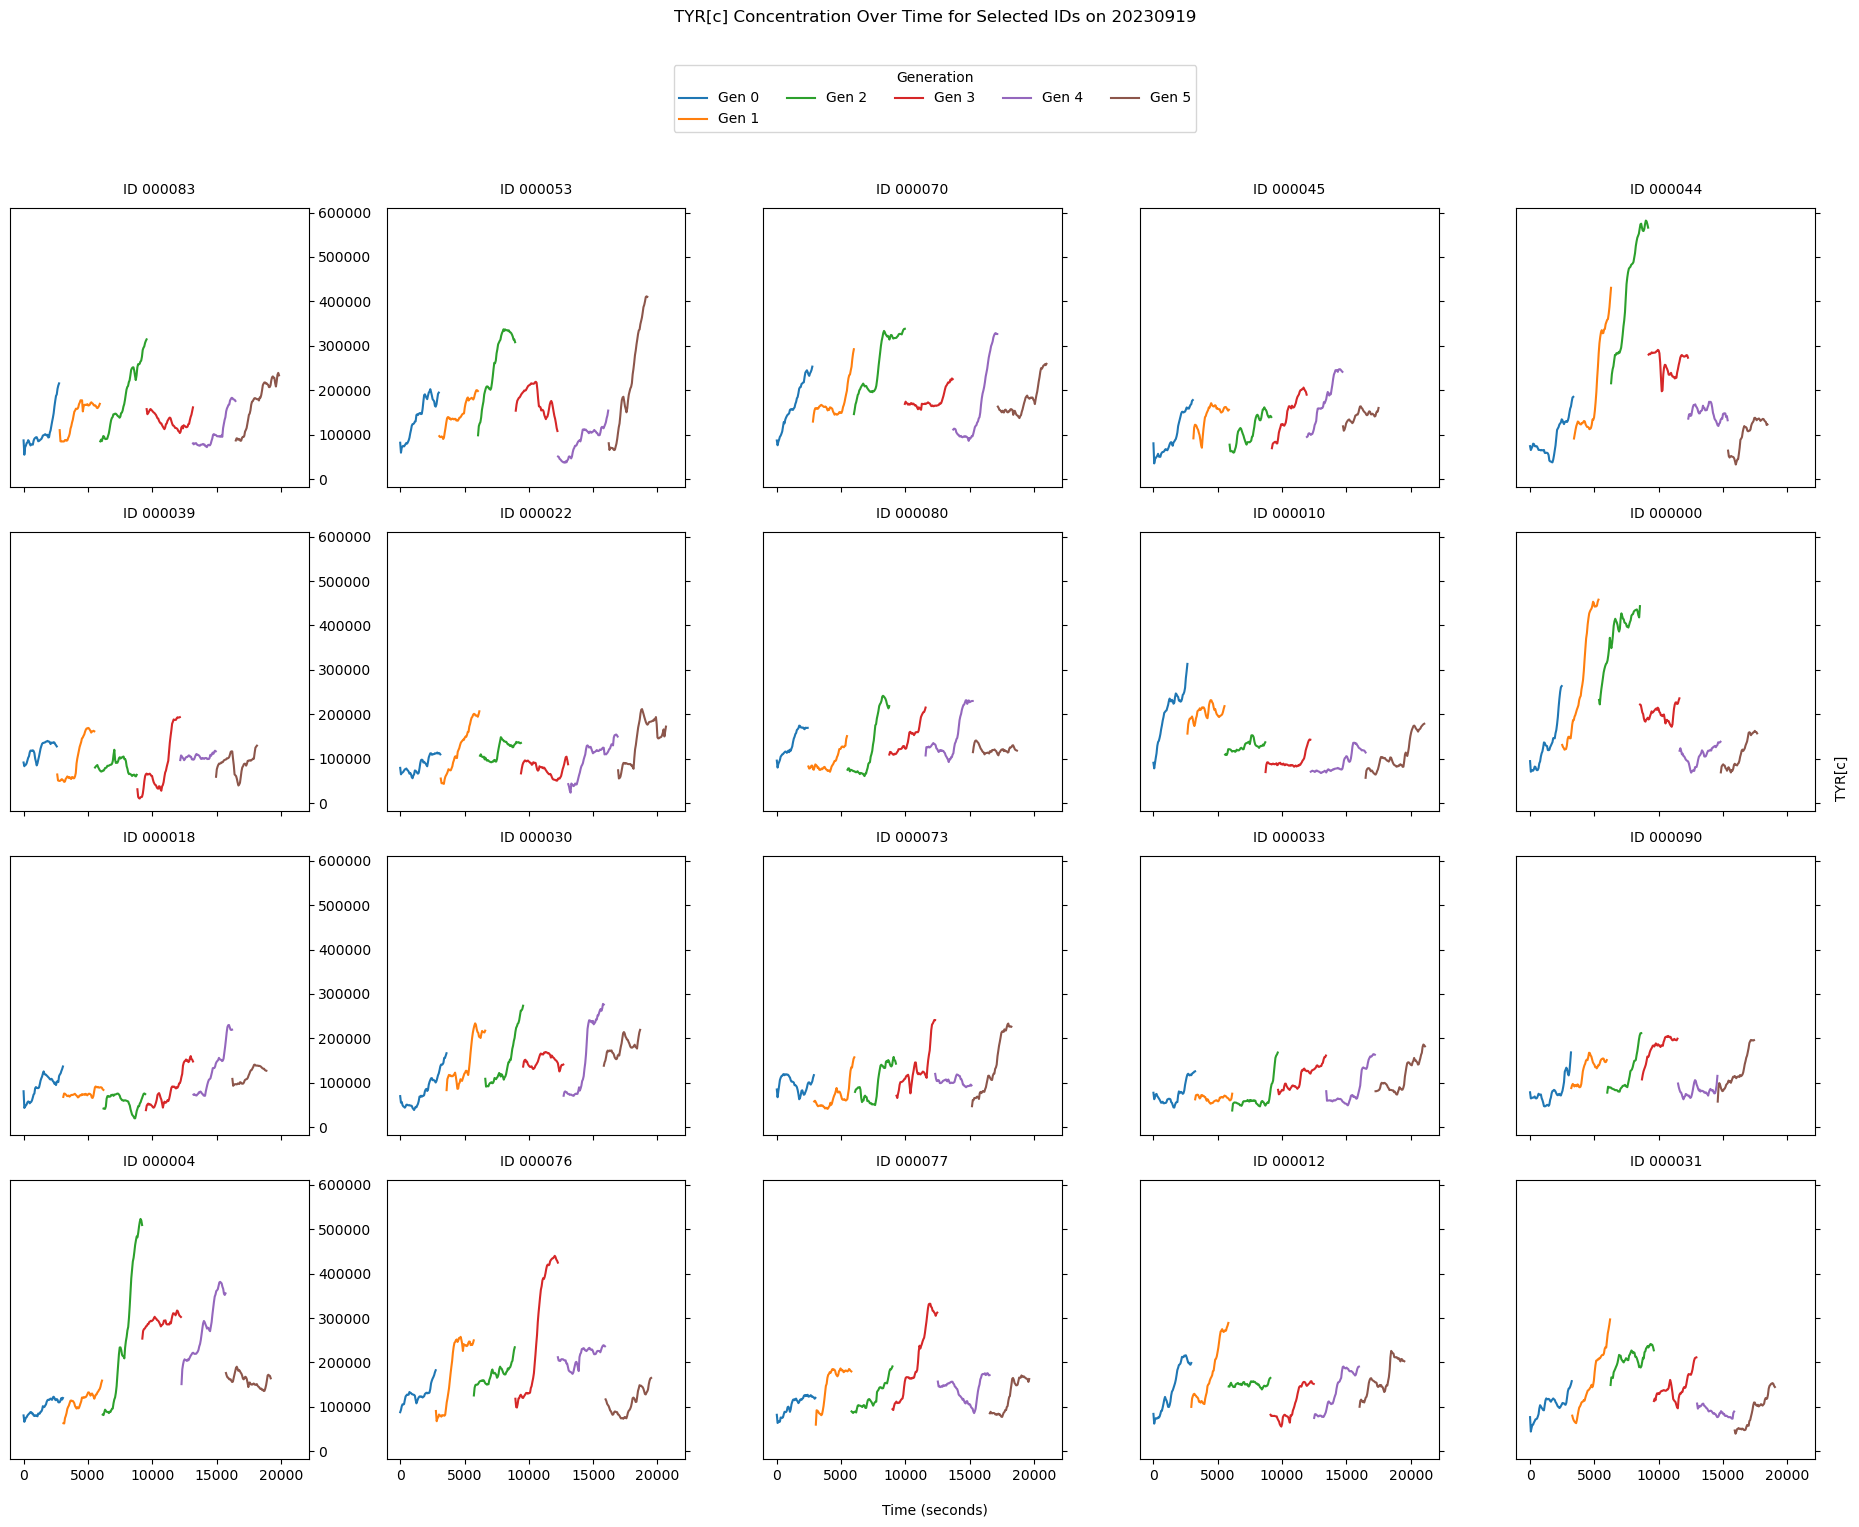

平均相关性 (TYR[c] 与 cellMass): 0.6913


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, TYR[c], 和 cellMass 列
wildtype_TYR = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','TYR[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_TYR = wildtype_data_new.explode('TYR[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_TYR['time'] = wildtype_exploded_t['time']
wildtype_exploded_TYR['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_TYR = wildtype_exploded_TYR[['date_of_sim','id','time','generation','cellMass','TYR[c]']]
wildtype_TYR.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
print(wildtype_TYR.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_TYR['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_TYR[wildtype_TYR['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的TYR[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['TYR[c]'] = pd.to_numeric(df_gen_exploded['TYR[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'TYR[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['TYR[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['TYR[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'TYR[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'TYR[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\tyr"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (TYR[c] 与 cellMass): {average_correlation:.4f}')


C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\2811072147.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildtype_VAL.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)


    date_of_sim      id    time generation     cellMass  VAL[c]
297    20230919  000000     0.0          0   1321.14572  220601
297    20230919  000000    60.0          0  1335.834018  202748
297    20230919  000000   120.0          0  1354.190268  211701
297    20230919  000000   180.0          0  1372.474505  218381
297    20230919  000000   240.0          0  1391.641015  217799
297    20230919  000000   300.0          0  1410.519576  221634
297    20230919  000000   360.0          0  1429.445337  215051
297    20230919  000000   420.0          0  1448.959342  200004
297    20230919  000000   480.0          0  1470.458609  197350
297    20230919  000000   540.0          0  1492.628502  194947
297    20230919  000000   600.0          0   1515.21254  200082
297    20230919  000000   660.0          0  1538.158422  205701
297    20230919  000000   720.0          0  1561.183336  220899
297    20230919  000000   780.0          0  1583.134694  228654
297    20230919  000000   840.0         

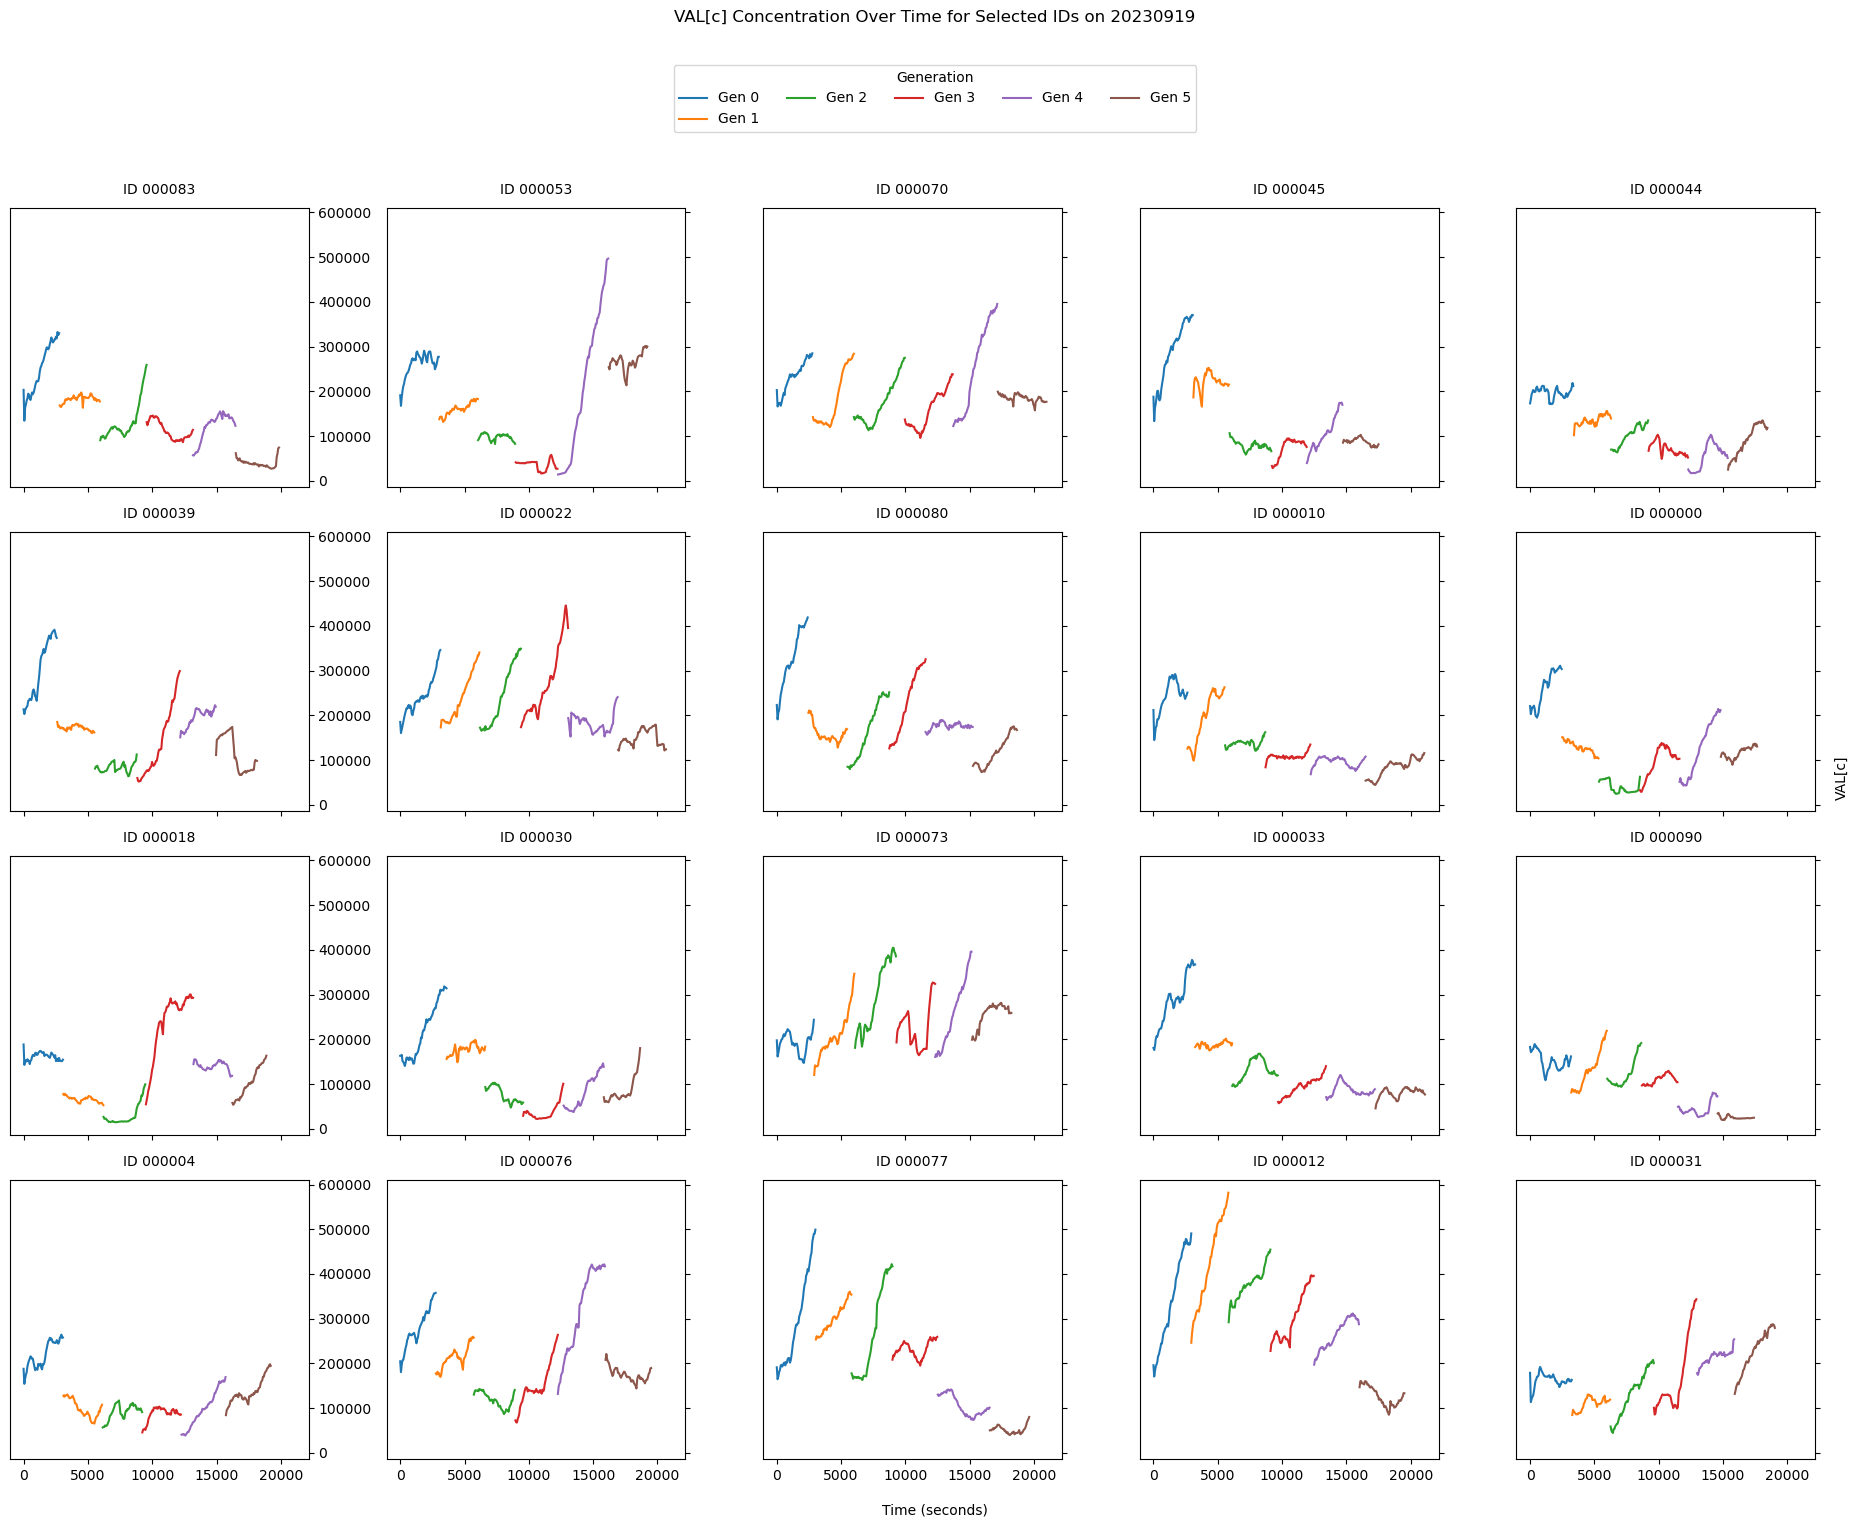

平均相关性 (VAL[c] 与 cellMass): 0.4833


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 复制数据并展开time, VAL[c], 和 cellMass 列
wildtype_VAL = wildtype_data_new[['date_of_sim','id','time','generation','cellMass','VAL[c]']].copy()
wildtype_exploded_t = wildtype_data_new.explode('time')
wildtype_exploded_VAL = wildtype_data_new.explode('VAL[c]')
wildtype_exploded_cm = wildtype_data_new.explode('cellMass')
wildtype_exploded_VAL['time'] = wildtype_exploded_t['time']
wildtype_exploded_VAL['cellMass'] = wildtype_exploded_cm['cellMass']
wildtype_VAL = wildtype_exploded_VAL[['date_of_sim','id','time','generation','cellMass','VAL[c]']]
wildtype_VAL.sort_values(by=['date_of_sim', 'id', 'generation'], inplace=True)
print(wildtype_VAL.head(50))

np.random.seed(42)
# 随机选择一个日期
selected_date = np.random.choice(wildtype_VAL['date_of_sim'].unique())

# 过滤数据为随机选择的日期
wildtype_date_filtered = wildtype_VAL[wildtype_VAL['date_of_sim'] == selected_date]

# 从数据中随机选择20个唯一的id
unique_ids = wildtype_date_filtered['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_date_filtered[wildtype_date_filtered['id'] == specific_id]
    
    # 计算每个generation的VAL[c]与cellMass的相关性
    for generation in df_filtered['generation'].unique():
        df_gen = df_filtered[df_filtered['generation'] == generation]
        
        # 展平cellMass以确保它是一个一维数组
        df_gen_exploded = df_gen.explode('cellMass')
        df_gen_exploded['cellMass'] = pd.to_numeric(df_gen_exploded['cellMass'], errors='coerce')
        df_gen_exploded['VAL[c]'] = pd.to_numeric(df_gen_exploded['VAL[c]'], errors='coerce')
        
        # 删除NaN值
        df_gen_exploded = df_gen_exploded.dropna(subset=['cellMass', 'VAL[c]'])
        
        # 计算相关性并存储
        if not df_gen_exploded.empty:
            correlation = df_gen_exploded['VAL[c]'].corr(df_gen_exploded['cellMass'])
            correlations.append(correlation)
        
        # 绘制图形
        ax.plot(df_gen_exploded['time'], df_gen_exploded['VAL[c]'], label=f'Gen {generation}')
    
    ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)  # 调整标题的大小和位置
    ax.yaxis.set_label_position('right')
    ax.yaxis.tick_right()

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'VAL[c]', va='center', rotation='vertical')  # 将 y 轴标签放在右侧
fig.suptitle(f'VAL[c] Concentration Over Time for Selected IDs on {selected_date}', y=0.98)

# 统一图例并放在总标题下方
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Generation', bbox_to_anchor=(0.5, 0.95), ncol=5)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径
output_path = "D:\\Bioinformatics\\personal research\\aa_cor0828\\val"    # 替换为你的保存路径
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

# 计算并打印平均相关性
average_correlation = np.mean([corr for corr in correlations if not np.isnan(corr)])
print(f'平均相关性 (VAL[c] 与 cellMass): {average_correlation:.4f}')


In [43]:
wild['id'] = wild['gene_ko'].apply(lambda x: x.split('/')[-1])

wildtype_genes = wild[['date_of_sim','id','generation','time','cellMass','EG10347-MONOMER[c]','G7258-MONOMER[i]']]

wildtype_genes = wildtype_genes[wildtype_genes['date_of_sim'] == '20230919']

# Process the generation column, split each value by an underscore (_), and convert the last part to an integer.
wildtype_genes.loc[:,'generation'] = wildtype_genes['generation'].apply(lambda x: int(x.split('_')[-1]))

# Sort by generation
wildtype_genes=wildtype_genes.sort_values(by=['id','generation'])
print(wildtype_genes)

    date_of_sim      id generation  \
297    20230919  000000          0   
296    20230919  000000          1   
299    20230919  000000          2   
294    20230919  000000          3   
298    20230919  000000          4   
..          ...     ...        ...   
2      20230919  000099          1   
5      20230919  000099          2   
0      20230919  000099          3   
4      20230919  000099          4   
1      20230919  000099          5   

                                                  time  \
297  [0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0,...   
296  [2499.0, 2559.0, 2619.0, 2679.0, 2739.0, 2799....   
299  [5362.0, 5422.0, 5482.0, 5542.0, 5602.0, 5662....   
294  [8550.0, 8610.0, 8670.0, 8730.0, 8790.0, 8850....   
298  [11625.0, 11685.0, 11745.0, 11805.0, 11865.0, ...   
..                                                 ...   
2    [3173.0, 3233.0, 3293.0, 3353.0, 3413.0, 3473....   
5    [6311.0, 6371.0, 6431.0, 6491.0, 6551.0, 6611....   
0    [9789.0, 9849.0,

In [50]:
import numpy as np
import pandas as pd

# 选择指定的列并创建副本
wildtype_ge2 = wildtype_genes[['date_of_sim','id','time','generation','cellMass','EG10347-MONOMER[c]','G7258-MONOMER[i]']].copy()

# 分别对每一列进行explode操作，并重置索引以避免索引不一致
wildtype_exploded_t = wildtype_ge2.explode('time').reset_index(drop=True)
wildtype_exploded_10347 = wildtype_ge2.explode('EG10347-MONOMER[c]').reset_index(drop=True)
wildtype_exploded_7258 = wildtype_ge2.explode('G7258-MONOMER[i]').reset_index(drop=True)
wildtype_exploded_cm = wildtype_ge2.explode('cellMass').reset_index(drop=True)

# 合并所有展开的列到一个数据框中，以确保每列的数据对应正确的索引
wildtype_exploded = pd.DataFrame({
    'date_of_sim': wildtype_exploded_t['date_of_sim'],
    'id': wildtype_exploded_t['id'],
    'time': wildtype_exploded_t['time'],
    'generation': wildtype_exploded_t['generation'],
    'cellMass': wildtype_exploded_cm['cellMass'],
    'EG10347-MONOMER[c]': wildtype_exploded_10347['EG10347-MONOMER[c]'],
    'G7258-MONOMER[i]': wildtype_exploded_7258['G7258-MONOMER[i]']
})

# 对数据进行排序
wildtype_ge = wildtype_exploded.sort_values(by=['date_of_sim', 'id', 'generation']).reset_index(drop=True)

# 打印数据框前50行
print(wildtype_ge.head(50))


   date_of_sim      id    time generation     cellMass EG10347-MONOMER[c]  \
0     20230919  000000     0.0          0   1321.14572                938   
1     20230919  000000    60.0          0  1335.834018                969   
2     20230919  000000   120.0          0  1354.190268                983   
3     20230919  000000   180.0          0  1372.474505                999   
4     20230919  000000   240.0          0  1391.641015               1017   
5     20230919  000000   300.0          0  1410.519576               1063   
6     20230919  000000   360.0          0  1429.445337               1094   
7     20230919  000000   420.0          0  1448.959342               1109   
8     20230919  000000   480.0          0  1470.458609               1135   
9     20230919  000000   540.0          0  1492.628502               1155   
10    20230919  000000   600.0          0   1515.21254               1175   
11    20230919  000000   660.0          0  1538.158422               1188   

C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\1537735827.py:85: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.savefig(output_path, dpi=300, bbox_inches='tight')
C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\1537735827.py:85: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.savefig(output_path, dpi=300, bbox_inches='tight')
C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\1537735827.py:85: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.savefig(output_path, dpi=300, bbox_inches='tight')
C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\1537735827.py:85: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.savefig(output_path, dpi=300, bbox_inches='tight')
C:\Users\shanz\AppData\Local\Temp\ipykernel_12348\1537735827.py:85: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.s

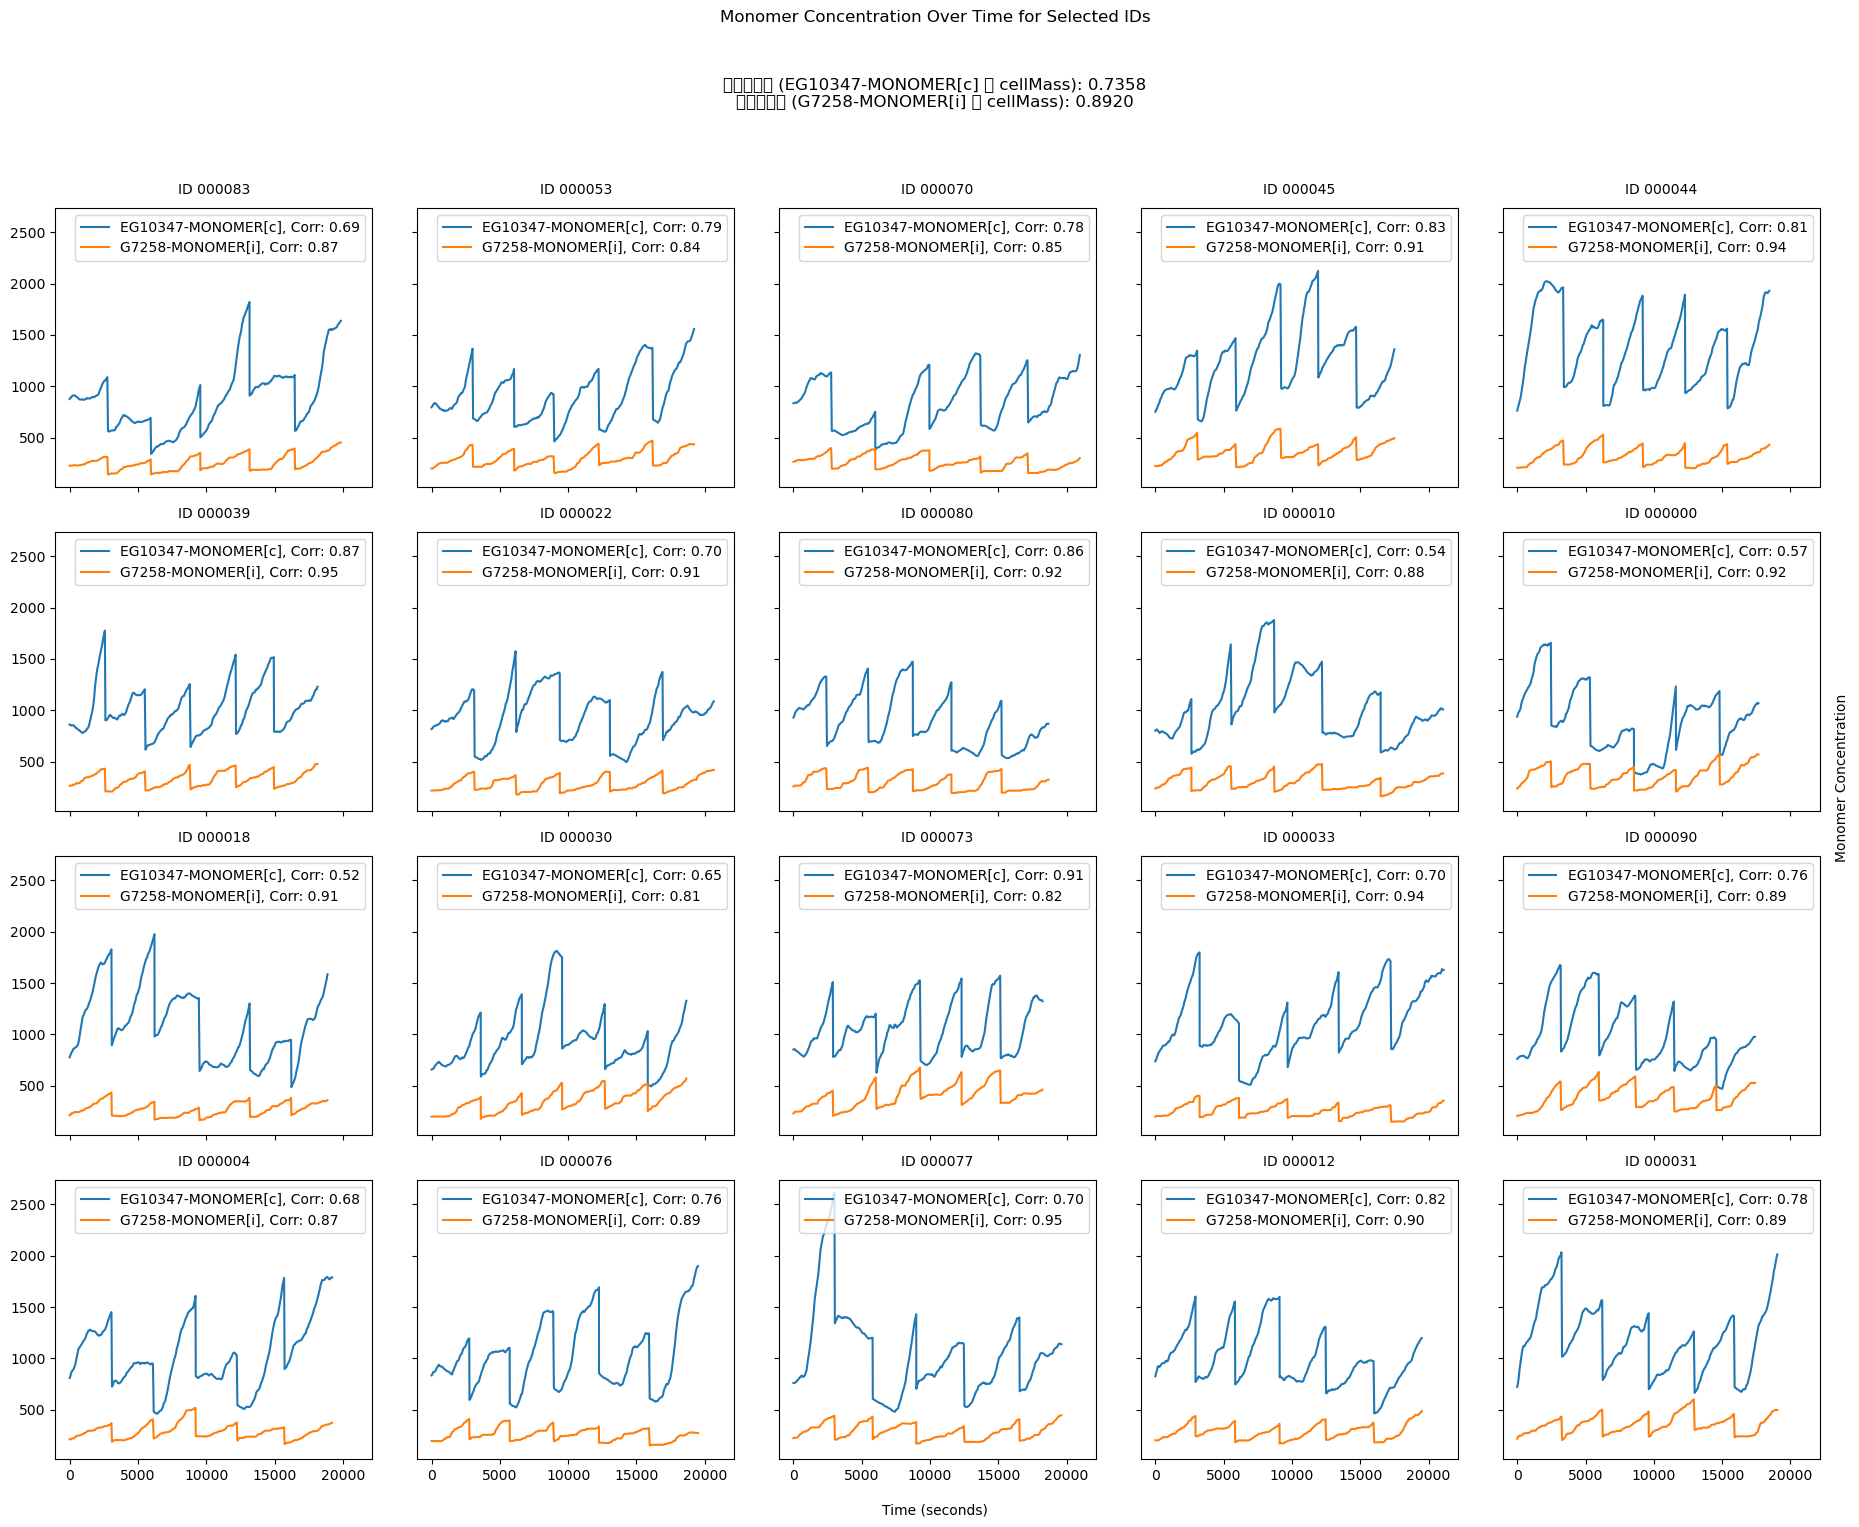

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 选择指定的列并创建副本
wildtype_ge2 = wildtype_genes[['date_of_sim','id','time','generation','cellMass','EG10347-MONOMER[c]','G7258-MONOMER[i]']].copy()

# 分别对每一列进行explode操作，并重置索引以避免索引不一致
wildtype_exploded_t = wildtype_ge2.explode('time').reset_index(drop=True)
wildtype_exploded_10347 = wildtype_ge2.explode('EG10347-MONOMER[c]').reset_index(drop=True)
wildtype_exploded_7258 = wildtype_ge2.explode('G7258-MONOMER[i]').reset_index(drop=True)
wildtype_exploded_cm = wildtype_ge2.explode('cellMass').reset_index(drop=True)

# 合并所有展开的列到一个数据框中，以确保每列的数据对应正确的索引
wildtype_exploded = pd.DataFrame({
    'date_of_sim': wildtype_exploded_t['date_of_sim'],
    'id': wildtype_exploded_t['id'],
    'time': wildtype_exploded_t['time'],
    'generation': wildtype_exploded_t['generation'],
    'cellMass': wildtype_exploded_cm['cellMass'],
    'EG10347-MONOMER[c]': wildtype_exploded_10347['EG10347-MONOMER[c]'],
    'G7258-MONOMER[i]': wildtype_exploded_7258['G7258-MONOMER[i]']
})

# 对数据进行排序
wildtype_ge = wildtype_exploded.sort_values(by=['date_of_sim', 'id', 'generation']).reset_index(drop=True)

# 确保所有列都是数值型，并去除缺失值
wildtype_ge[['cellMass', 'EG10347-MONOMER[c]', 'G7258-MONOMER[i]']] = wildtype_ge[['cellMass', 'EG10347-MONOMER[c]', 'G7258-MONOMER[i]']].apply(pd.to_numeric, errors='coerce')
wildtype_ge.dropna(subset=['cellMass', 'EG10347-MONOMER[c]', 'G7258-MONOMER[i]'], inplace=True)

# 随机选择20个唯一的id
np.random.seed(42)
unique_ids = wildtype_ge['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations_10347 = []
correlations_7258 = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_ge[wildtype_ge['id'] == specific_id]
    
    # 确保数据不为空且为数值类型
    if not df_filtered.empty and df_filtered[['EG10347-MONOMER[c]', 'G7258-MONOMER[i]', 'cellMass']].notnull().all().all():
        
        # 计算EG10347-MONOMER[c]与cellMass的相关性
        correlation_10347 = df_filtered['EG10347-MONOMER[c]'].corr(df_filtered['cellMass'])
        correlations_10347.append(correlation_10347)

        # 计算G7258-MONOMER[i]与cellMass的相关性
        correlation_7258 = df_filtered['G7258-MONOMER[i]'].corr(df_filtered['cellMass'])
        correlations_7258.append(correlation_7258)

        # 绘制EG10347-MONOMER[c]和G7258-MONOMER[i]随时间变化的图
        ax.plot(df_filtered['time'], df_filtered['EG10347-MONOMER[c]'], label=f'ftsZ, Corr: {correlation_10347:.2f}')
        ax.plot(df_filtered['time'], df_filtered['G7258-MONOMER[i]'], label=f'zipA, Corr: {correlation_7258:.2f}')
        ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)
        ax.legend()

# 计算并打印平均相关性
average_correlation_10347 = np.mean([corr for corr in correlations_10347 if not np.isnan(corr)])
average_correlation_7258 = np.mean([corr for corr in correlations_7258 if not np.isnan(corr)])
average_correlation_text = (
    f'average_cor (ftsZ and cellMass): {average_correlation_10347:.4f}\n'
    f'average_cor (zipA and cellMass): {average_correlation_7258:.4f}'
)

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'Monomer Concentration', va='center', rotation='vertical')
fig.suptitle('Monomer Concentration Over Time for Selected IDs', y=0.98)

# 在标题下方添加平均相关性文本
fig.text(0.5, 0.92, average_correlation_text, ha='center', fontsize=12)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径（可选）
output_path = "D:\\Bioinformatics\\personal research\\monomer_correlation_plot.png"  # 替换为你的保存路径
fig.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


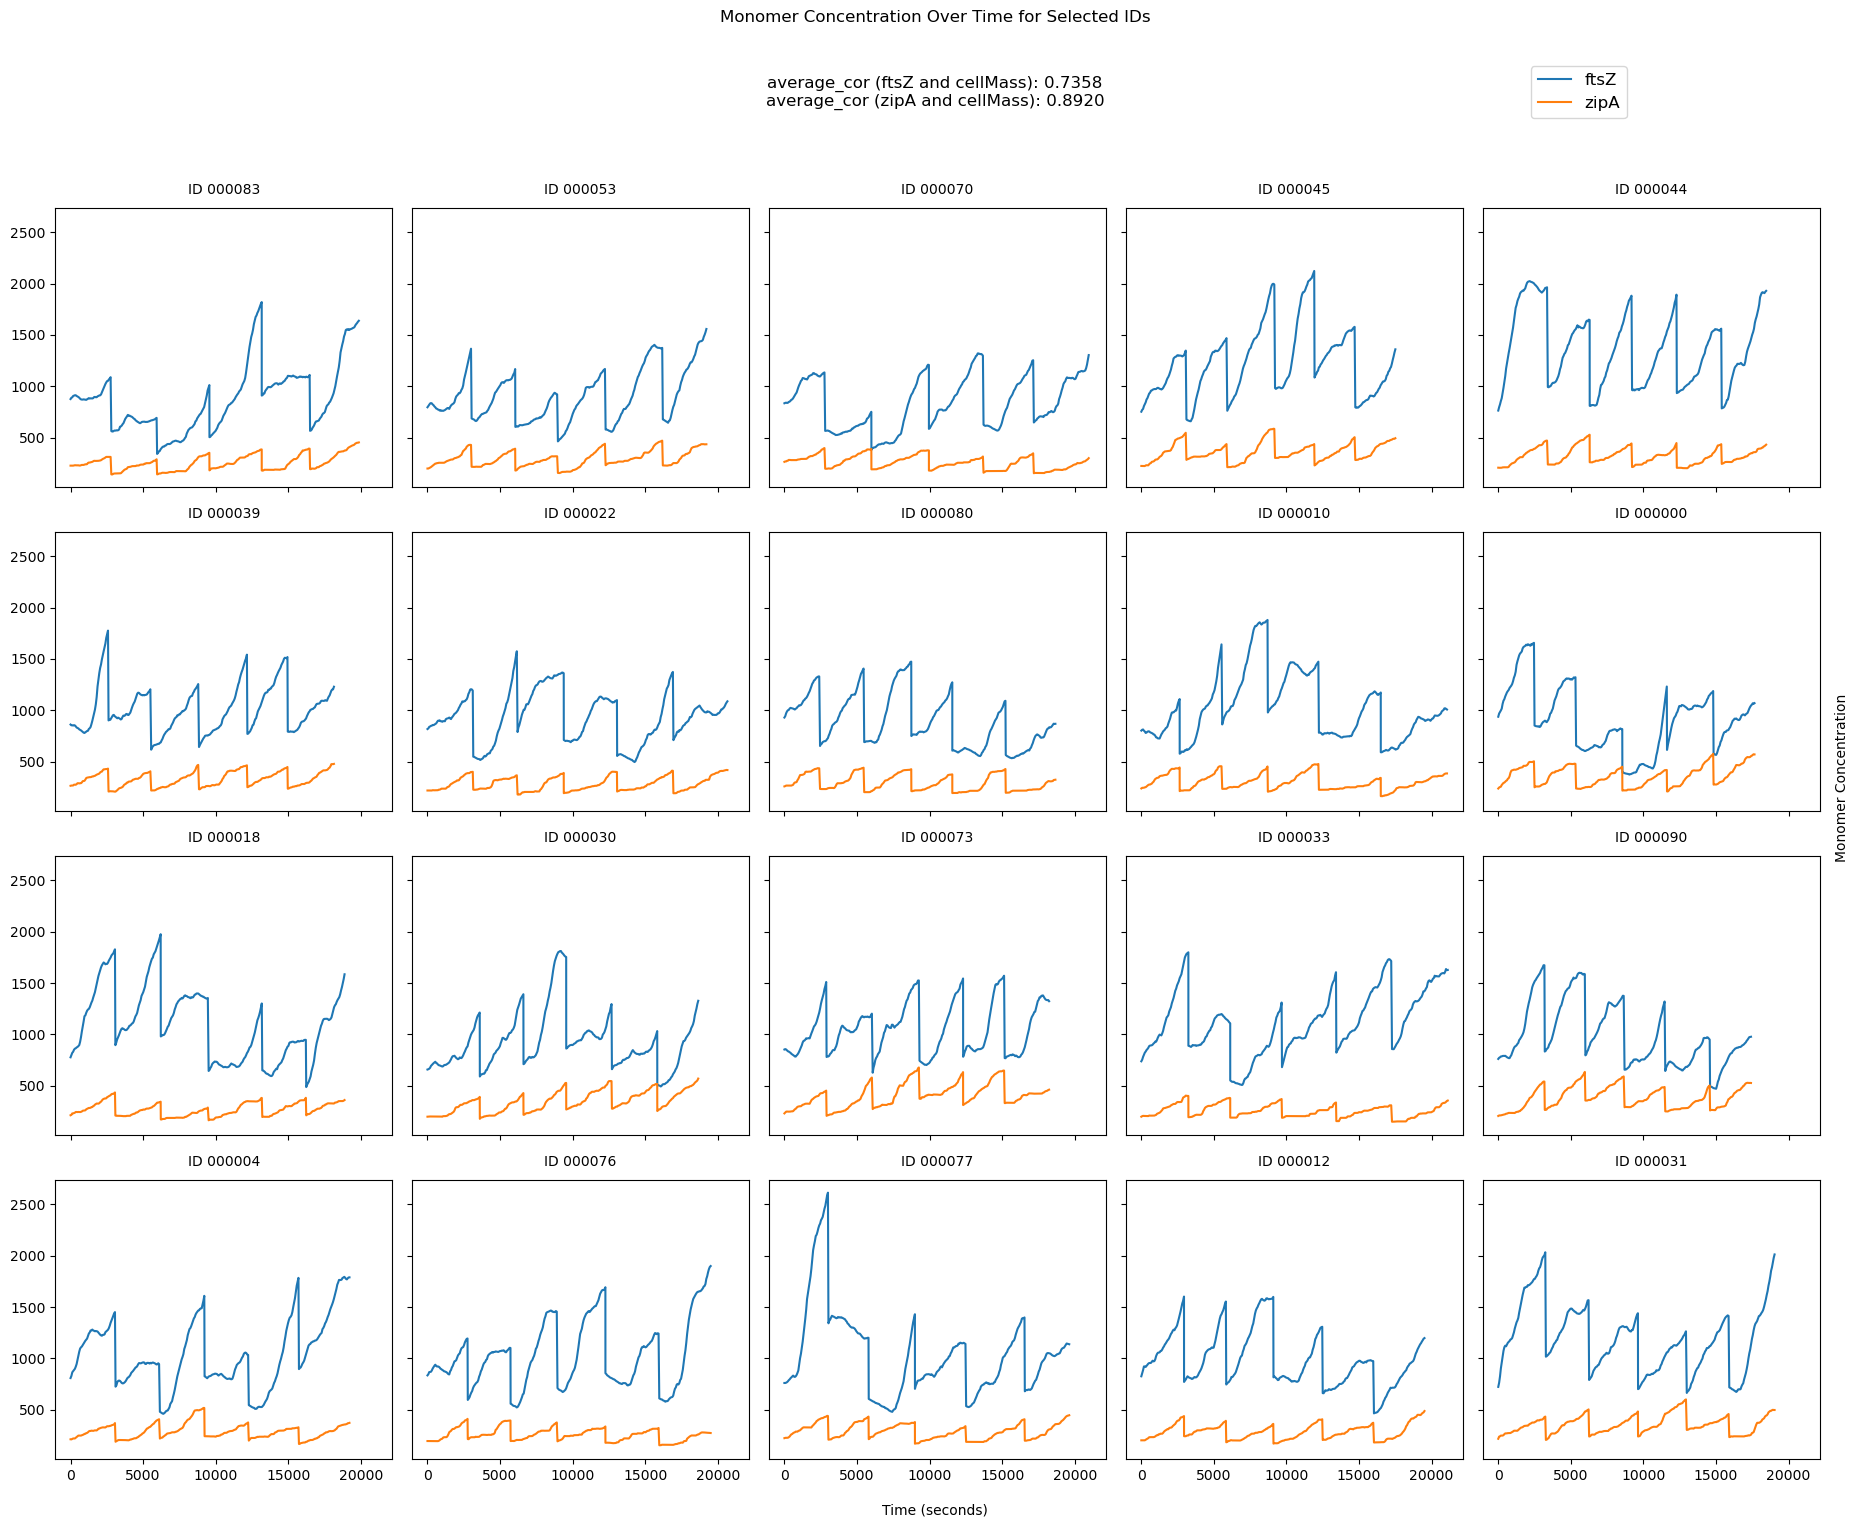

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 选择指定的列并创建副本
wildtype_ge2 = wildtype_genes[['date_of_sim','id','time','generation','cellMass','EG10347-MONOMER[c]','G7258-MONOMER[i]']].copy()

# 分别对每一列进行explode操作，并重置索引以避免索引不一致
wildtype_exploded_t = wildtype_ge2.explode('time').reset_index(drop=True)
wildtype_exploded_10347 = wildtype_ge2.explode('EG10347-MONOMER[c]').reset_index(drop=True)
wildtype_exploded_7258 = wildtype_ge2.explode('G7258-MONOMER[i]').reset_index(drop=True)
wildtype_exploded_cm = wildtype_ge2.explode('cellMass').reset_index(drop=True)

# 合并所有展开的列到一个数据框中，以确保每列的数据对应正确的索引
wildtype_exploded = pd.DataFrame({
    'date_of_sim': wildtype_exploded_t['date_of_sim'],
    'id': wildtype_exploded_t['id'],
    'time': wildtype_exploded_t['time'],
    'generation': wildtype_exploded_t['generation'],
    'cellMass': wildtype_exploded_cm['cellMass'],
    'EG10347-MONOMER[c]': wildtype_exploded_10347['EG10347-MONOMER[c]'],
    'G7258-MONOMER[i]': wildtype_exploded_7258['G7258-MONOMER[i]']
})

# 对数据进行排序
wildtype_ge = wildtype_exploded.sort_values(by=['date_of_sim', 'id', 'generation']).reset_index(drop=True)

# 确保所有列都是数值型，并去除缺失值
wildtype_ge[['cellMass', 'EG10347-MONOMER[c]', 'G7258-MONOMER[i]']] = wildtype_ge[['cellMass', 'EG10347-MONOMER[c]', 'G7258-MONOMER[i]']].apply(pd.to_numeric, errors='coerce')
wildtype_ge.dropna(subset=['cellMass', 'EG10347-MONOMER[c]', 'G7258-MONOMER[i]'], inplace=True)

# 随机选择20个唯一的id
np.random.seed(42)
unique_ids = wildtype_ge['id'].unique()
selected_ids = np.random.choice(unique_ids, 20, replace=False)

# 存储相关性系数的列表
correlations_10347 = []
correlations_7258 = []

# 创建子图
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=True, sharey=True)

# 绘制图形并计算相关性
for ax, specific_id in zip(axes.flatten(), selected_ids):
    df_filtered = wildtype_ge[wildtype_ge['id'] == specific_id]
    
    # 确保数据不为空且为数值类型
    if not df_filtered.empty and df_filtered[['EG10347-MONOMER[c]', 'G7258-MONOMER[i]', 'cellMass']].notnull().all().all():
        
        # 计算EG10347-MONOMER[c]与cellMass的相关性
        correlation_10347 = df_filtered['EG10347-MONOMER[c]'].corr(df_filtered['cellMass'])
        correlations_10347.append(correlation_10347)

        # 计算G7258-MONOMER[i]与cellMass的相关性
        correlation_7258 = df_filtered['G7258-MONOMER[i]'].corr(df_filtered['cellMass'])
        correlations_7258.append(correlation_7258)

        # 绘制EG10347-MONOMER[c]和G7258-MONOMER[i]随时间变化的图
        ax.plot(df_filtered['time'], df_filtered['EG10347-MONOMER[c]'], label='ftsZ')
        ax.plot(df_filtered['time'], df_filtered['G7258-MONOMER[i]'], label='zipA')
        ax.set_title(f'ID {specific_id}', fontsize=10, pad=10)

# 计算并打印平均相关性
average_correlation_10347 = np.mean([corr for corr in correlations_10347 if not np.isnan(corr)])
average_correlation_7258 = np.mean([corr for corr in correlations_7258 if not np.isnan(corr)])
average_correlation_text = (
    f'average_cor (ftsZ and cellMass): {average_correlation_10347:.4f}\n'
    f'average_cor (zipA and cellMass): {average_correlation_7258:.4f}'
)

# 设置全局标签和标题
fig.text(0.5, 0.04, 'Time (seconds)', ha='center')
fig.text(0.95, 0.5, 'Monomer Concentration', va='center', rotation='vertical')
fig.suptitle('Monomer Concentration Over Time for Selected IDs', y=0.98)

# 在标题下方添加平均相关性文本
fig.text(0.5, 0.92, average_correlation_text, ha='center', fontsize=12)

# 创建总的图例
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.85, 0.95), fontsize=12)

plt.tight_layout(rect=[0.03, 0.05, 0.95, 0.9])  # 调整布局以确保内容不重叠

# 保存图片到指定路径（可选）
output_path = "D:\\Bioinformatics\\personal research\\monomer_correlation_plot.png"  # 替换为你的保存路径
fig.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()
